In [ ]:
import pandas as pd 

# Set display options to show the full DataFrame 
pd.set_option('display.max_rows', None) # Show all rows 
pd.set_option('display.max_columns', None) # Show all columns 
pd.set_option('display.width', None) # Adjust the width to fit all columns 

dir_test = "/home/juliantearney/Downloads/" # For PC 
df = pd.read_table(dir_test+'cdfs_v1_6_11.cat', sep=' ') 

# Display the table 
print(df)

In [1]:
import pandas as pd
dir_test = "/home/juliantearney/Downloads/"
c_m_n = pd.read_csv(dir_test+'/control_morphology_nonparametric_multisource.csv')
c_m_n_new =c_m_n[(c_m_n['flag_o3']<=1) & (c_m_n['flag_f210']<=1) & (c_m_n['flag_f180']<=1) & (c_m_n['gini_f180']!=-99) & (c_m_n['gini_o3']!=-99) & (c_m_n['zfourge_id']!=15287.0)]
e_m_n = pd.read_csv(dir_test+'/eelg_morphology_nonparametric_multisource.csv')
e_m_n_new=e_m_n[(e_m_n['flag_o3']<=1) & (e_m_n['flag_f210']<=1) & (e_m_n['flag_f180']<=1) & (e_m_n['gini_o3']!=-99)]

In [2]:

c_m_n_reclass = c_m_n_new.copy()
e_m_n_reclass = e_m_n_new.copy()

# Combine the two DataFrames and sort them by 'zfourge_id'
combined = pd.concat([c_m_n_reclass, e_m_n_reclass], ignore_index=True)
sorted_combined = combined.sort_values(by='zfourge_id')

# Get the 'zfourge_id' column
sord_combined_ids = sorted_combined['zfourge_id']

# Use a set to avoid duplicate IDs
unique_ids = set()

# Convert the IDs to integers and add them to the set
for id in sord_combined_ids:
    unique_ids.add(int(id))

# Convert the set back to a sorted list
int_ids = sorted(list(unique_ids))

print(len(int_ids))
print(int_ids)
print(int_ids[9])

215
[7129, 7172, 7387, 7448, 7453, 7629, 7706, 7814, 7836, 7856, 7867, 7887, 7932, 7968, 8020, 8074, 8116, 8131, 8206, 8207, 8316, 8366, 8643, 8706, 8851, 8926, 8943, 8946, 9048, 9087, 9101, 9179, 9323, 9371, 9512, 9576, 9586, 9652, 9698, 9805, 9845, 10017, 10050, 10066, 10092, 10112, 10214, 10224, 10229, 10287, 10316, 10330, 10388, 10415, 10489, 10668, 10677, 10685, 10730, 10804, 10834, 10926, 10930, 10972, 11068, 11137, 11167, 11172, 11181, 11218, 11303, 11541, 11548, 11714, 11777, 11885, 12030, 12031, 12047, 12087, 12293, 12307, 12348, 12418, 12421, 12422, 12552, 12628, 12694, 12761, 12768, 12811, 12824, 12856, 12898, 12903, 12958, 13155, 13406, 13939, 13954, 14122, 14286, 14310, 14339, 14467, 14672, 14733, 14994, 15097, 15111, 15256, 15401, 15639, 15782, 15870, 15881, 15902, 16072, 16113, 16392, 16476, 16507, 16551, 16705, 16717, 16720, 16764, 16907, 16927, 16933, 17317, 17335, 17408, 17477, 17705, 17719, 17722, 17804, 17810, 17829, 18332, 18459, 18514, 18542, 18645, 18649, 18685, 

In [ ]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5

missing_galaxies = set()
print(len(missing_galaxies))
    
bad_galaxies = [12030, 12694, 12824, 16706, 10112, 7453, 10330, 11068, 14122, 18645, 19762, 21297, 21435, 24110]

def cut_galaxies(file_name,filter, hdu):
    # Load the FITS file and WCS header
    cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'  # Path to your catalog file
    fits_file = f'/home/juliantearney/Downloads/{file_name}.fits'  # Path to your FITS image

    # Read the catalog file to get RA/DEC values (assuming 2 columns: RA, DEC)
    data = pd.read_csv(cat_file, sep=' ', header=0)  # Adjust delimiter if needed
    data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
    ra_values = data['ra'].values
    dec_values = data['dec'].values

    # Open the FITS image to get the data and header
    with fits.open(fits_file) as hdul:
        image_data = hdul[hdu].data
        header = hdul[hdu].header

    # Initialize WCS object
    wcs = WCS(header)

    size = (75,75)*u.pixel
    
    for i in int_ids:
        # pos = SkyCoord(53.16285502, -27.77169206, unit='deg', frame='icrs')
        pos = SkyCoord(ra_values[i-1], dec_values[i-1], unit='deg', frame='icrs')

        cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
        
        # Check if the entire cutout is zero
        if np.sum(cutout.data) == 0:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue  # Skip to the next iteration if the galaxy is missing
        elif i in bad_galaxies:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue  # Skip to the next iteration if the galaxy is missing
        elif i in missing_galaxies:
            continue
        else:
            match_ids = data['id'].values
            print(f'Filter: {filter}')
            print(f'Full ZFOURGE ID: {match_ids[i-1]} vs Google Drive ZFOURGE ID: {i}')
            plt.imshow(cutout.data, cmap='plasma', origin='lower', vmax=np.percentile(cutout.data, 99.9), vmin=np.percentile(cutout.data, 1))
            plt.colorbar()
            plt.show()

cut_galaxies('jades_356', 356, 1)
cut_galaxies('fresco_814', 814, 0)
cut_galaxies('fresco_160', 160, 0)

Set DATE-AVG to '2022-10-08T01:38:08.426' from MJD-AVG.
Set DATE-END to '2022-10-08T04:53:29.401' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    22.225686 from OBSGEO-[XYZ].
Set OBSGEO-H to 1235003121.785 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


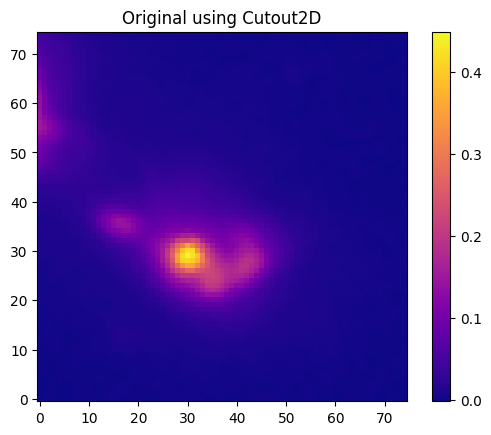

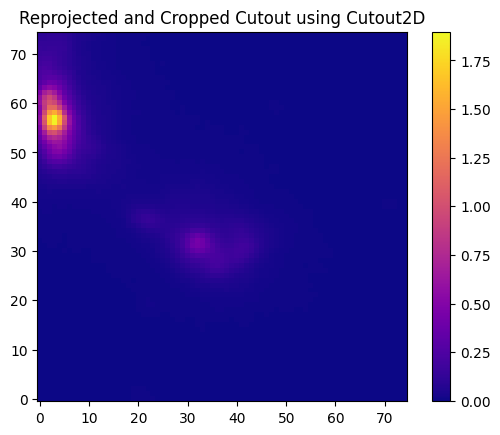

53.0968399
-27.8660679


In [4]:
import numpy as np
import pandas as pd  # Importing pandas
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
from reproject import reproject_interp
import matplotlib.pyplot as plt
from astropy import units as u

# Load the catalog and the FITS file
cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'
fits_file = '/home/juliantearney/Downloads/jades_356.fits'
fits_file_2 = '/home/juliantearney/Downloads/fresco_814.fits'

# Read catalog
data = pd.read_csv(cat_file, sep=' ', header=0)
data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
ra_values = data['ra'].values
dec_values = data['dec'].values

# Load the FITS image
with fits.open(fits_file) as hdul:
    image_data = hdul[1].data
    header = hdul[1].header

with fits.open(fits_file_2) as hdul_2:
    image_data_2 = hdul_2[0].data
    header_2 = hdul_2[0].header

# WCS setup
wcs = WCS(header)
wcs_2 = WCS(header_2)
size = (75, 75) * u.pixel
larger_size = (150, 150) * u.pixel

# Define position (example)
pos = SkyCoord(ra_values[7855], dec_values[7855], unit='deg', frame='icrs')

# Take a larger cutout from the source image
cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
larger_cutout = Cutout2D(image_data, pos, size=larger_size, wcs=wcs)
larger_cutout_2 = Cutout2D(image_data_2, pos, size=larger_size, wcs=wcs_2)

# Now reproject the larger cutout to the target header
reprojected_larger_cutout, _ = reproject_interp((larger_cutout.data, larger_cutout.wcs), larger_cutout_2.wcs, shape_out=larger_cutout_2.data.shape)

# Create a Cutout2D from the reprojected larger cutout
final_cutout = Cutout2D(reprojected_larger_cutout, (larger_cutout_2.center_cutout[1], larger_cutout_2.center_cutout[0]), size=(75, 75), wcs=larger_cutout_2.wcs)

# Display the final cropped image using matplotlib
plt.imshow(cutout.data, cmap='plasma', origin='lower')
plt.colorbar()
plt.title("Original using Cutout2D")
plt.show()

plt.imshow(final_cutout.data, cmap='plasma', origin='lower')
plt.colorbar()
plt.title("Reprojected and Cropped Cutout using Cutout2D")
plt.show()

print(ra_values[7855])
print(dec_values[7855])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from photutils.datasets import make_100gaussians_image
from astropy.wcs import WCS
from photutils.segmentation import make_2dgaussian_kernel, detect_sources, deblend_sources
from photutils.background import Background2D, MedianBackground, SExtractorBackground
from photutils.segmentation import SourceCatalog, SegmentationImage
from astropy.visualization import simple_norm
from astropy.nddata import NDData
from astropy import units as u
from photutils.segmentation import detect_threshold
import matplotlib as mpl
# NFFT for Fourier Transforms
import nfft
import os
import sys
from IPython.display import display, HTML
# Astropy Cosmology
from astropy.cosmology import Planck18, FlatLambdaCDM
import pandas as pd  # Importing pandas
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
from astropy import units as u

def galaxy_segmentation_correct(image, wcs, target_ra, target_dec, threshold, npixels, max_separation):
    """
    Segment galaxies in an image and identify the segment corresponding to a target galaxy.
    This version uses RA and Dec (deg) exclusively and does not use pixel coordinates.
    If multiple segments are relatively close to the center, the largest one is selected.
    
    Parameters:
    - image: 2D numpy array of the image data.
    - wcs: WCS object for converting between pixel and world coordinates.
    - target_ra: Right ascension of the target galaxy (in degrees).
    - target_dec: Declination of the target galaxy (in degrees).
    - threshold: Number of standard deviations above the background noise to consider a detection.
    - npixels: Minimum number of connected pixels for a source.
    - max_separation: Maximum allowed separation in arcseconds to consider a segment as a candidate.
    
    Returns:
    - image: The original image.
    - segment_map: The segmentation map with labeled segments.
    - target_mask: The binary mask for the target segment.
    """
    # Detect threshold and create a segmentation map
    threshold_value = detect_threshold(image, nsigma=threshold)
    segment_map = detect_sources(image, threshold=np.nanmean(threshold_value), npixels=npixels)

    if segment_map is None:
        raise ValueError("No sources were detected in the image.")

    # Create a source catalog for detected segments
    catalog = SourceCatalog(data=image, segment_img=segment_map)

    # Target galaxy coordinates
    target_coord = SkyCoord(ra=target_ra, dec=target_dec, unit="deg", frame='icrs')

    # Variables to store the best match
    best_segment_id = None
    max_area = 0

    # Find segments close to the target and select the largest one
    for idx, segment in enumerate(catalog):
        # Get the centroid in pixel coordinates (assuming centroid is in pixel space)
        segment_centroid_pixel = segment.centroid

        # Convert the pixel centroid to sky coordinates (RA/Dec)
        segment_centroid_sky = wcs.pixel_to_world(segment_centroid_pixel[0], segment_centroid_pixel[1])

        # Calculate the separation between the target and the segment centroid in sky coordinates
        separation = target_coord.separation(segment_centroid_sky).arcsecond

        # Check if this segment is within the maximum allowed separation
        if separation <= max_separation:
            # Compare the area of this segment to the current maximum area
            if segment.area > max_area:
                max_area = segment.area
                best_segment_id = idx + 1  # Segmentation labels are 1-based

    # Extract the target segment mask if found
    if best_segment_id is not None:
        target_mask = segment_map.data == best_segment_id
    else:
        target_mask = None

    return image, segment_map.data, target_mask

def galaxy_segmentation(image, wcs, target_ra, target_dec, threshold, npixels):
    """
    Segment galaxies in an image and identify the segment corresponding to a target galaxy.
    This version uses RA and Dec (deg) exclusively and does not use pixel coordinates.
    """
    # Detect threshold and create a segmentation map
    threshold_value = detect_threshold(image, nsigma=threshold)
    segment_map = detect_sources(image, threshold=np.nanmean(threshold_value), npixels=npixels)

    if segment_map is None:
        raise ValueError("No sources were detected in the image.")

    # Create a source catalog for detected segments
    catalog = SourceCatalog(data=image, segment_img=segment_map)

    # Target galaxy coordinates
    target_coord = SkyCoord(ra=target_ra, dec=target_dec, unit="deg", frame='icrs')

    # Variables to store the best match
    min_separation = float("inf")
    target_segment_id = None

    # Find the segment with the shortest separation to the target (using RA/Dec only)
    for idx, segment in enumerate(catalog):
        # Get the centroid in pixel coordinates (assuming centroid is in pixel space)
        segment_centroid_pixel = segment.centroid

        # Convert the pixel centroid to sky coordinates (RA/Dec)
        segment_centroid_sky = wcs.pixel_to_world(segment_centroid_pixel[0], segment_centroid_pixel[1])

        # Calculate the separation between the target and the segment centroid in sky coordinates
        separation = target_coord.separation(segment_centroid_sky).arcsecond
        print(separation)

        # Update the best match if a smaller separation is found
        if separation < min_separation:
            min_separation = separation
            target_segment_id = idx + 1  # Segmentation labels are 1-based

    # Extract the target segment mask if found
    if target_segment_id is not None:
        target_mask = segment_map.data == target_segment_id
    else:
        target_mask = None

    return image, segment_map.data, target_mask

cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'

data = pd.read_csv(cat_file, sep=' ', header=0)
data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
ra_values = data['ra'].values
dec_values = data['dec'].values

fits_file = '/home/juliantearney/Downloads/fresco_160.fits'

# Load the FITS image
with fits.open(fits_file) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header

wcs = WCS(header)

broken_gal = [16072, 18459]
image = []
segment_map = []
target_mask = []

for i in broken_gal:
    pos = SkyCoord(ra_values[i-1], dec_values[i-1], unit='deg', frame='icrs')
    size = (75, 75) * u.pixel
    cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)

    # Segment galaxies and find the target
    img, seg_map, tgt_mask = galaxy_segmentation(
        image=cutout.data, 
        wcs=cutout.wcs, 
        target_ra=ra_values[i-1], 
        target_dec=dec_values[i-1], 
        threshold=4, 
        npixels=4,
    )
    
    image.append(img)
    segment_map.append(seg_map)
    target_mask.append(tgt_mask)



/home/juliantearney/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.5919452683285127
1.3064286591904202
0.24464941317230263
1.4190056375957085
0.8184862750976296
0.1482480611888029
0.6570353335351189
0.7982310374864524
1.4592603434153917


In [8]:
target_image = []
noise_filled_image = []
reconstructed_image = []

def process_segmented_image(image, segment_map, target_mask):
    """
    Process a segmented image to extract the target source and reconstruct the background.
    """
    # Task 1: Extract the target source image
    target_image = np.zeros_like(image)
    if target_mask is not None:
        target_image[target_mask] = image[target_mask]

    # Task 2: Mask all segments and fill them with noise
    all_segments_mask = segment_map > 0  # Mask for all segments
    background_mask = ~all_segments_mask  # Mask for background (no segments)

    # Estimate noise from the background
    background_pixels = image[background_mask]
    noise_mean = np.mean(background_pixels)
    noise_std = np.std(background_pixels)

    # Generate a noise-filled image
    noise_filled_image = image.copy()
    random_noise = np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape)
    noise_filled_image[all_segments_mask] = random_noise[all_segments_mask]

    # Reconstruct the image with the target source and noise-filled segments
    reconstructed_image = noise_filled_image.copy()
    if target_mask is not None:
        reconstructed_image[target_mask] = image[target_mask]  # Restore the target source

    return target_image, noise_filled_image, reconstructed_image

target_image = []
noise_filled_image = []
reconstructed_image = []

for img, seg_map, t_mask in zip(image, segment_map, target_mask):
    tgt_img, noise_img, recon_img = process_segmented_image(
        image=img, 
        segment_map=seg_map, 
        target_mask=t_mask
    )
    
    target_image.append(tgt_img)
    noise_filled_image.append(noise_img)
    reconstructed_image.append(recon_img)


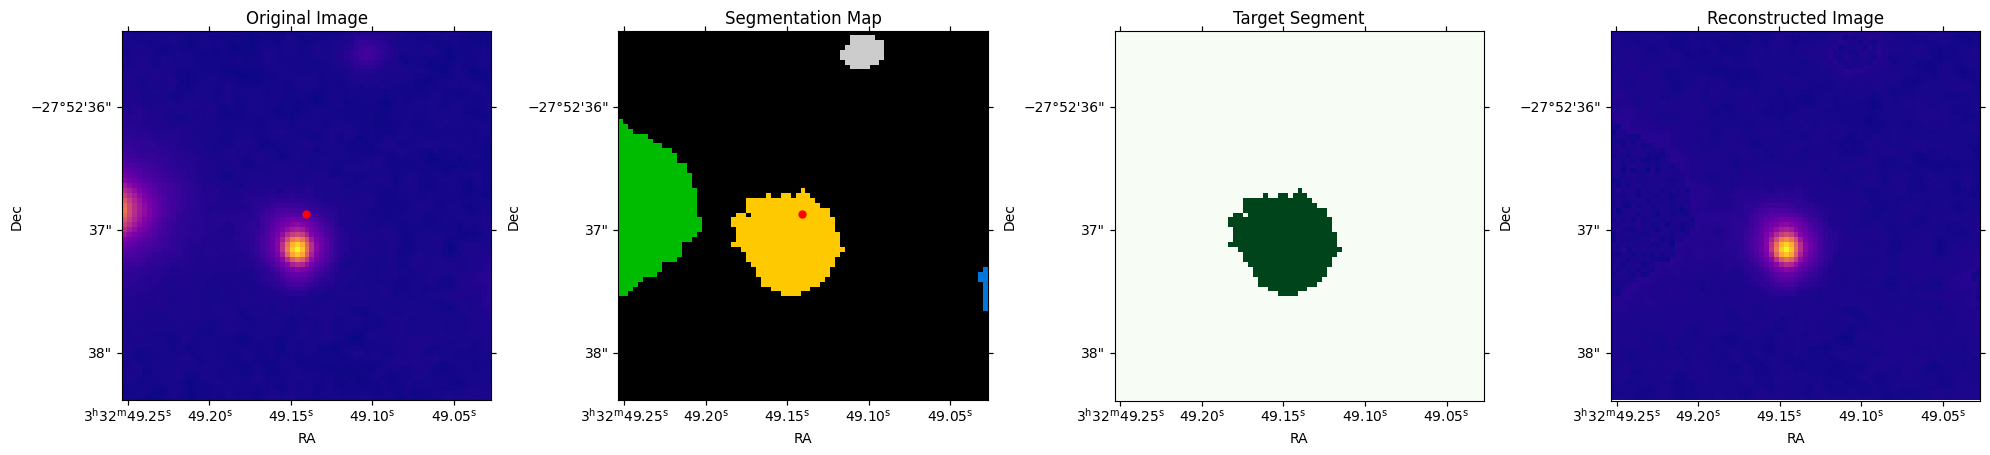

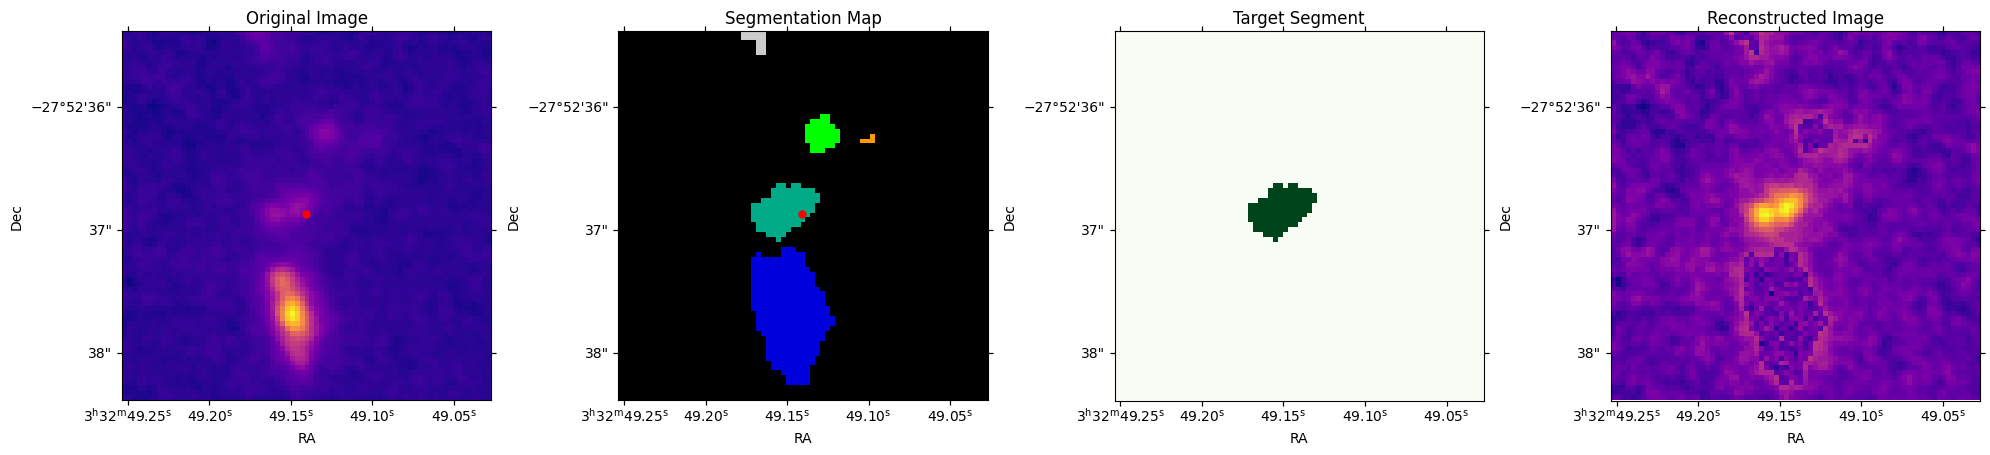

In [9]:
# Get the updated WCS from the cutout
cutout_wcs = cutout.wcs

# Convert the RA/Dec of the position to the cutout's pixel coordinates
cutout_x, cutout_y = cutout_wcs.world_to_pixel(pos)


for img, seg_map, t_mask, recon_img in zip(image, segment_map, target_mask, reconstructed_image):
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={"projection": wcs})

    # Original Image
    axes[0].imshow(img, origin="lower", cmap="plasma")
    axes[0].set_title("Original Image")
    axes[0].set_xlabel("RA")
    axes[0].set_ylabel("Dec")
    axes[0].plot(cutout_x, cutout_y, 'ro', markersize=5)
    # Segmentation Map
    axes[1].imshow(seg_map, origin="lower", cmap="nipy_spectral")
    axes[1].set_title("Segmentation Map")
    axes[1].set_xlabel("RA")
    axes[1].set_ylabel("Dec")
    axes[1].plot(cutout_x, cutout_y, 'ro', markersize=5)
    # Target Segment

    axes[2].imshow(t_mask, origin="lower", cmap="Greens")
    axes[2].set_title("Target Segment")
    axes[2].set_xlabel("RA")
    axes[2].set_ylabel("Dec")
    # Reconstructed Image

    axes[3].imshow(recon_img, origin="lower", cmap="plasma")
    axes[3].set_title("Reconstructed Image")
    axes[3].set_xlabel("RA")
    axes[3].set_ylabel("Dec")
    plt.tight_layout()
    plt.show()

In [15]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from reproject import reproject_interp
from scipy.ndimage import zoom
from skimage.transform import resize

missing_galaxies = set()
bad_galaxies = [12030, 12694, 12824, 11541, 10092, 9845]

def cut_galaxies(file_name, filter, hdu):
    cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'
    fits_file = f'/home/juliantearney/Downloads/{file_name}.fits'
    data = pd.read_csv(cat_file, sep=' ', header=0)
    data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
    ra_values = data['ra'].values
    dec_values = data['dec'].values

    with fits.open(fits_file) as hdul:
        image_data = hdul[hdu].data
        header = hdul[hdu].header
        
    with fits.open('/home/juliantearney/Downloads/fresco_814.fits') as hdul_2:
        image_data_2 = hdul_2[0].data
        header_2 = hdul_2[0].header    
        
    wcs = WCS(header)
    wcs_2 = WCS(header_2)
    larger_size = (150, 150) * u.pixel
    crop_size = (75, 75) * u.pixel
    cutouts = {}
    wcs_cutouts = {}

    for i in  int_ids:
        pos = SkyCoord(ra_values[i-1], dec_values[i-1], unit='deg', frame='icrs')
        
        if i in bad_galaxies:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue

        elif filter==356:
            larger_cutout = Cutout2D(image_data, pos, size=larger_size, wcs=wcs)
            larger_cutout_2 = Cutout2D(image_data_2, pos, size=larger_size, wcs=wcs_2)
            if np.sum(larger_cutout.data) == 0:
                missing_galaxies.add(data['id'].iloc[i-1])
                continue
            reprojected_cutout, _ = reproject_interp((larger_cutout.data, larger_cutout.wcs), larger_cutout_2.wcs, shape_out=larger_cutout_2.data.shape)
            final_cutout = Cutout2D(reprojected_cutout, (larger_cutout_2.center_cutout[1], larger_cutout_2.center_cutout[0]), size=crop_size, wcs=larger_cutout_2.wcs)
            image, segment_map, target_mask = galaxy_segmentation_correct(image=final_cutout.data, wcs=final_cutout.wcs, target_ra=pos.ra.deg, target_dec=pos.dec.deg, threshold=9, npixels=10, max_separation=0.6)
            print(f"Unique values in segmentation map: {np.unique(segment_map)}")
            target_image, noise_filled_image, reconstructed_image = process_segmented_image(image=image, segment_map=segment_map, target_mask=target_mask)
            print(f'mask applied for galaxy{i}')
            cutouts[data['id'].iloc[i-1]] = reconstructed_image
            
        elif data['id'].iloc[i-1] in missing_galaxies:
            continue
        
        else:
            cutout = Cutout2D(image_data, pos, size=crop_size, wcs=wcs)
            if filter==814:
                image, segment_map, target_mask = galaxy_segmentation_correct(image=cutout.data, wcs=cutout.wcs, target_ra=pos.ra.deg, target_dec=pos.dec.deg, threshold=3, npixels=1, max_separation=0.6)
                target_image, noise_filled_image, reconstructed_image = process_segmented_image(image=image, segment_map=segment_map, target_mask=target_mask)
                cutouts[data['id'].iloc[i-1]] = reconstructed_image
            else:
                image, segment_map, target_mask = galaxy_segmentation_correct(image=cutout.data, wcs=cutout.wcs, target_ra=pos.ra.deg, target_dec=pos.dec.deg, threshold=4, npixels=1, max_separation=0.55)
                target_image, noise_filled_image, reconstructed_image = process_segmented_image(image=image, segment_map=segment_map, target_mask=target_mask)
                rescale_factor = 0.1875/0.04
                rescaled_image = zoom(reconstructed_image, rescale_factor)
                resized_image = resize(rescaled_image, (75, 75), mode='reflect', anti_aliasing=True)
                cutouts[data['id'].iloc[i-1]] = resized_image
                
        print(f'{i} cut out done')

    return cutouts
 
# Collect cutouts for each filter
cutouts_356 = cut_galaxies('jades_356', 356, 1)
cutouts_814 = cut_galaxies('fresco_814', 814, 0)
cutouts_160 = cut_galaxies('fresco_160', 160, 0)

# Ensure each galaxy's cutouts are stacked into a consistent 3D array
combined_cutouts_list = []
for galaxy_id in cutouts_356.keys():
    if galaxy_id in cutouts_814 and galaxy_id in cutouts_160:
        stacked_cutouts = np.stack([
            cutouts_814[galaxy_id],
            cutouts_160[galaxy_id],
            cutouts_356[galaxy_id],
        ])
        combined_cutouts_list.append(stacked_cutouts)

# Convert list to a 4D NumPy array
combined_cutouts_array = np.stack(combined_cutouts_list).astype(np.float32)

# Save the 4D array to a single FITS file
hdu = fits.PrimaryHDU(data=combined_cutouts_array)
hdu_list = fits.HDUList([hdu])
hdu_list.writeto(dir_test + 'combined_cutouts.fits', overwrite=True)


Set DATE-AVG to '2022-10-08T01:38:08.426' from MJD-AVG.
Set DATE-END to '2022-10-08T04:53:29.401' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    22.225686 from OBSGEO-[XYZ].
Set OBSGEO-H to 1235003121.785 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Unique values in segmentation map: [0 1]
mask applied for galaxy7172
7172 cut out done
Unique values in segmentation map: [0 1]
mask applied for galaxy7448
7448 cut out done
Unique values in segmentation map: [0 1]
mask applied for galaxy7453
7453 cut out done
Unique values in segmentation map: [0 1 2]
mask applied for galaxy7629
7629 cut out done
Unique values in segmentation map: [0 1 2]
mask applied for galaxy7706
7706 cut out done
Unique values in segmentation map: [0 1]
mask applied for galaxy7814
7814 cut out done
Unique values in segmentation map: [0 1 2]
mask applied for galaxy7836
7836 cut out done
Unique values in segmentation map: [0 1 2]
mask applied for galaxy7856
7856 cut out done
Unique values in segmentation map: [0 1 2 3]
mask applied for galaxy7867
7867 cut out done
Unique values in segmentation map: [0 1 2]
mask applied for galaxy7887
7887 cut out done
Unique values in segmentation map: [0 1 2]
mask applied for galaxy7932
7932 cut out done
Unique values in segmentati

In [ ]:
with fits.open('/home/juliantearney/Downloads/fresco_160.fits') as hdul_2:
        image_data_2 = hdul_2[0].data
        header_2 = hdul_2[0].header

wcs_2 = WCS(header_2)
print(header_2)

In [15]:
# Ensure each galaxy's cutouts are stacked into a consistent 3D array
combined_cutouts_list_160 = []
for galaxy_id in cutouts_356.keys():
    if galaxy_id in cutouts_160 and galaxy_id in cutouts_160:
        stacked_cutouts_160 = np.stack([
            cutouts_160[galaxy_id],
            cutouts_160[galaxy_id],
            cutouts_160[galaxy_id],
        ])
        combined_cutouts_list_160.append(stacked_cutouts_160)

# Convert list to a 4D NumPy array
combined_cutouts_array_160 = np.stack(combined_cutouts_list_160).astype(np.float32)

# Save the 4D array to a single FITS file
hdu_160 = fits.PrimaryHDU(data=combined_cutouts_array_160)
hdu_list_160 = fits.HDUList([hdu_160])
hdu_list_160.writeto(dir_test + 'combined_cutouts_160.fits', overwrite=True)

In [99]:
print(missing_galaxies)
print(len(missing_galaxies))

# Loop through int_ids and print IDs not in missing_galaxies
for galaxy_id in int_ids:
    if galaxy_id not in missing_galaxies:
        print(galaxy_id)


{np.int64(10112), np.int64(20988), np.int64(19843), np.int64(19590), np.int64(23047), np.int64(16907), np.int64(22545), np.int64(10388), np.int64(11541), np.int64(12694), np.int64(15639), np.int64(12824), np.int64(21012), np.int64(9371), np.int64(23841), np.int64(18724), np.int64(16933), np.int64(21542), np.int64(22309), np.int64(23589), np.int64(17705), np.int64(21678), np.int64(20146), np.int64(24500), np.int64(21430), np.int64(22654), np.int64(20027), np.int64(24506), np.int64(22909), np.int64(16705), np.int64(21955), np.int64(17477), np.int64(23751), np.int64(16717), np.int64(23421), np.int64(23511), np.int64(18776), np.int64(7129), np.int64(21210), np.int64(7387), np.int64(21090), np.int64(20836), np.int64(10730), np.int64(10092), np.int64(20720), np.int64(16113), np.int64(22768), np.int64(24179), np.int64(23412), np.int64(9845), np.int64(21621), np.int64(16764), np.int64(18685), np.int64(12030)}
54
7172
7448
7453
7629
7706
7814
7836
7856
7867
7887
7932
7968
8020
8074
8116
8131
82

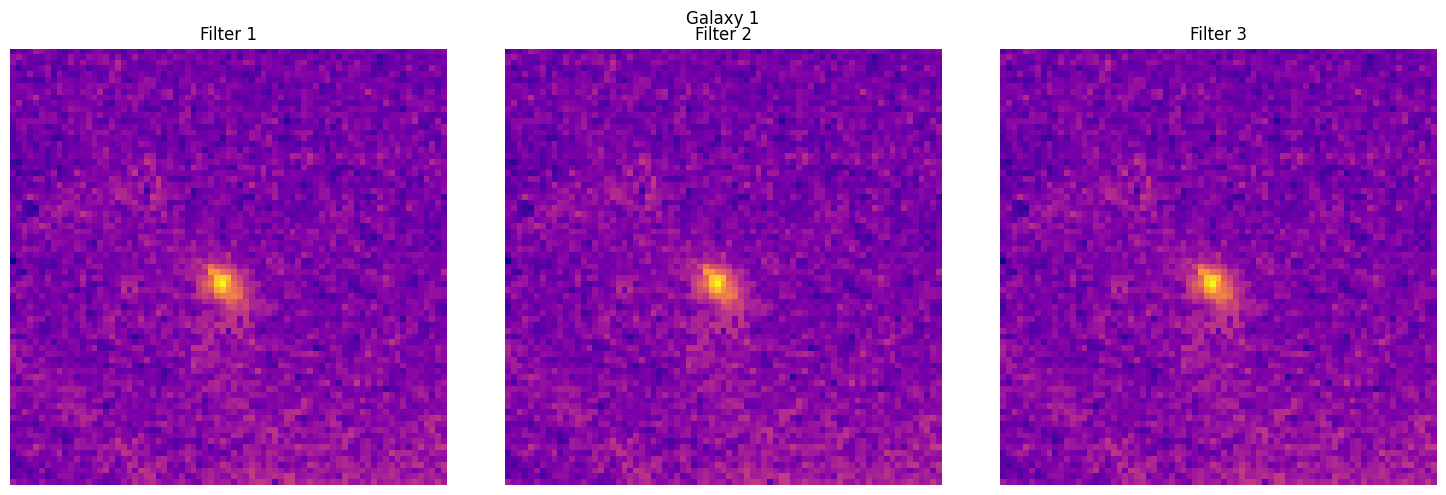

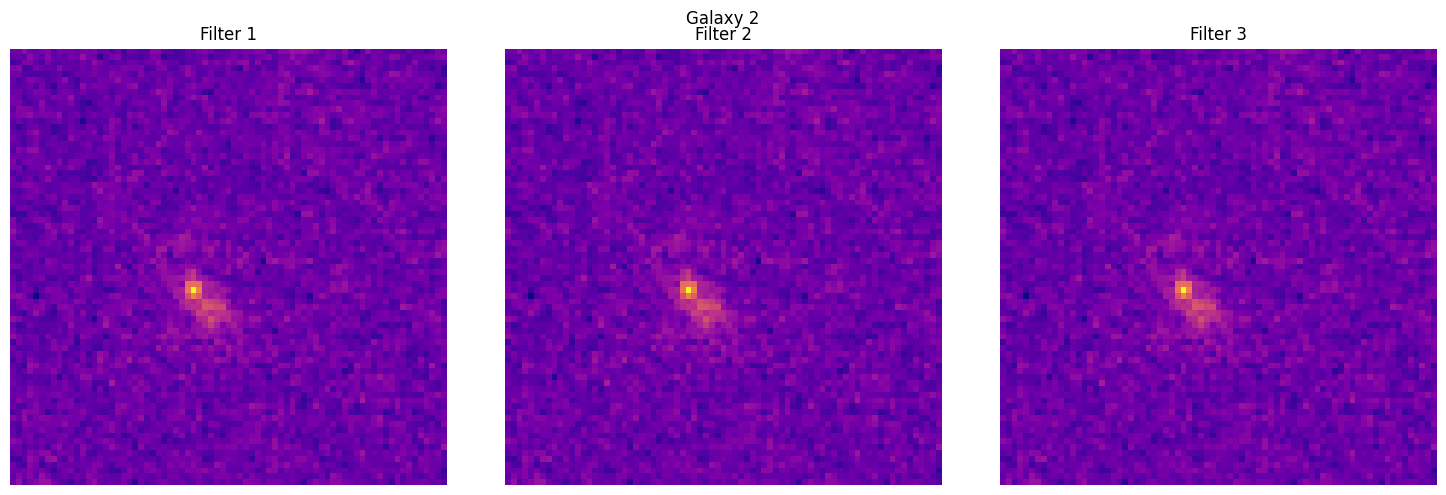

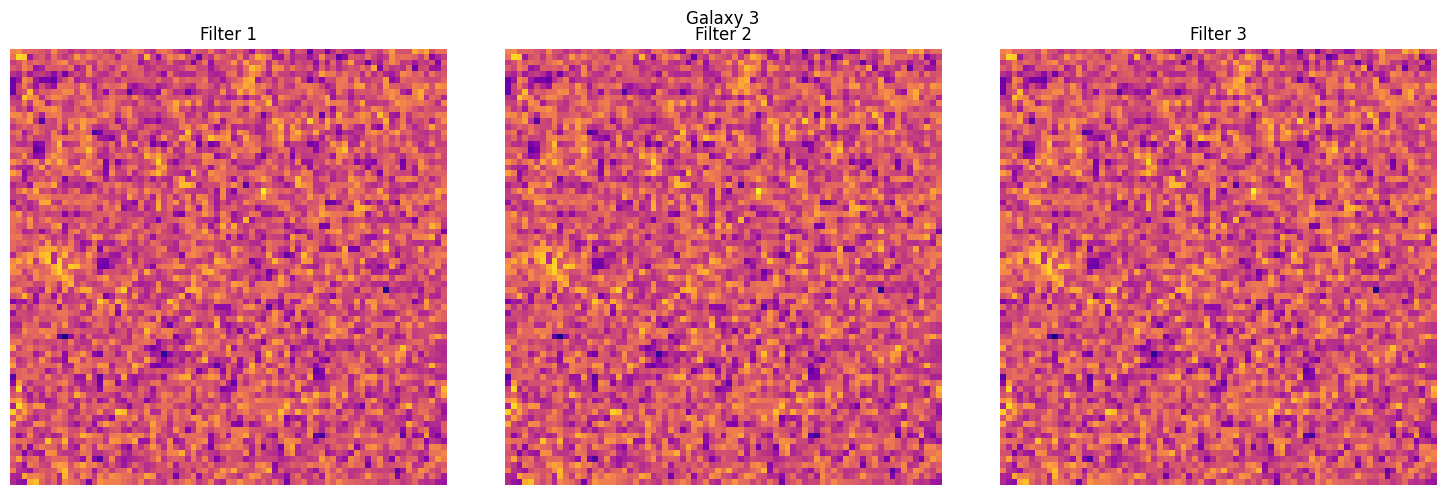

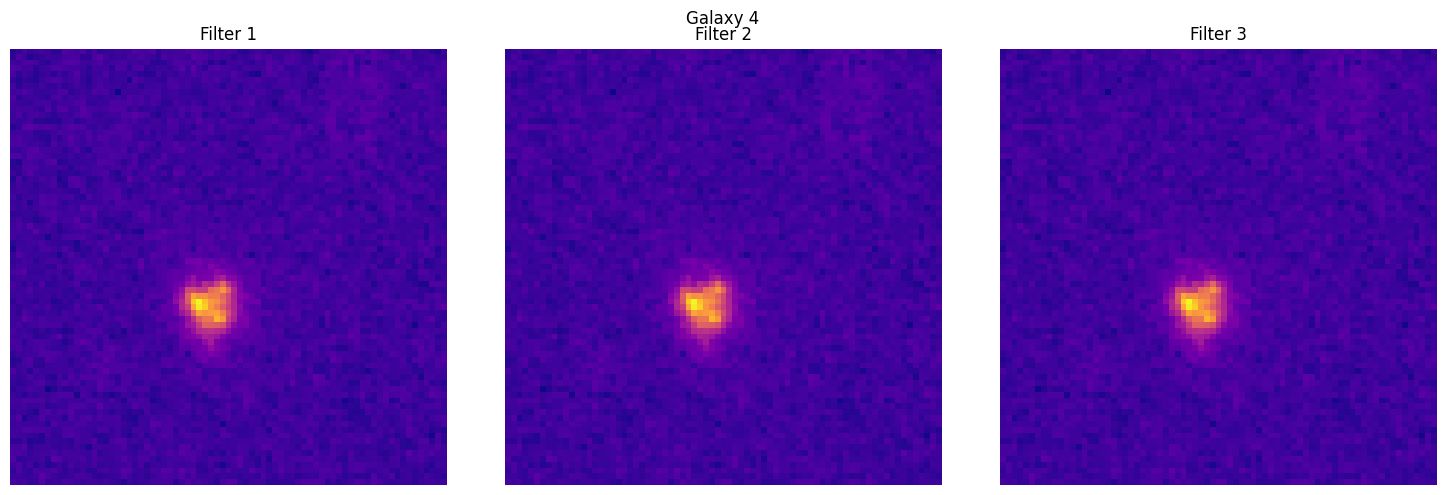

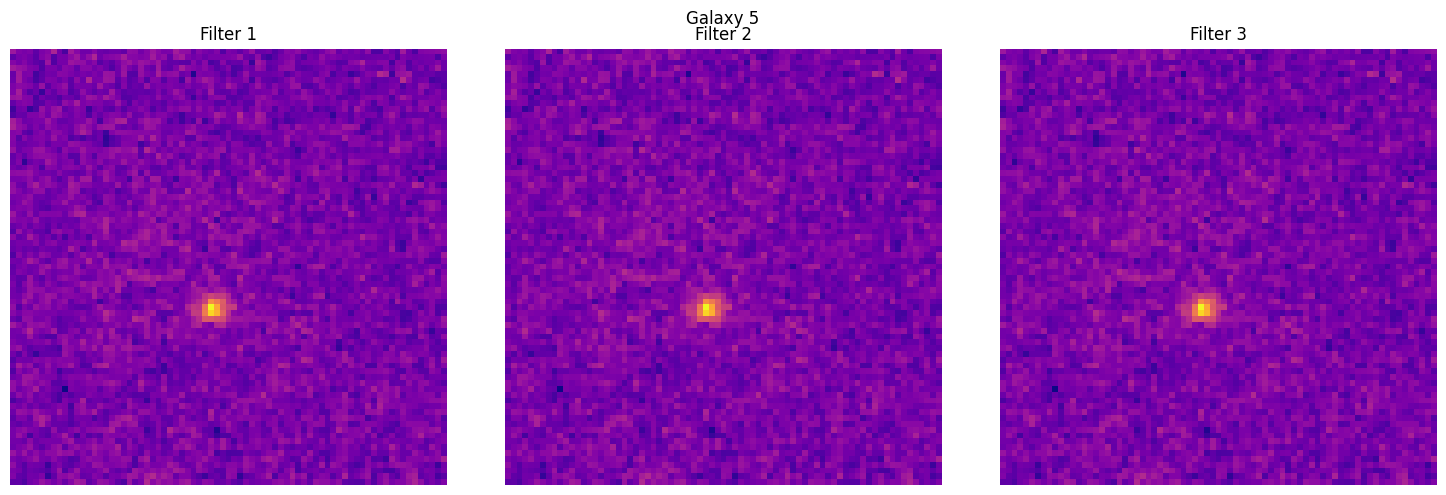

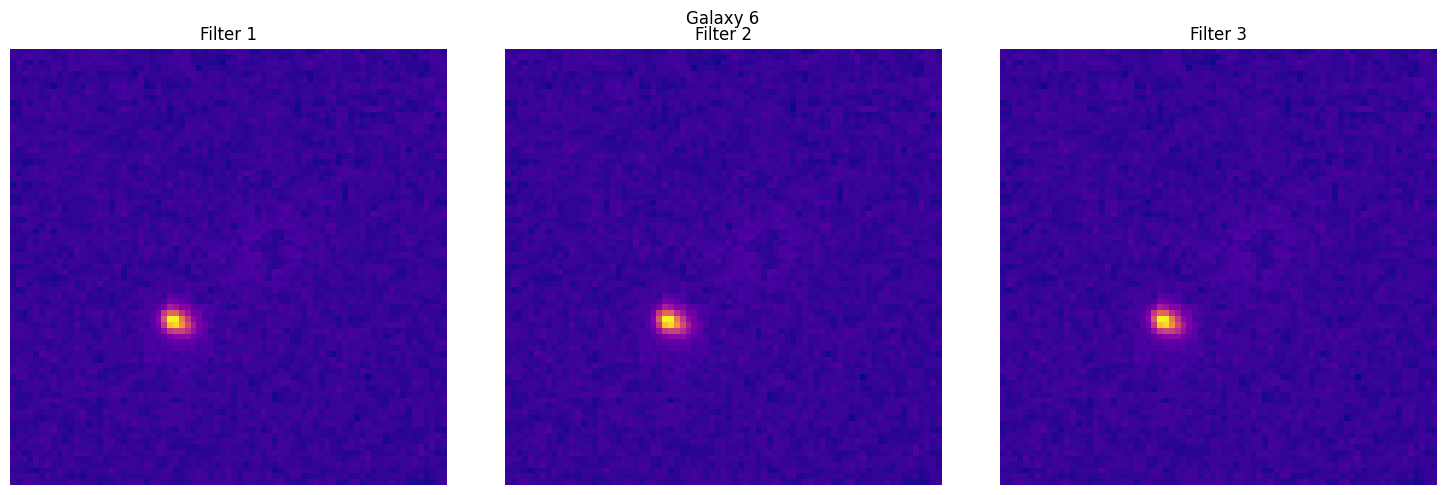

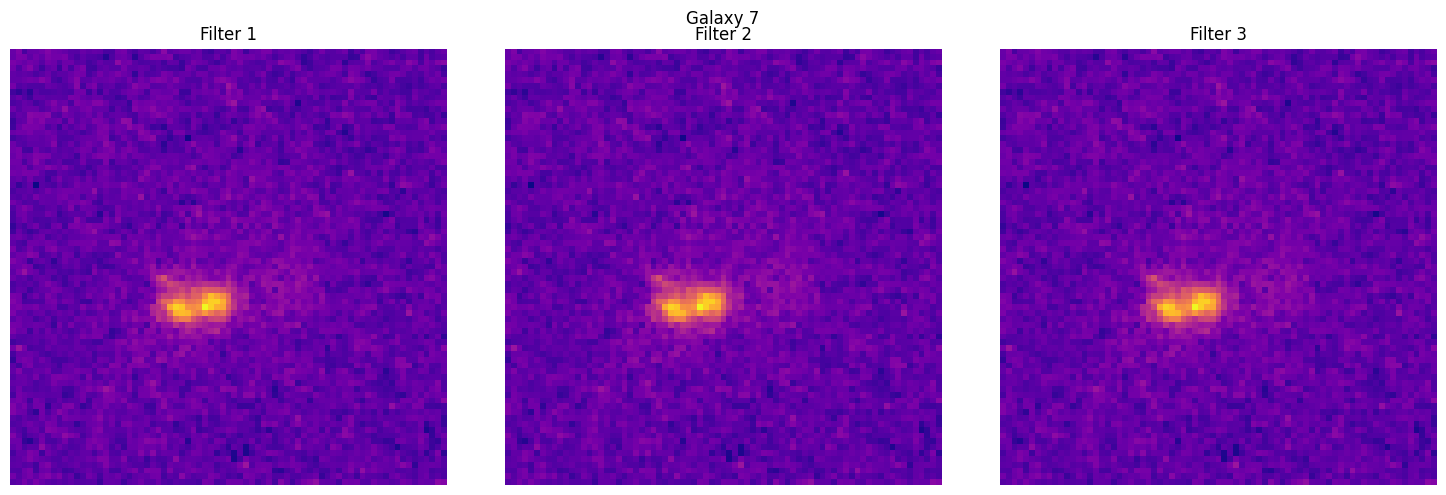

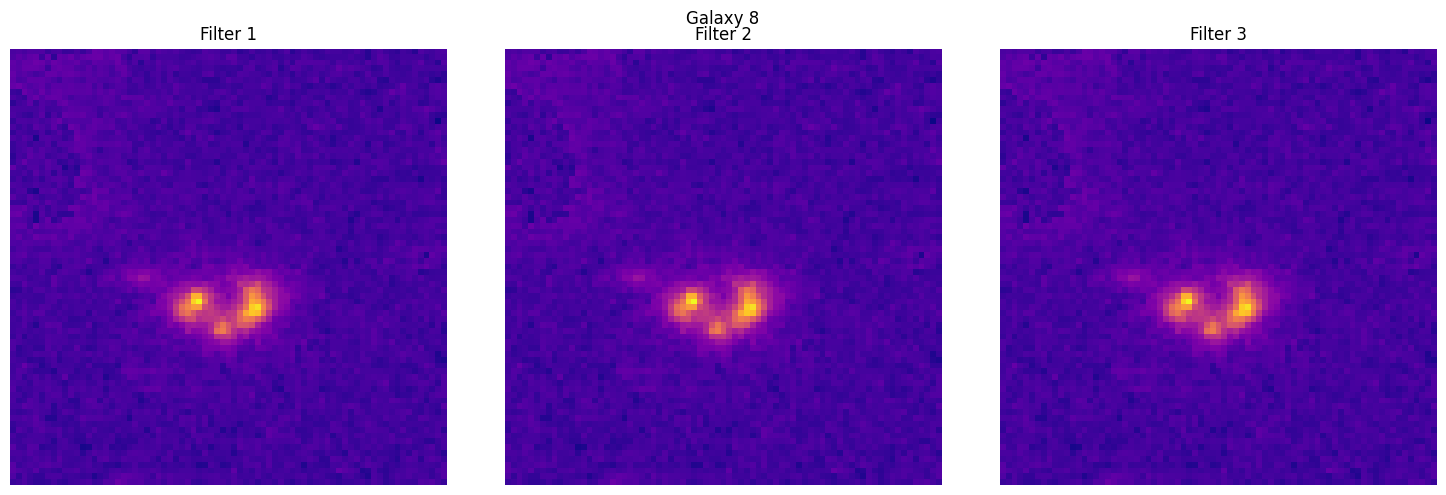

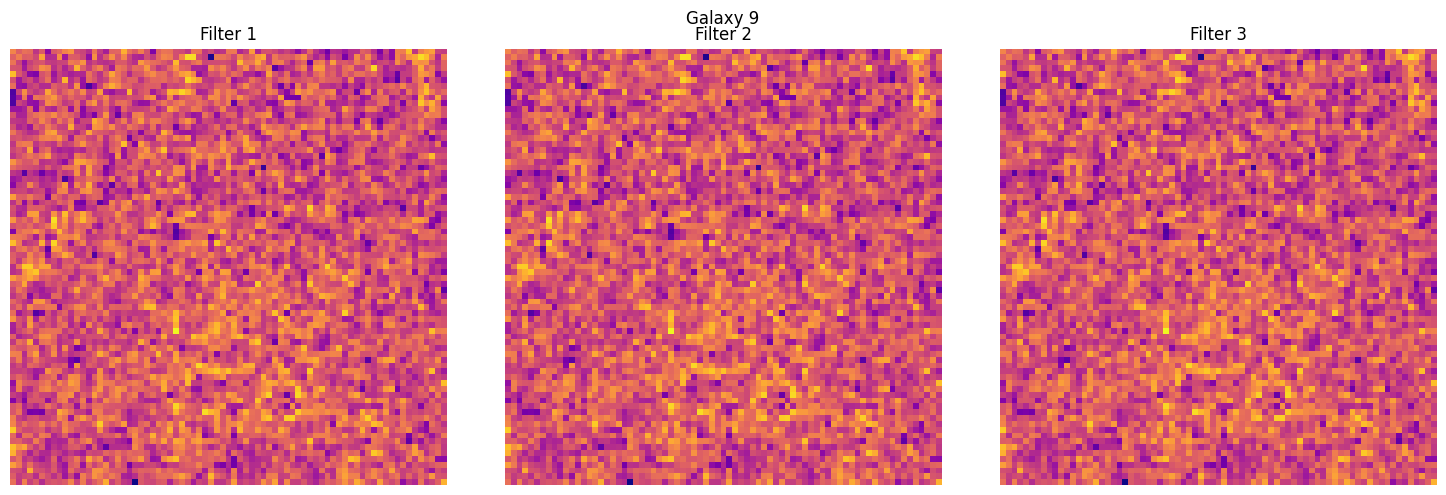

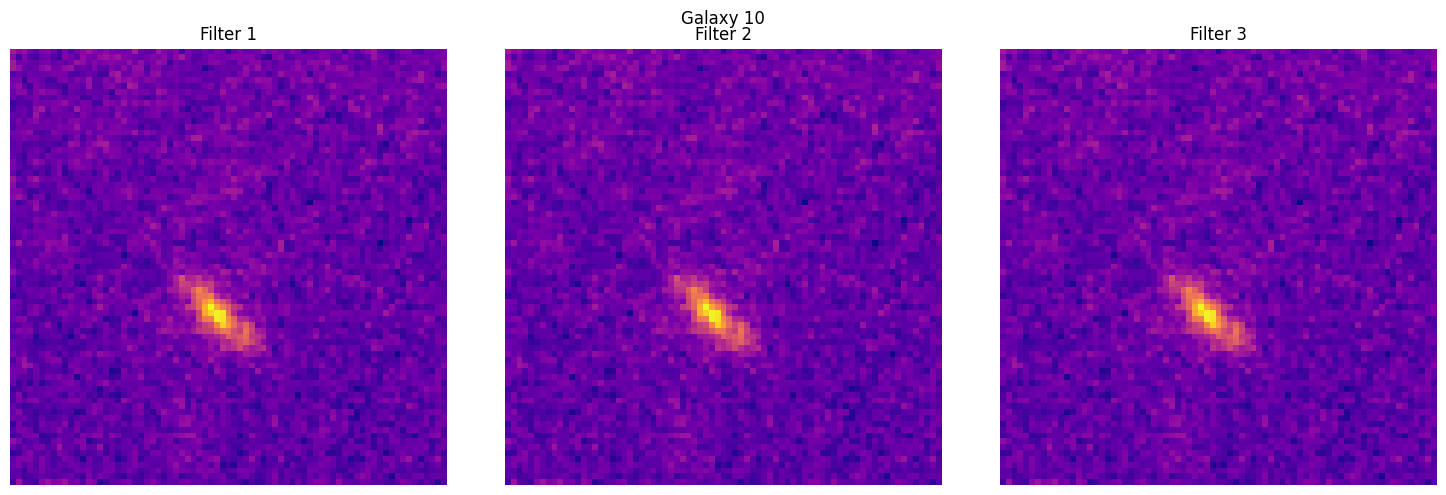

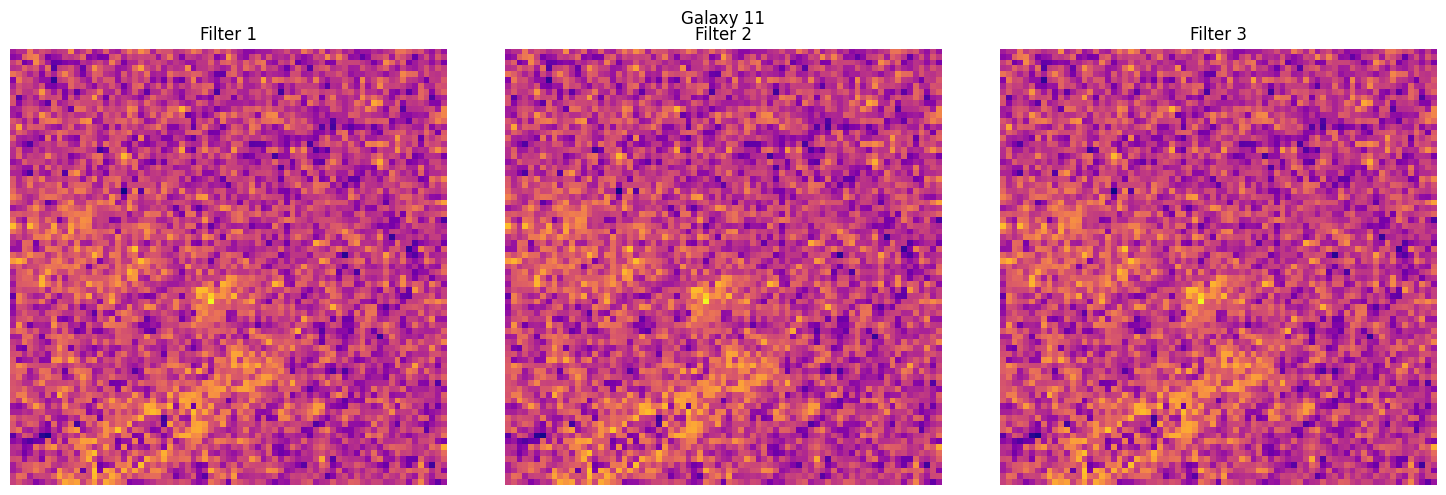

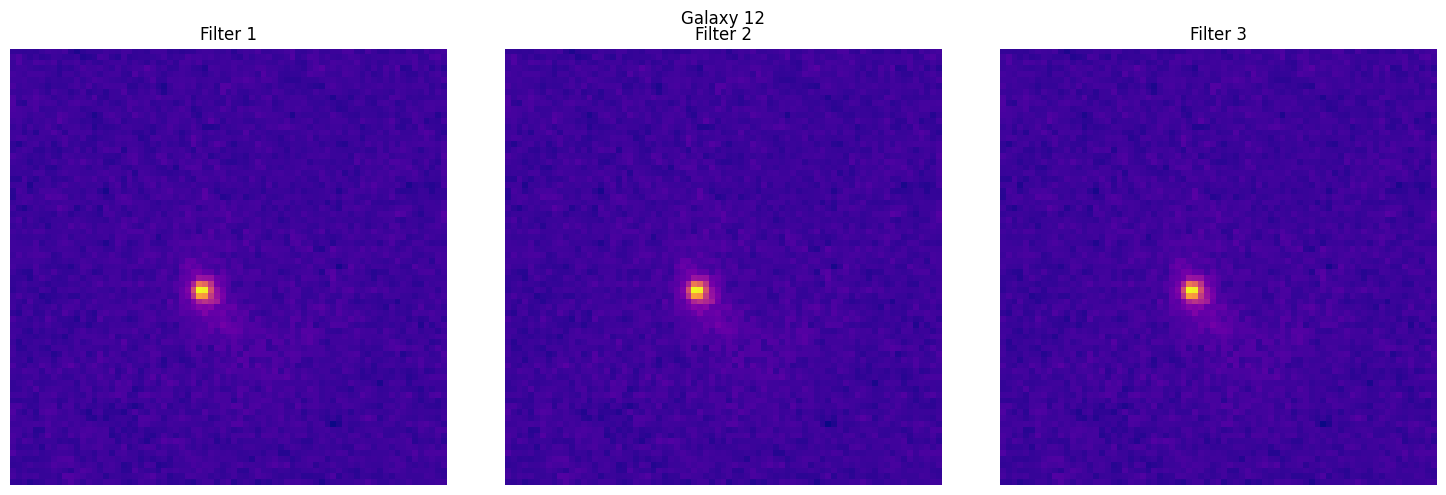

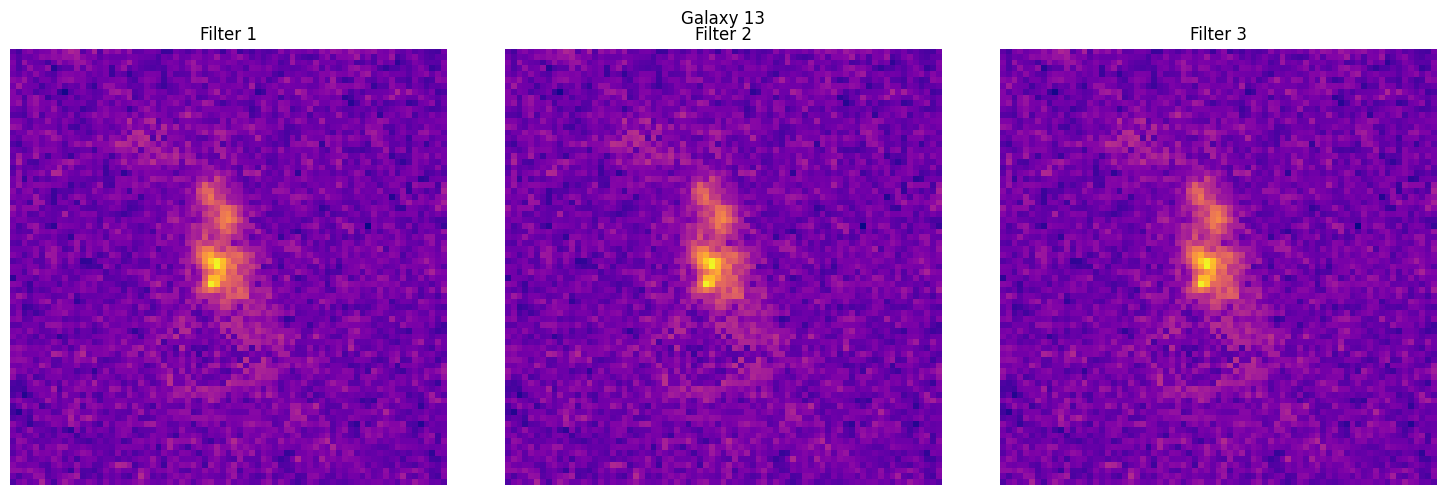

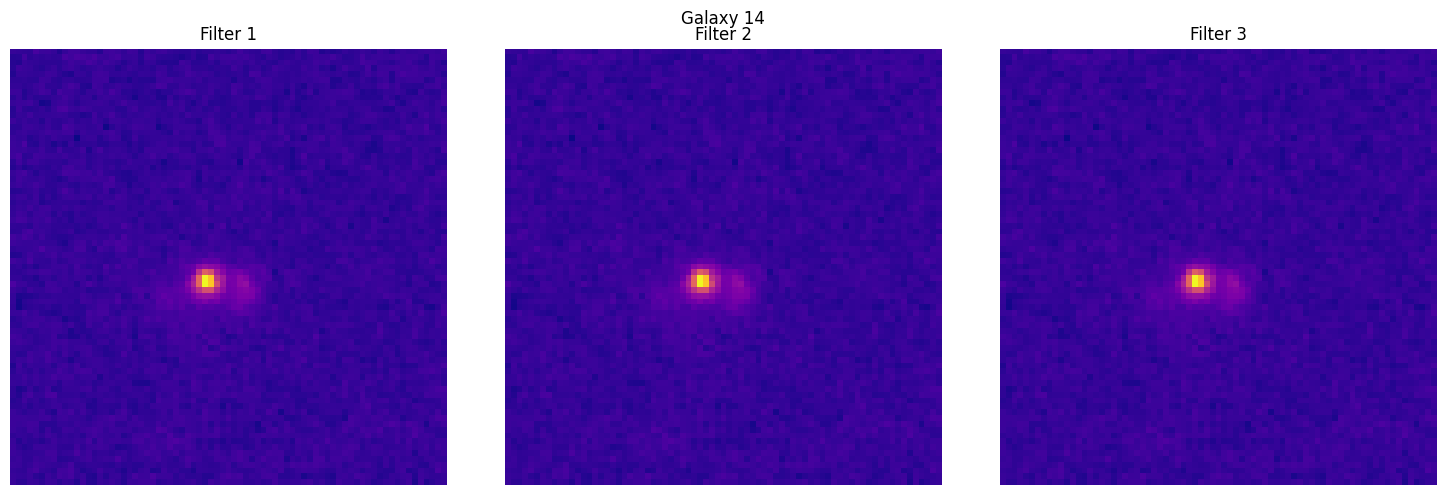

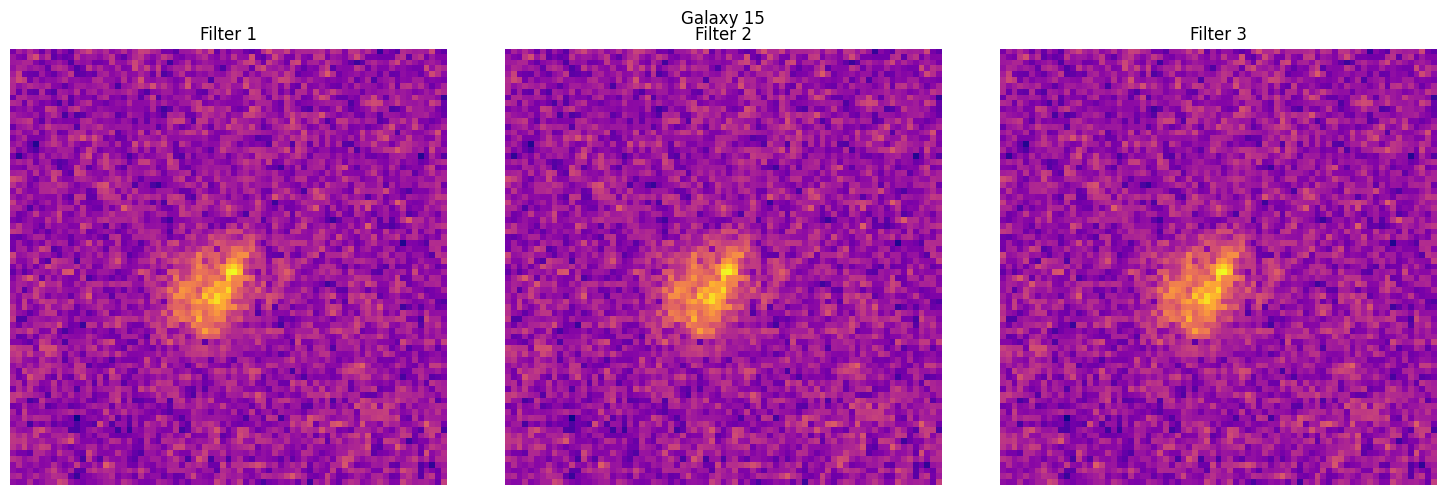

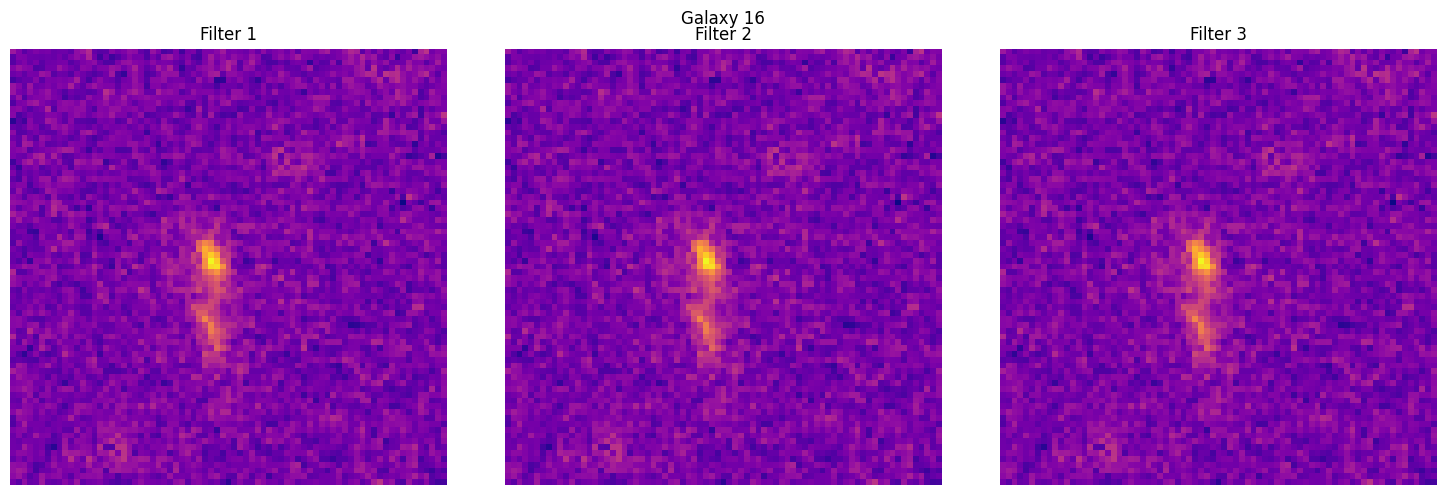

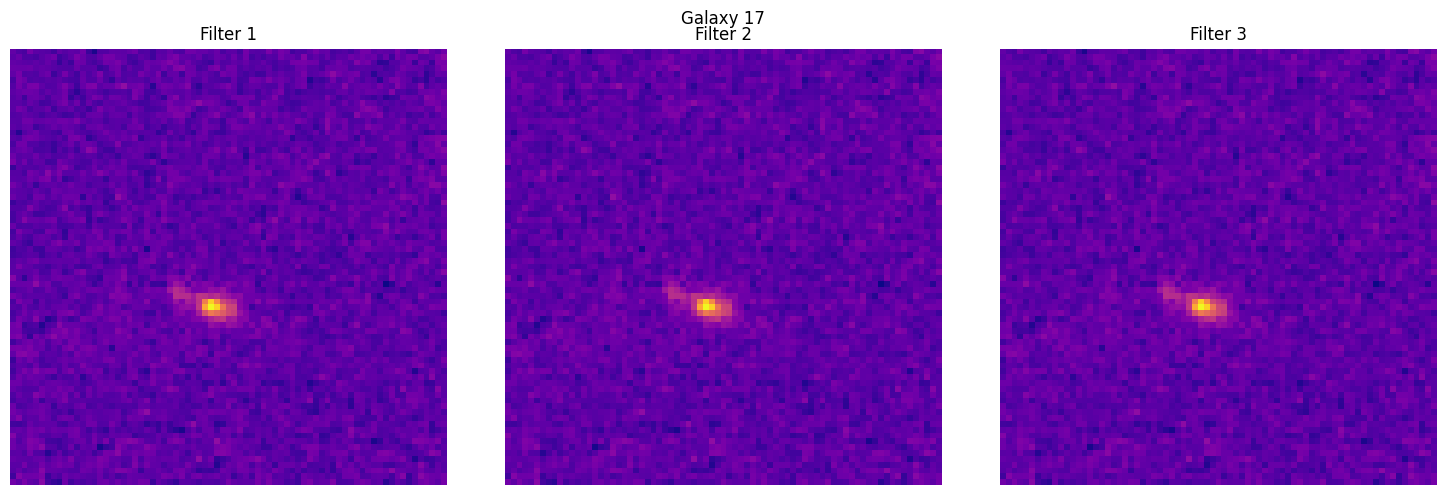

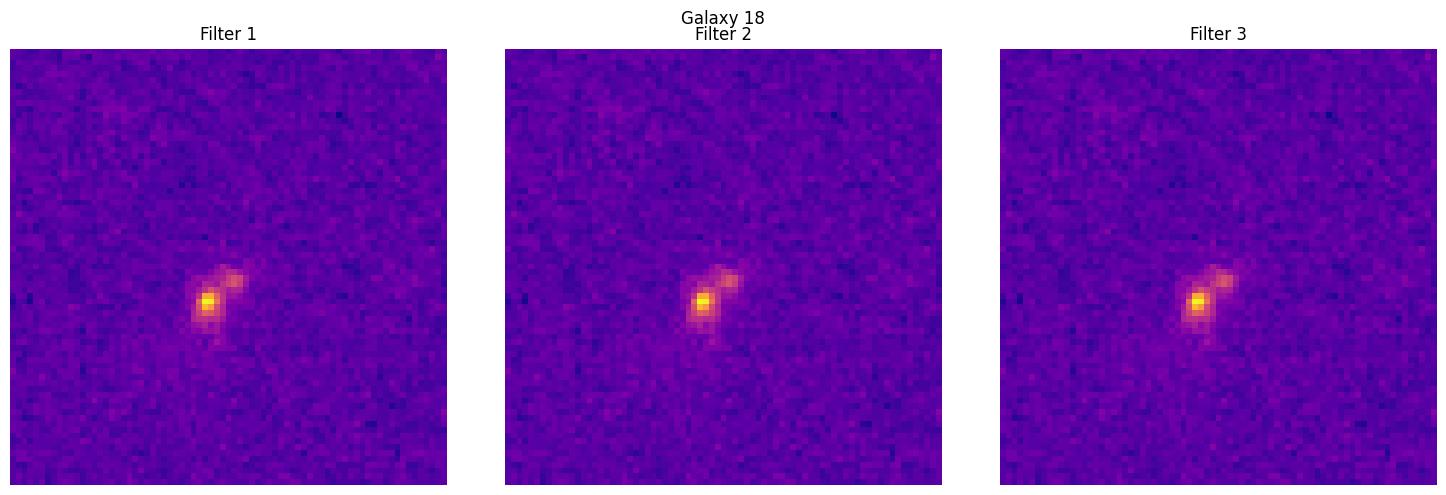

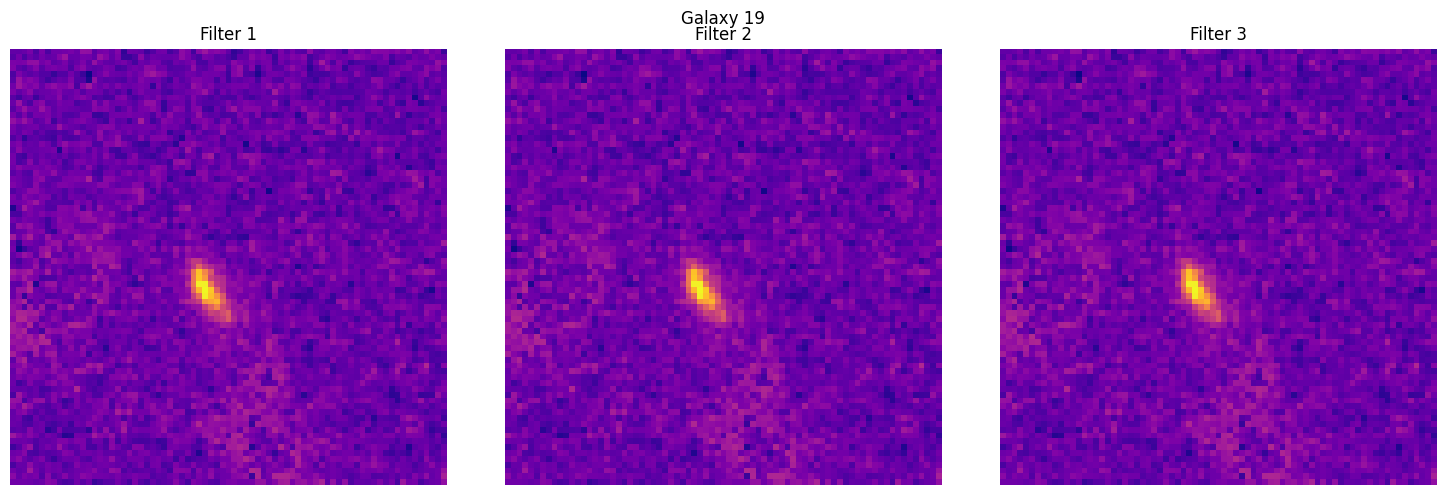

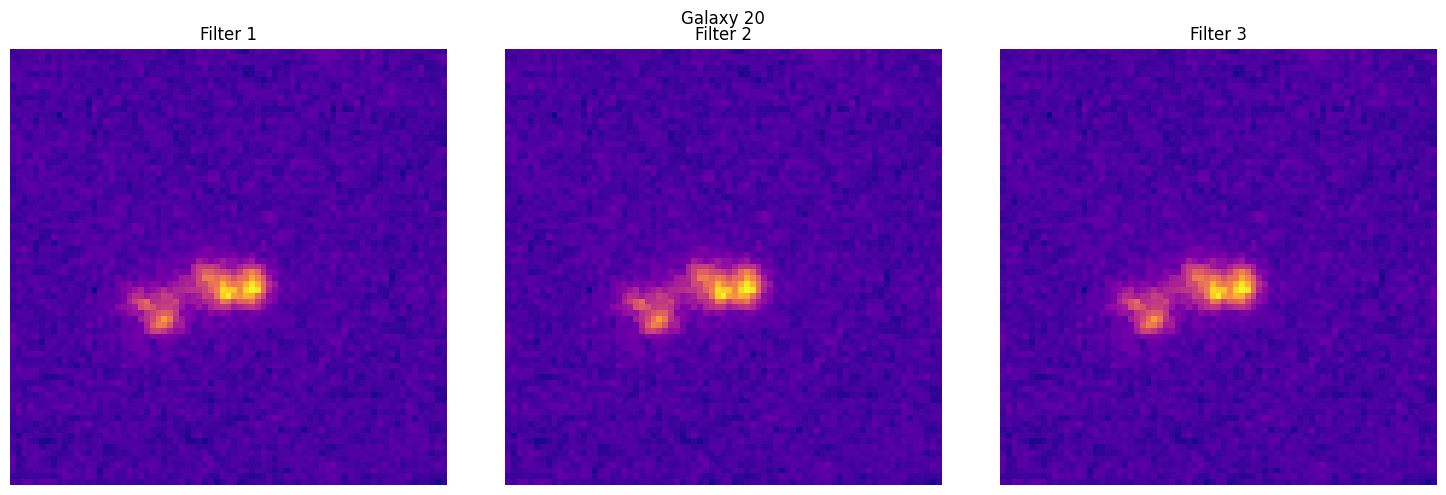

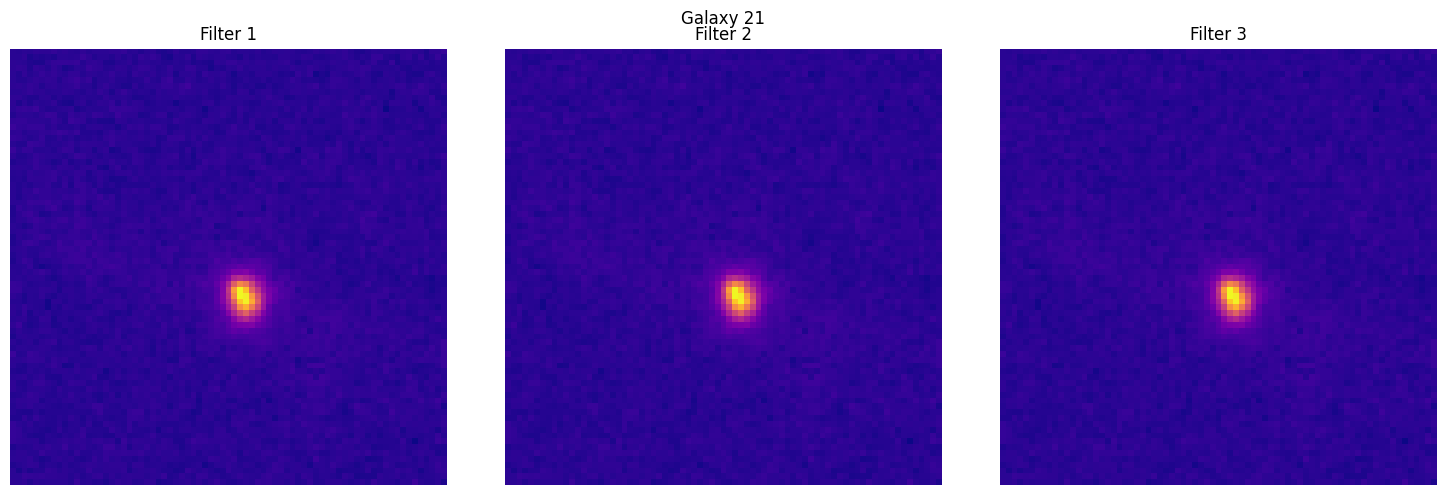

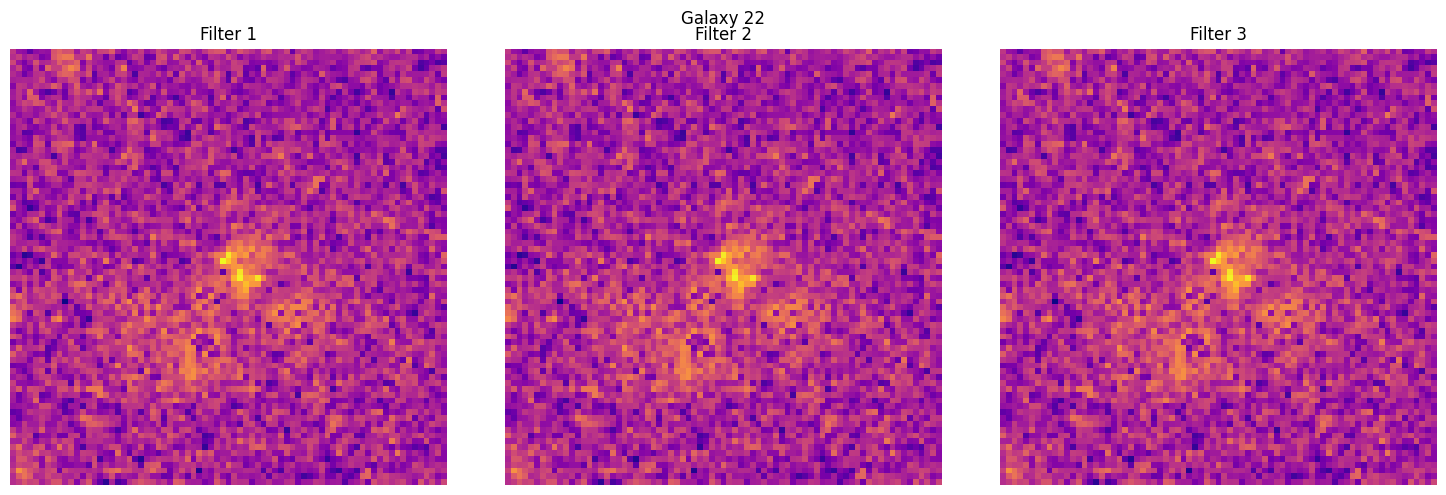

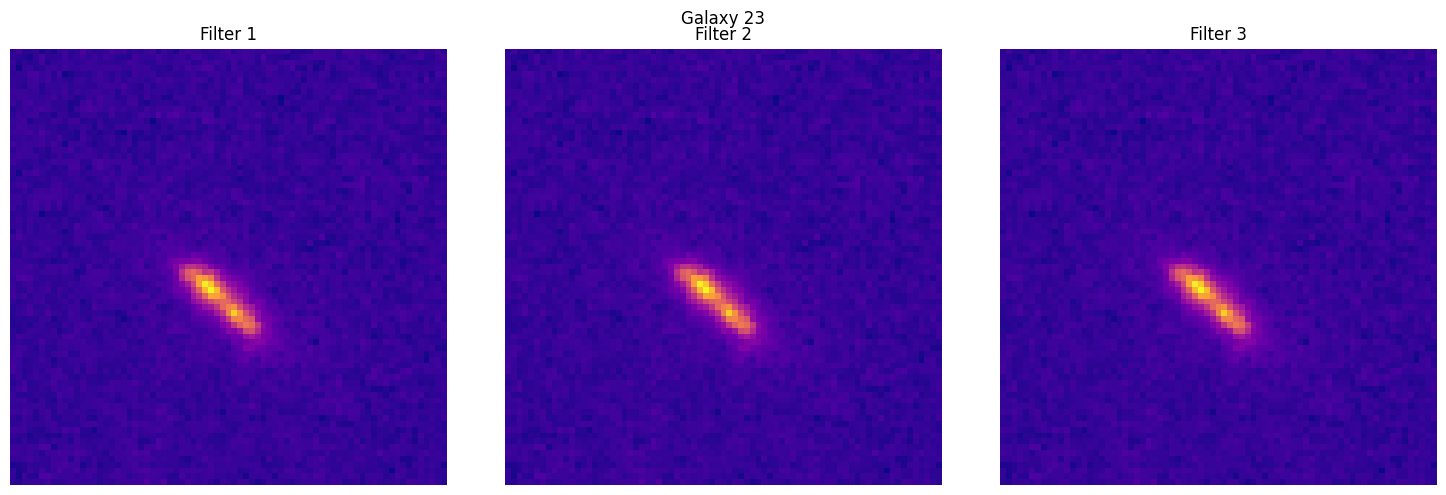

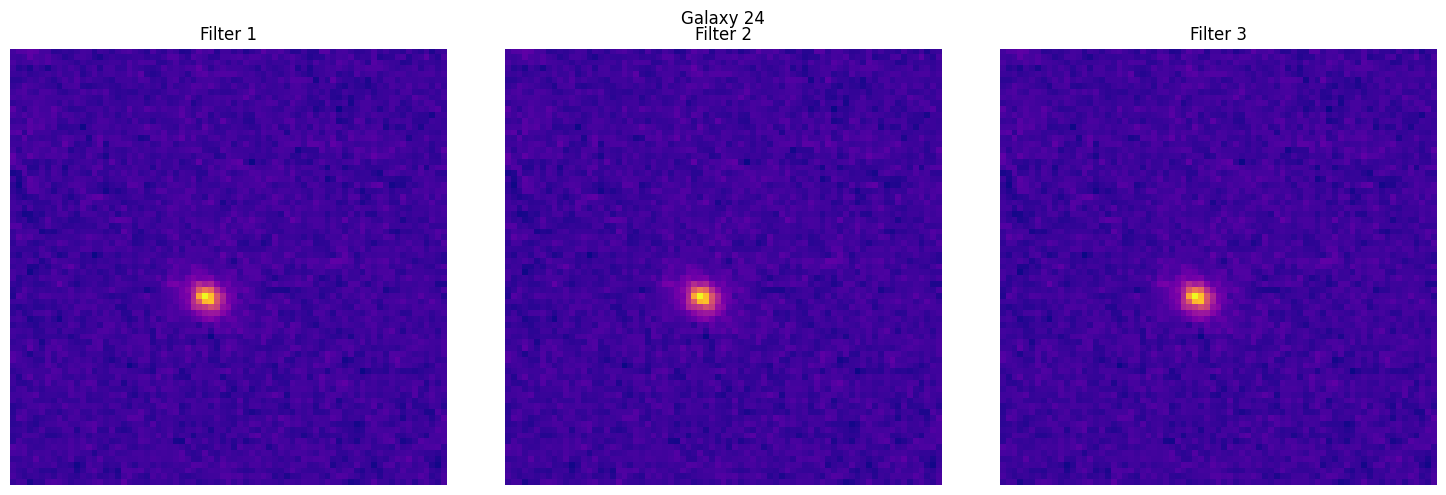

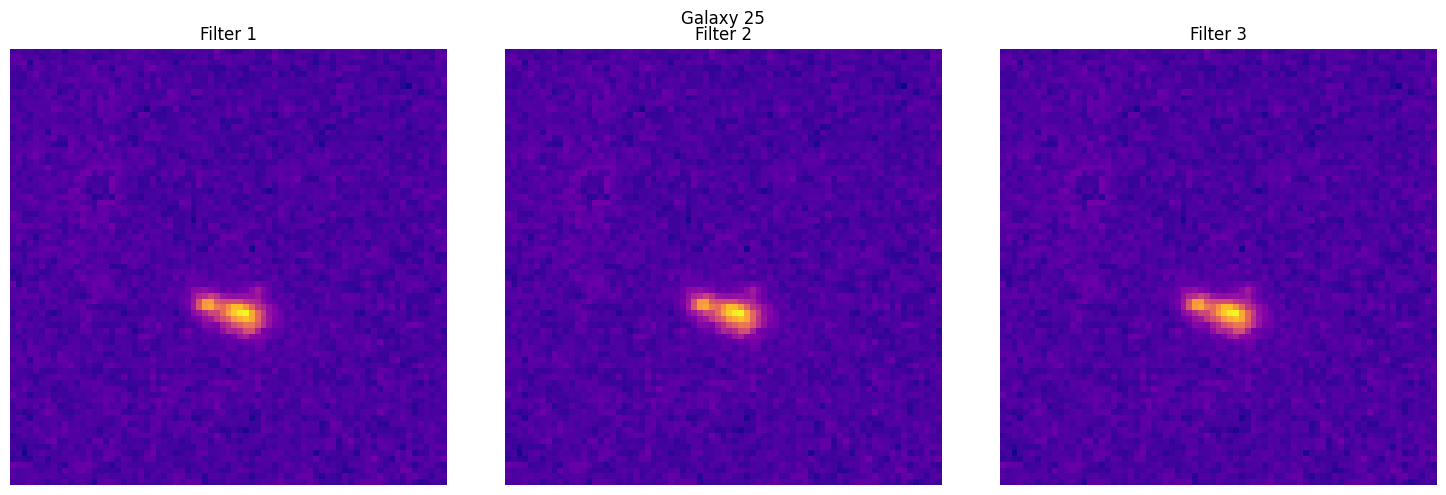

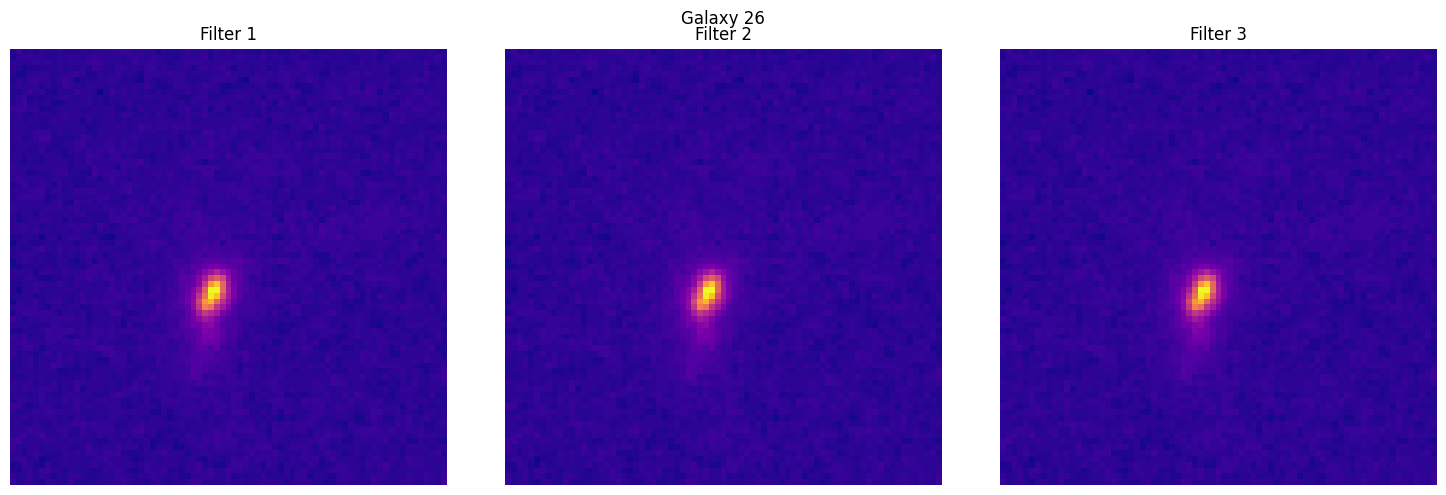

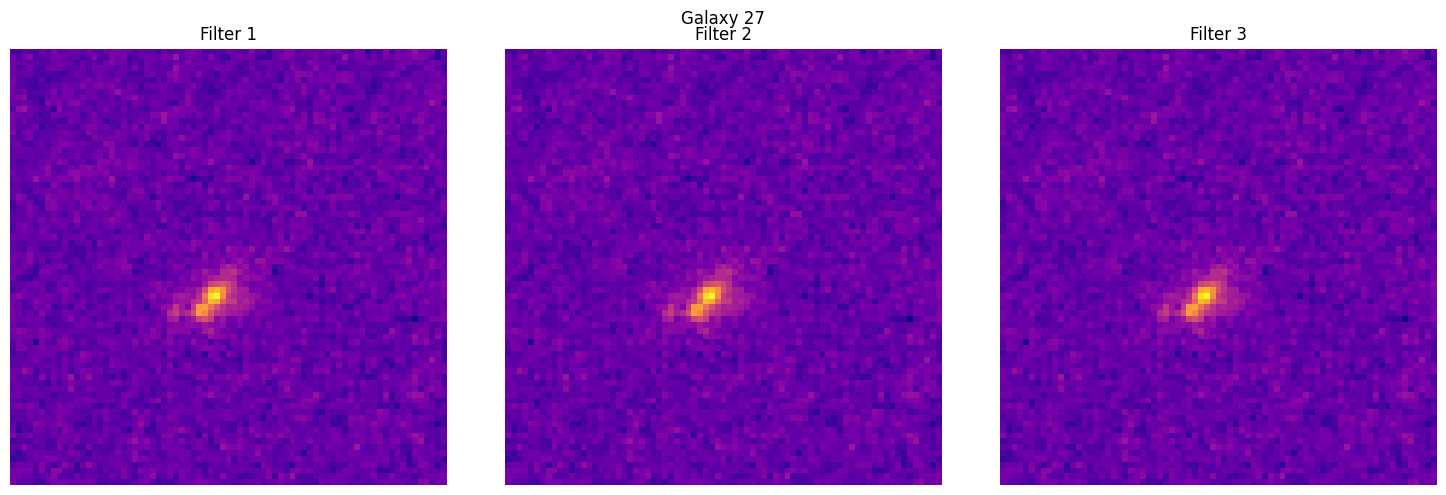

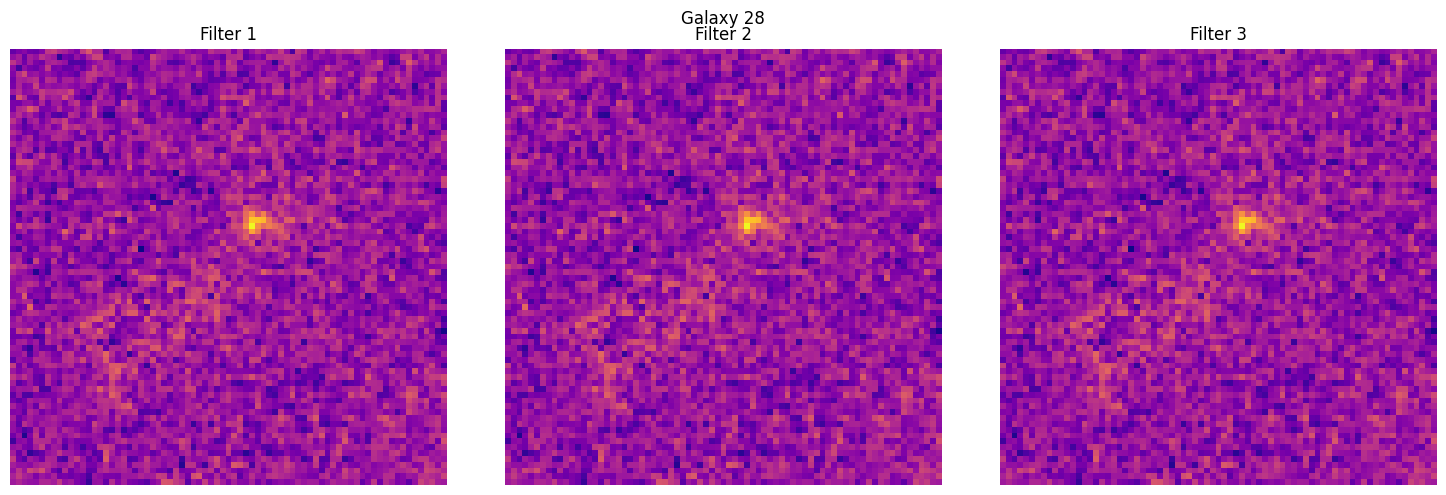

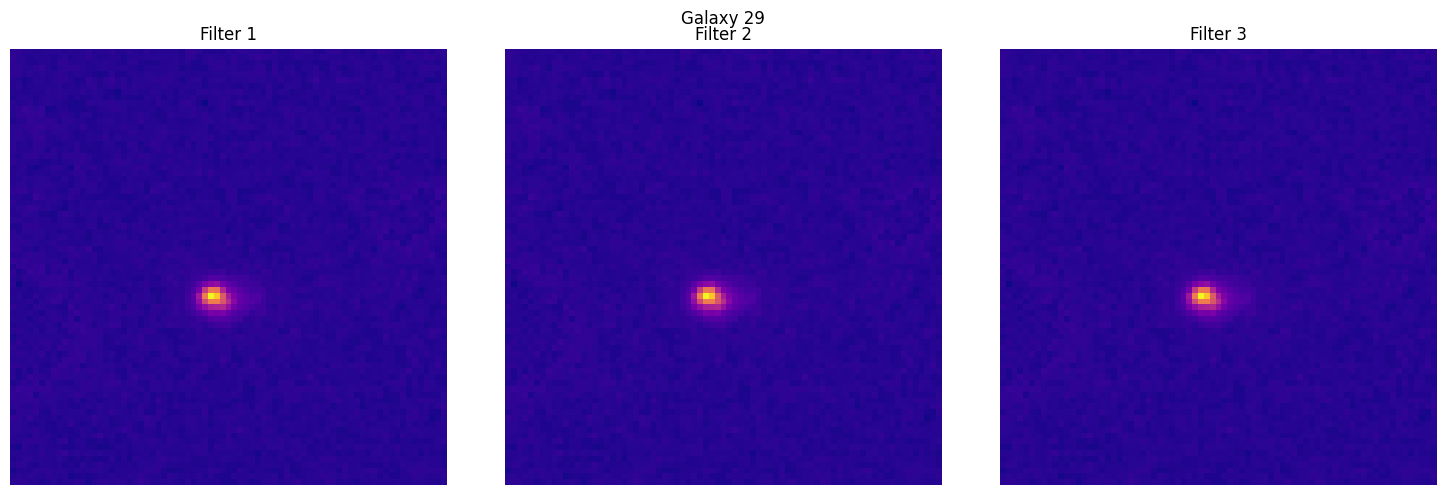

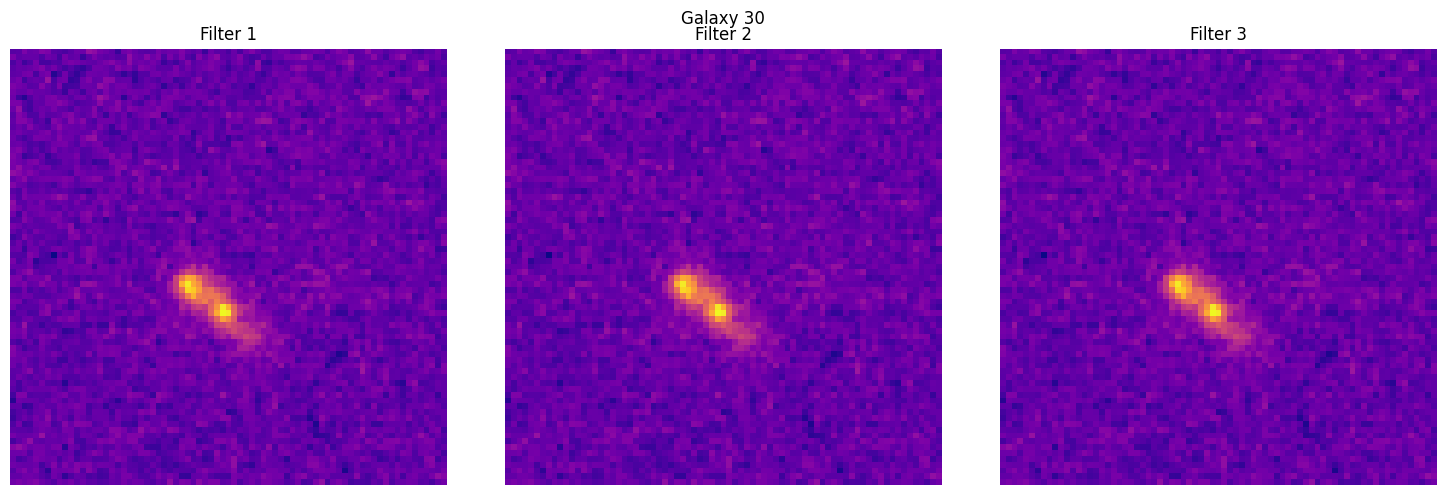

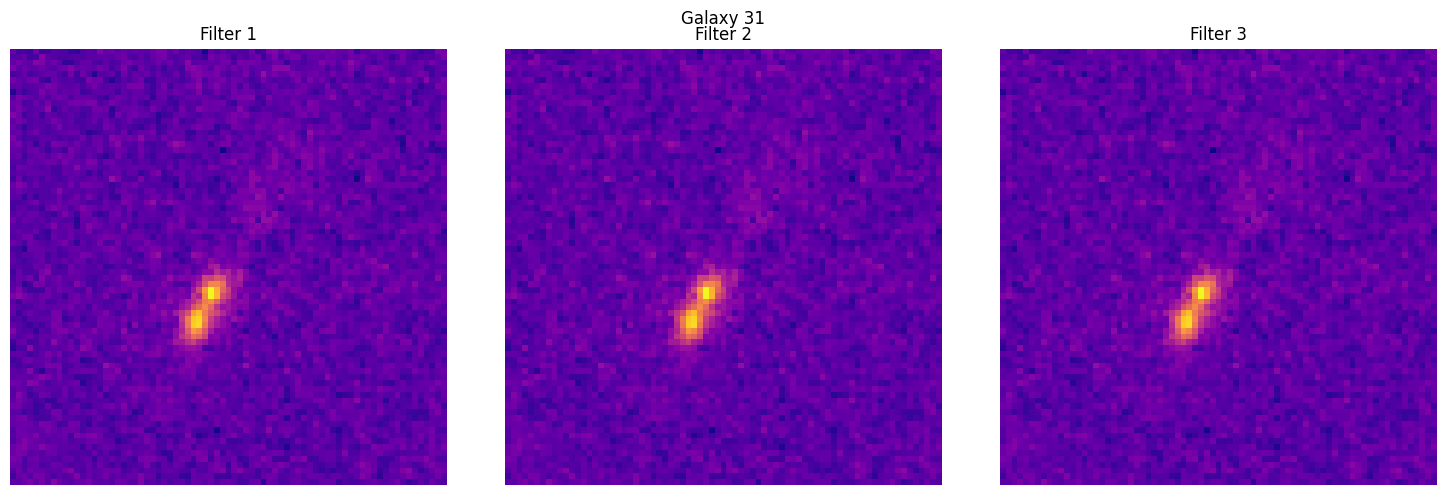

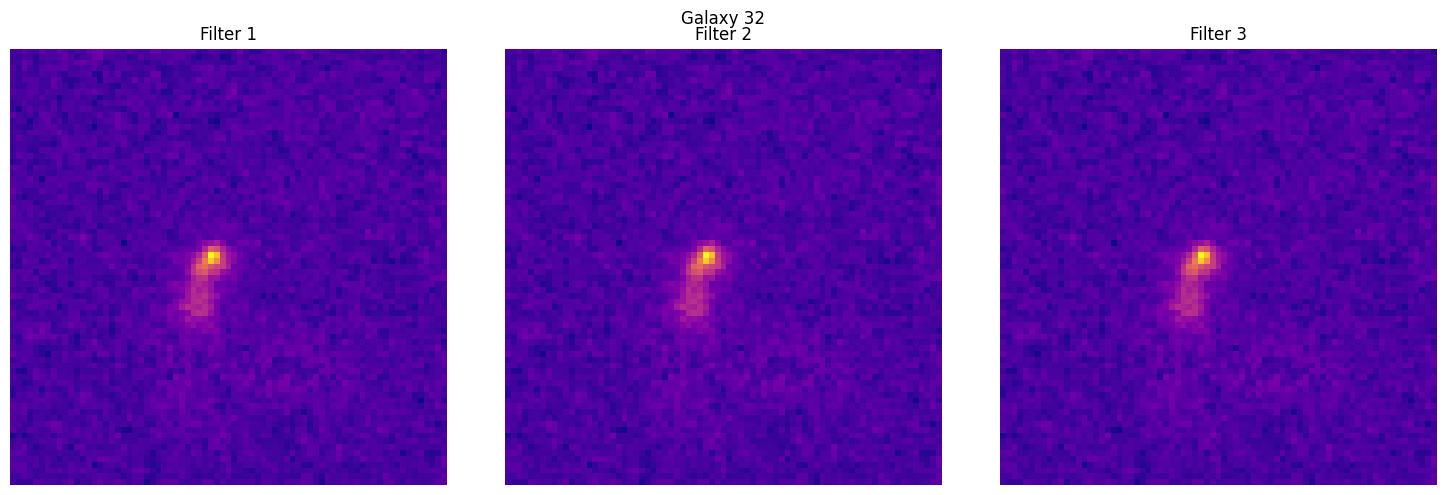

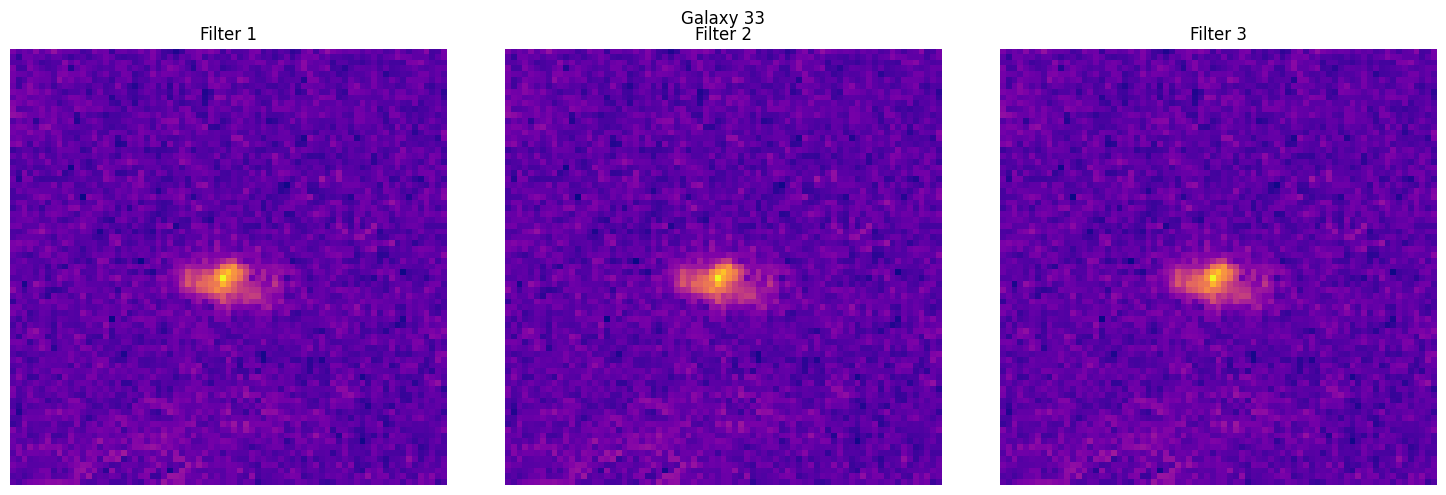

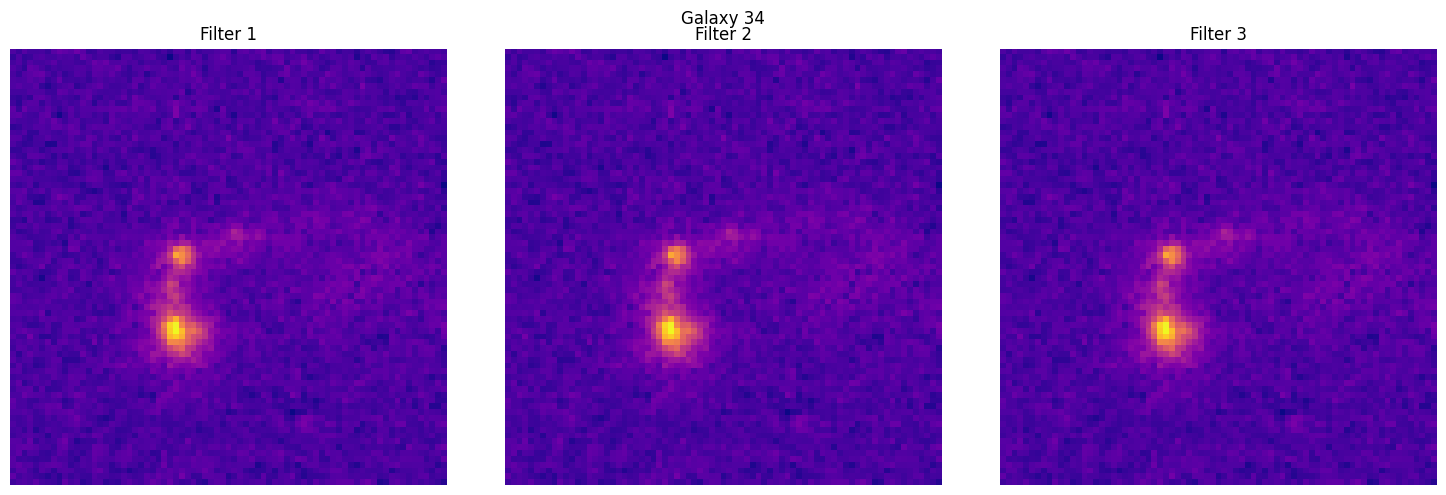

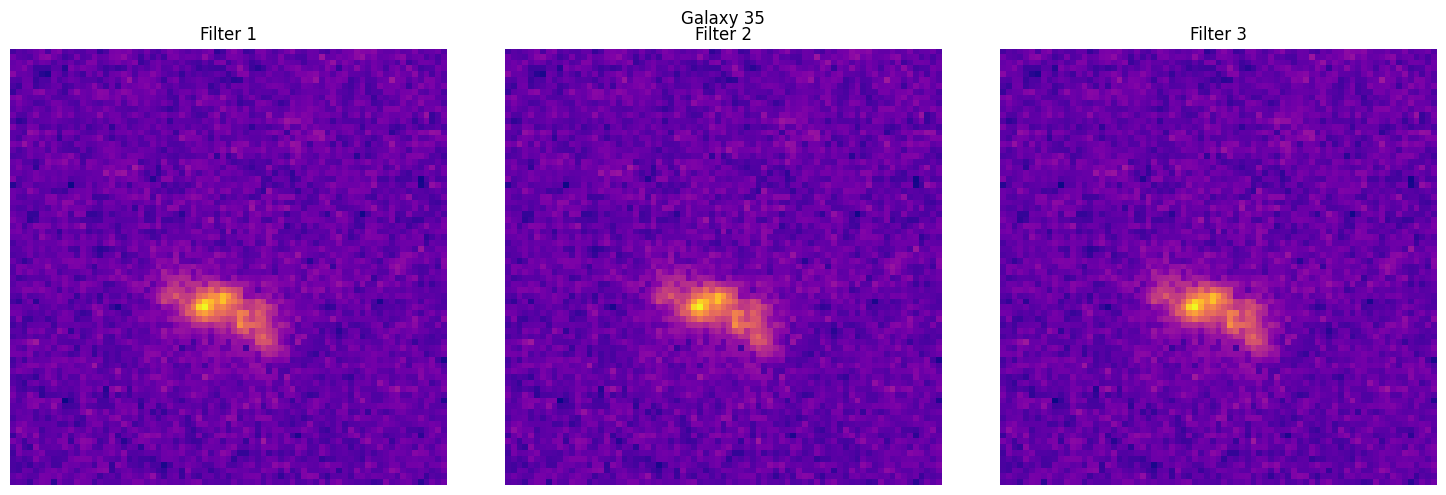

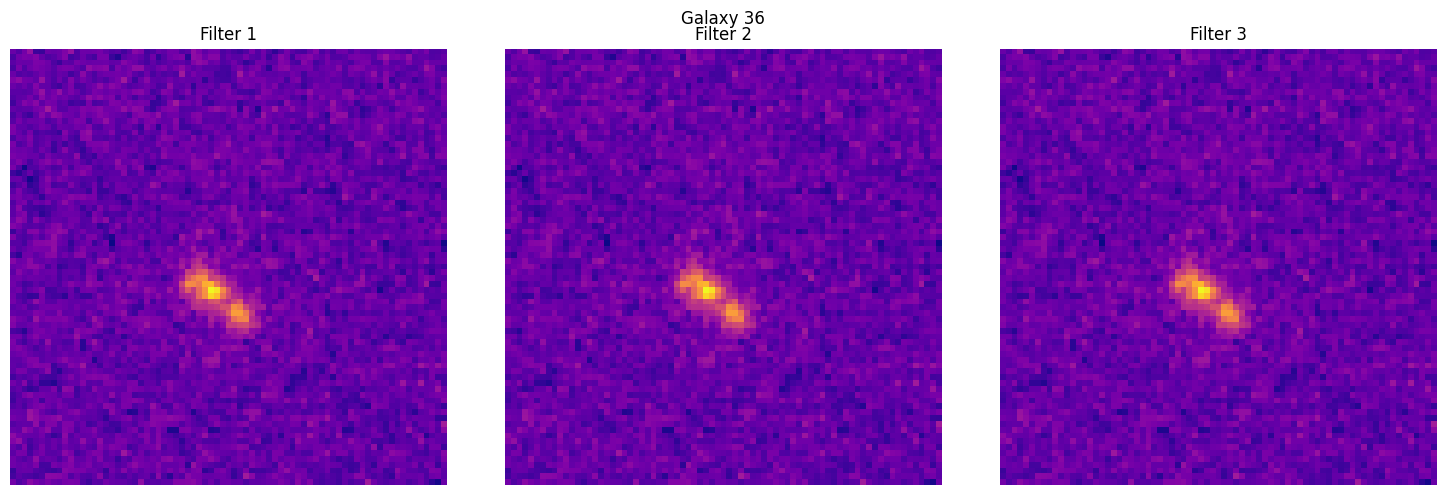

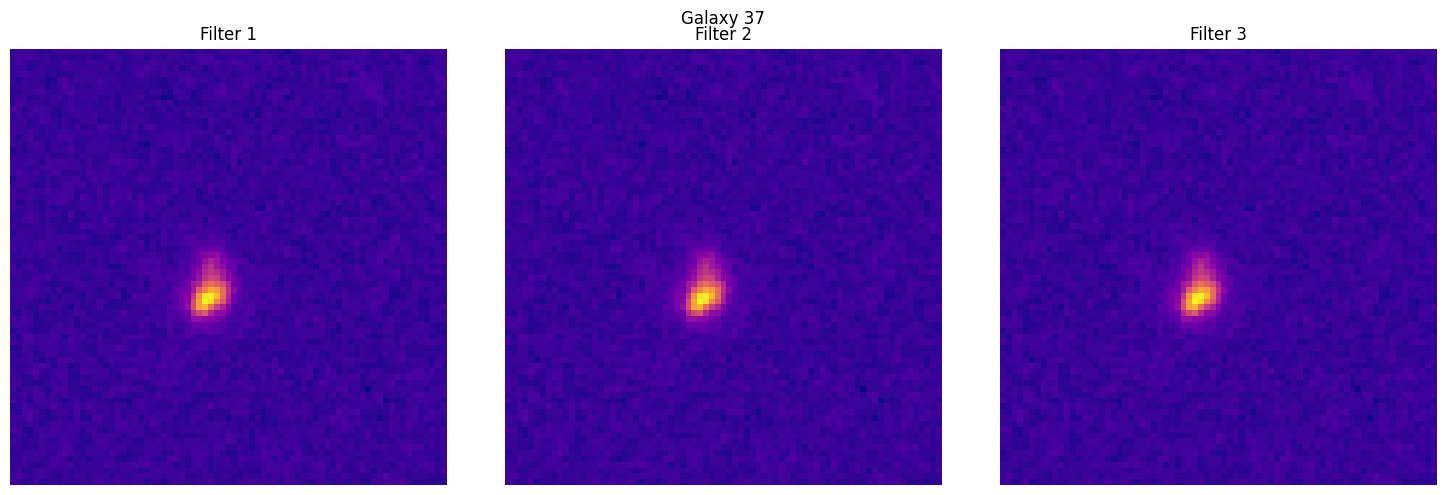

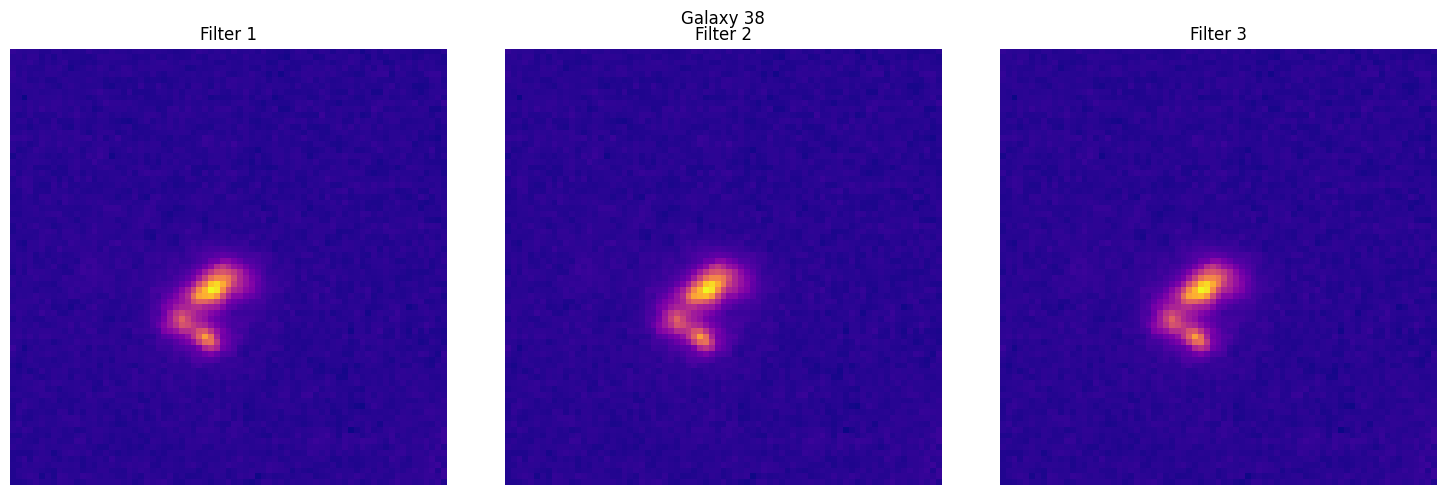

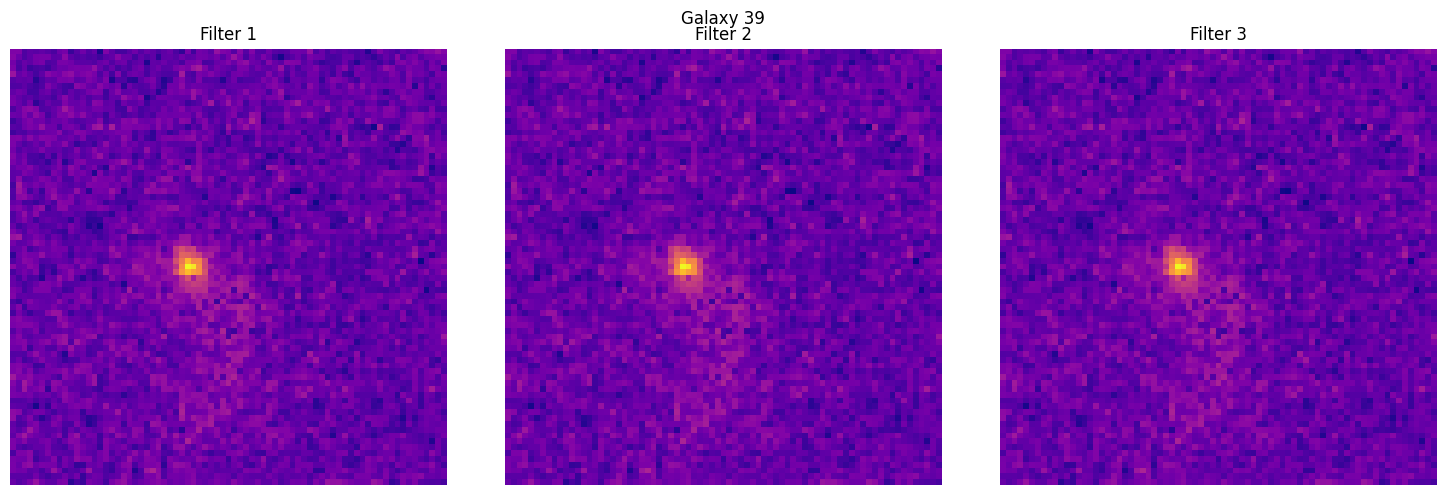

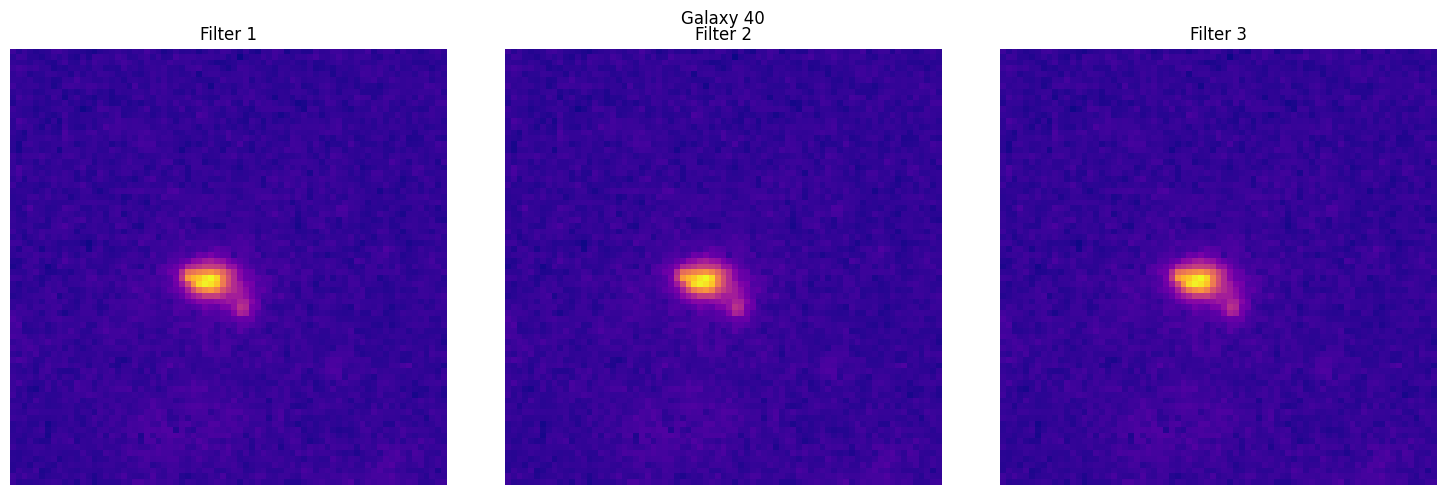

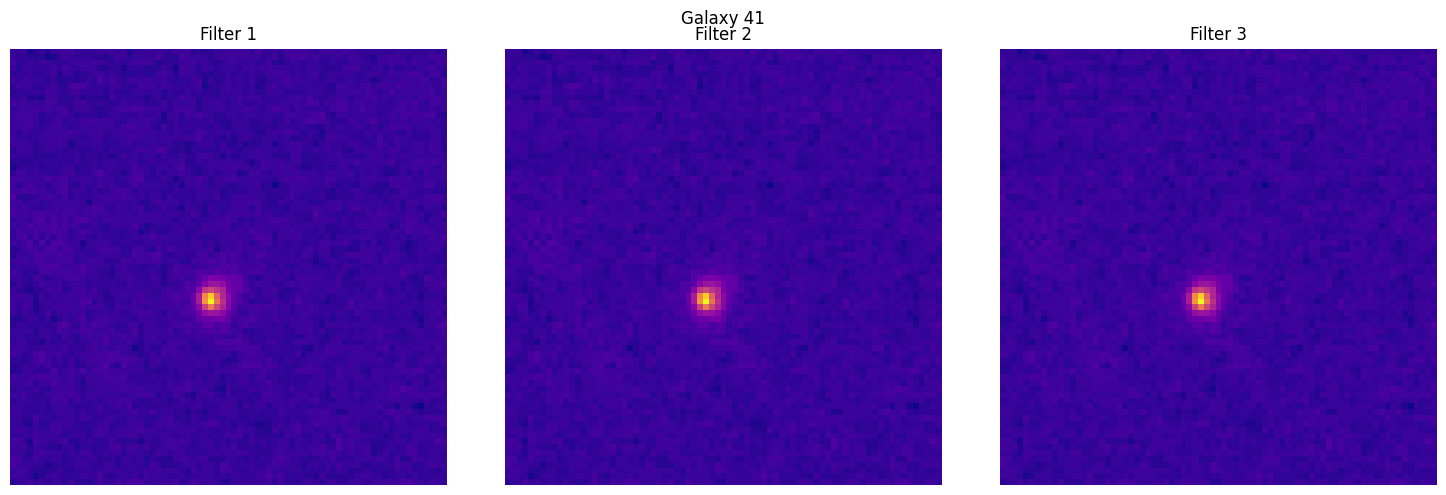

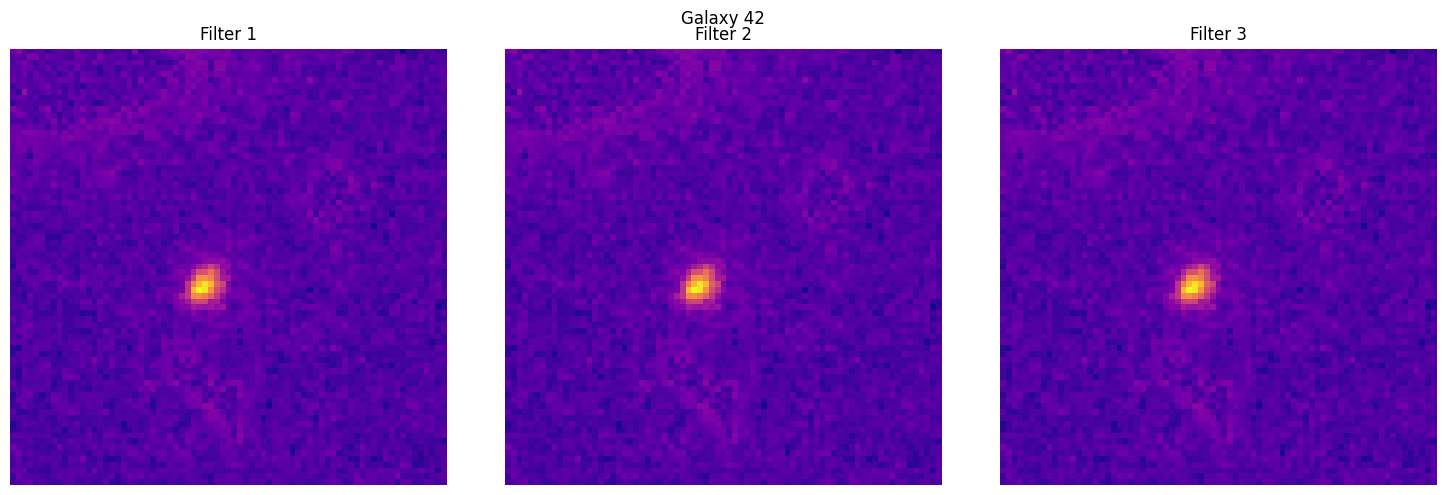

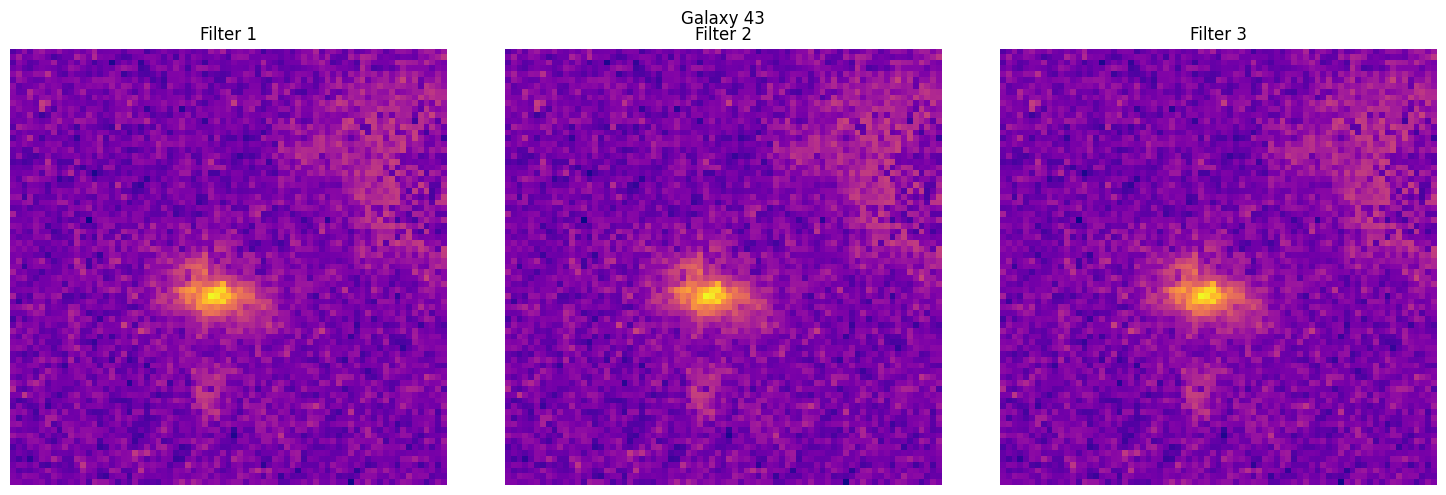

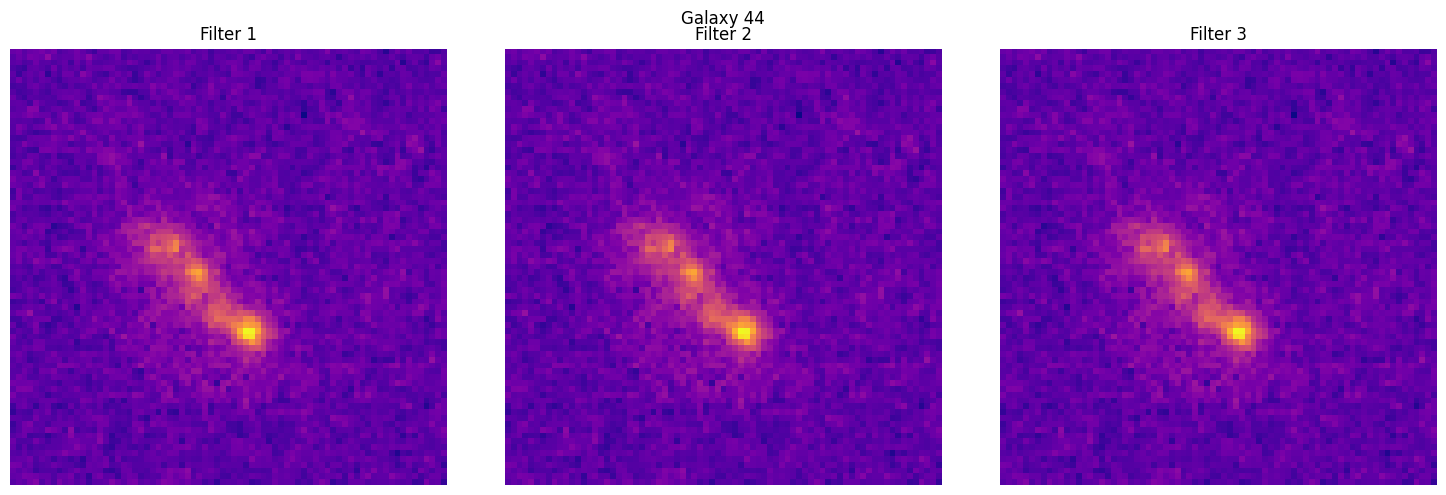

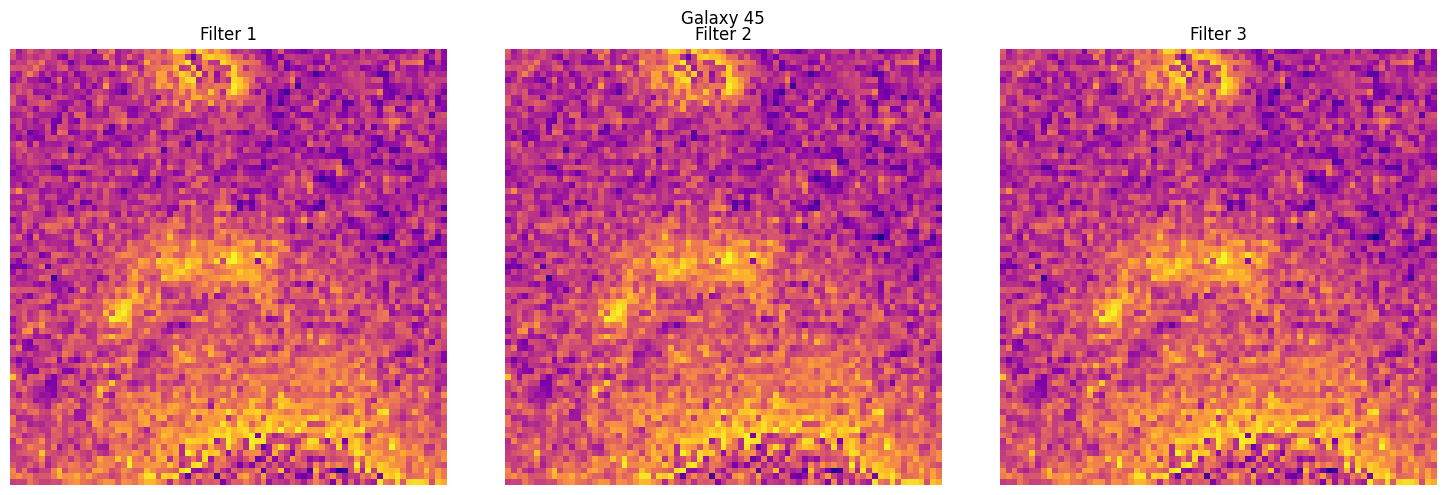

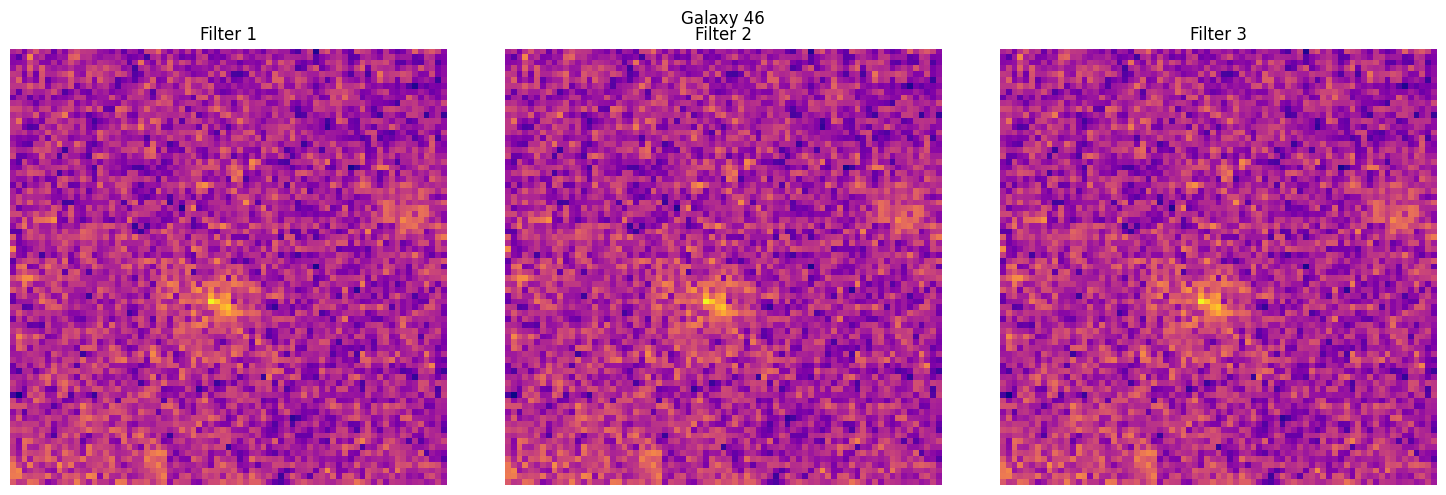

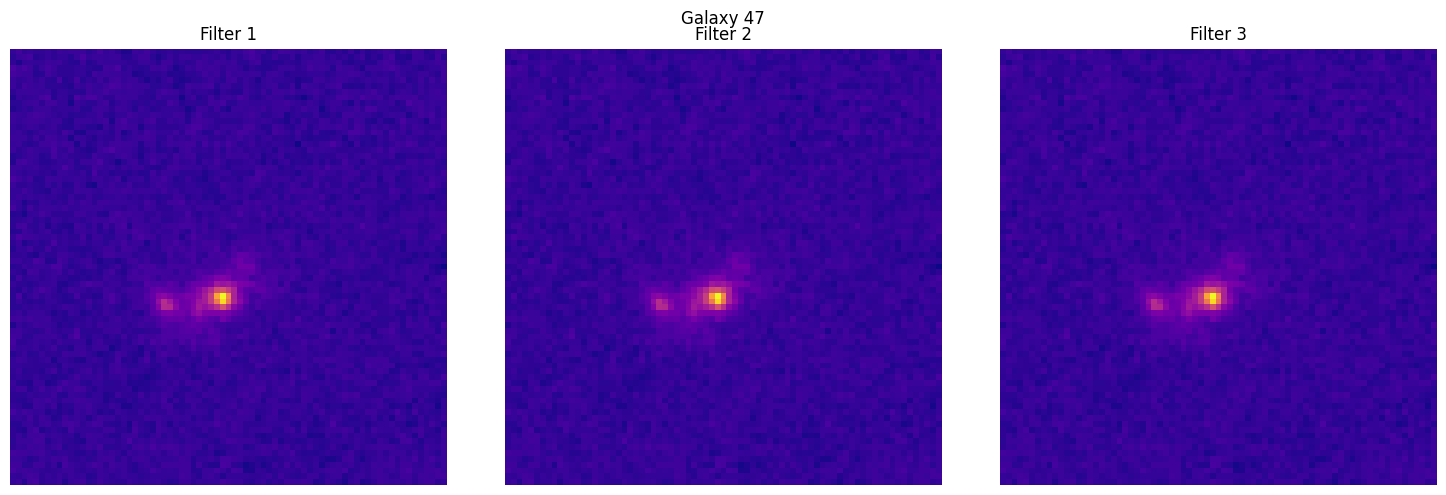

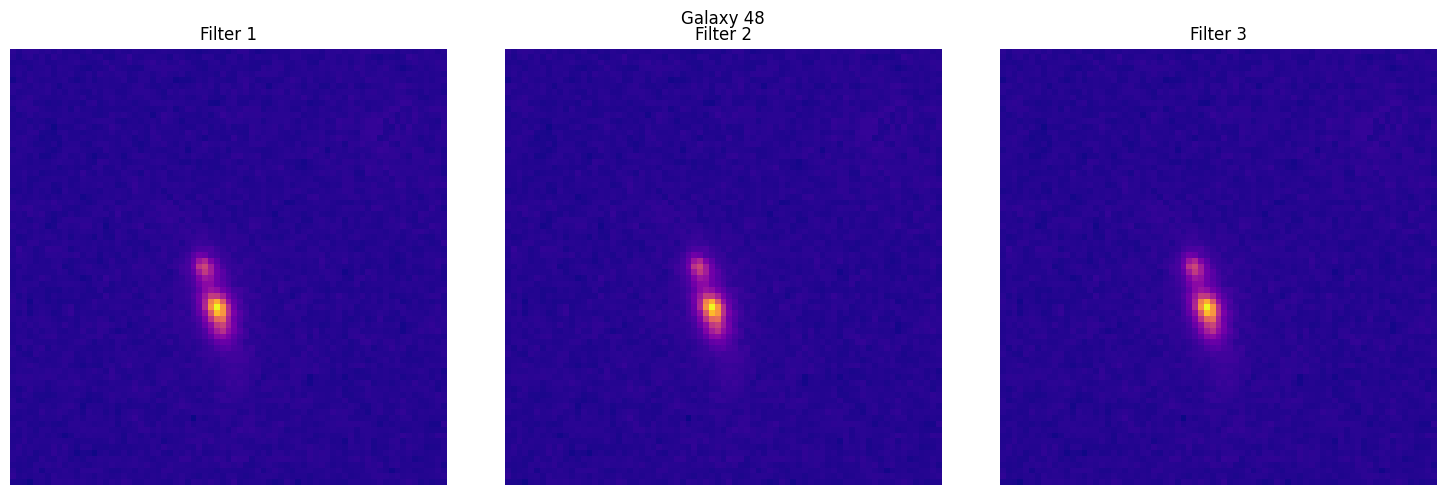

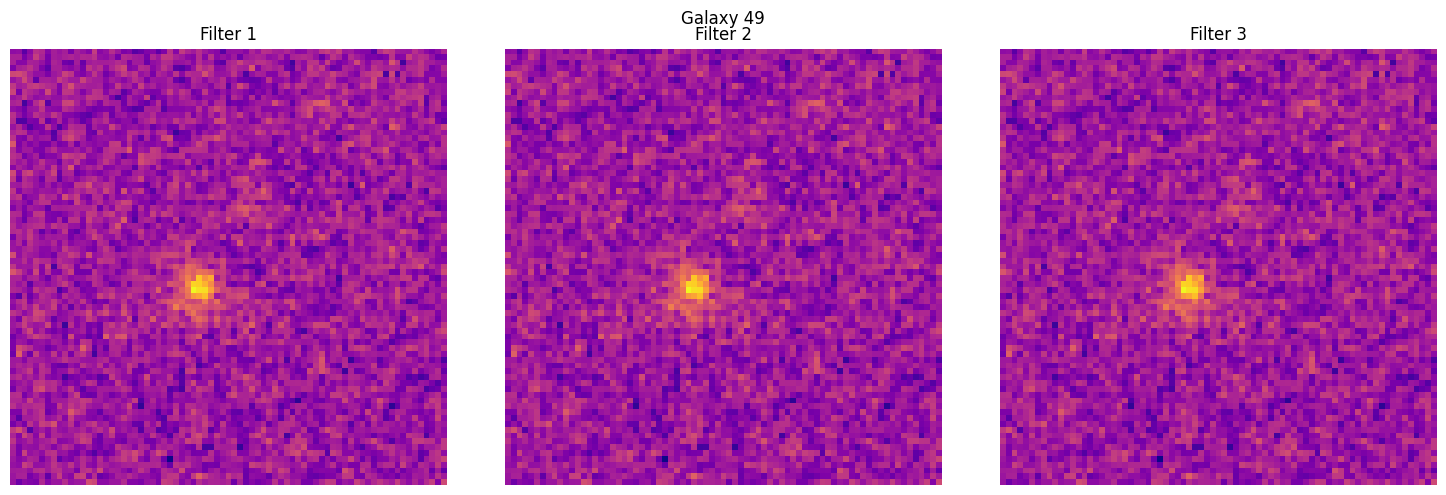

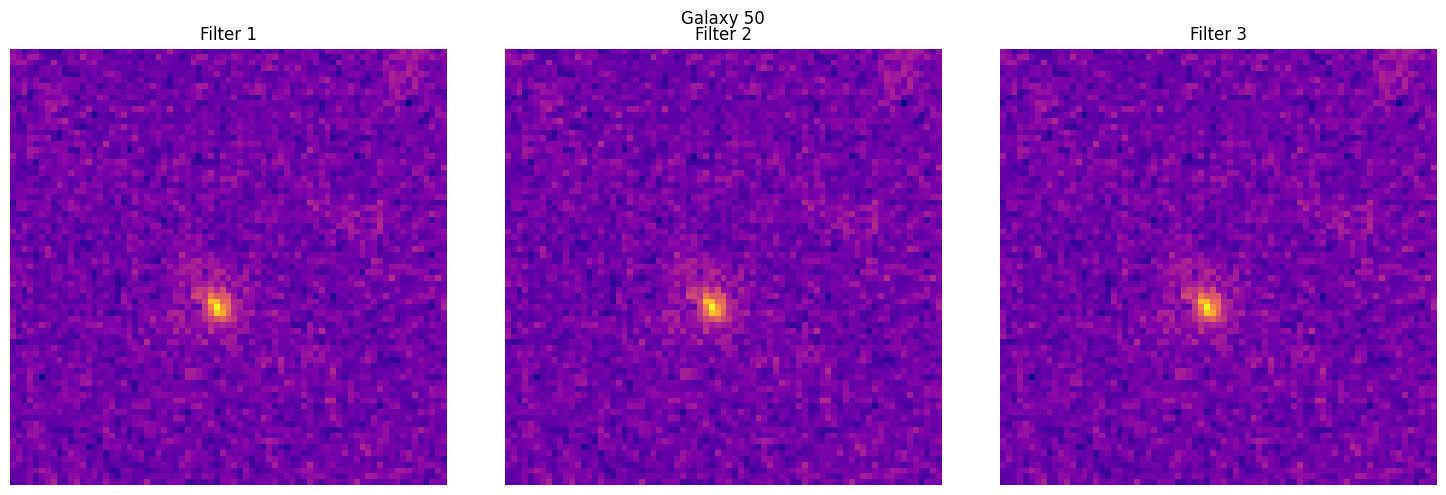

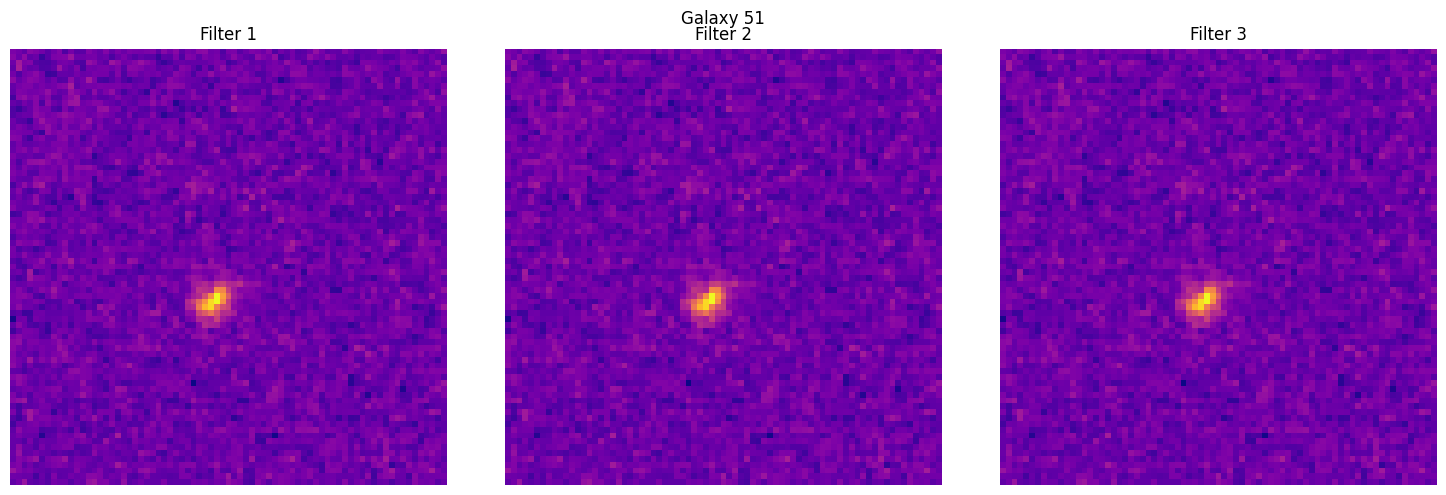

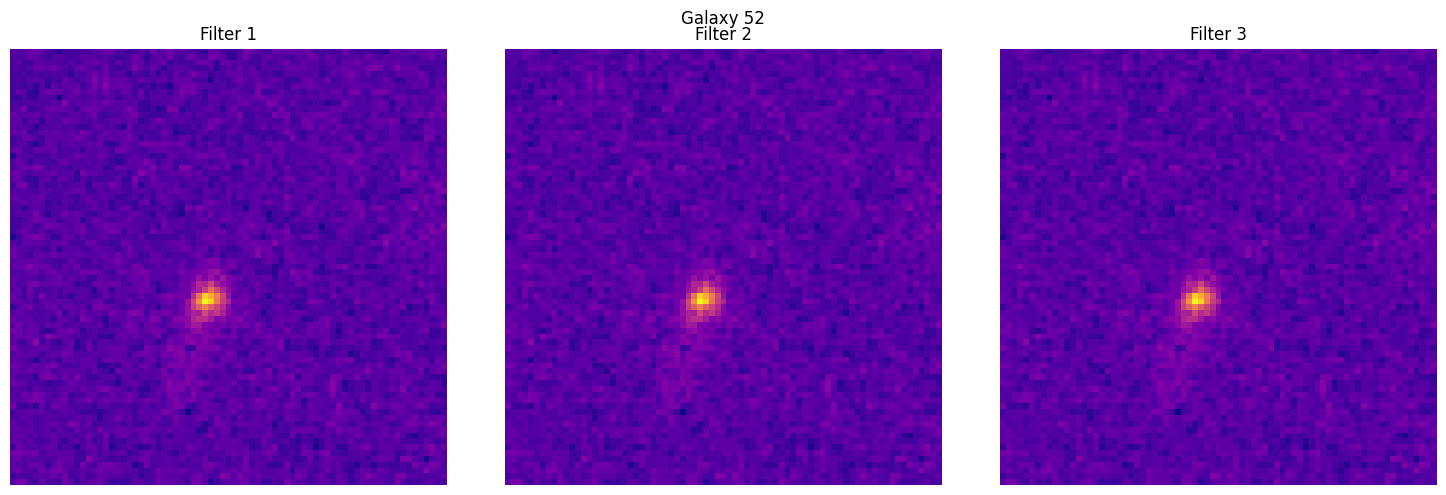

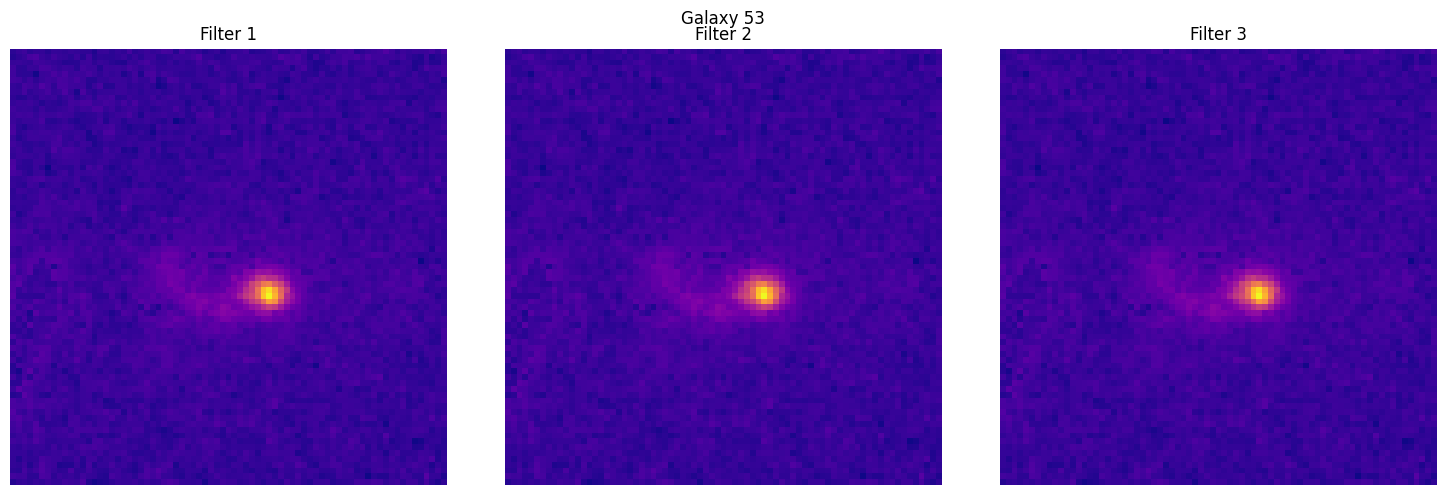

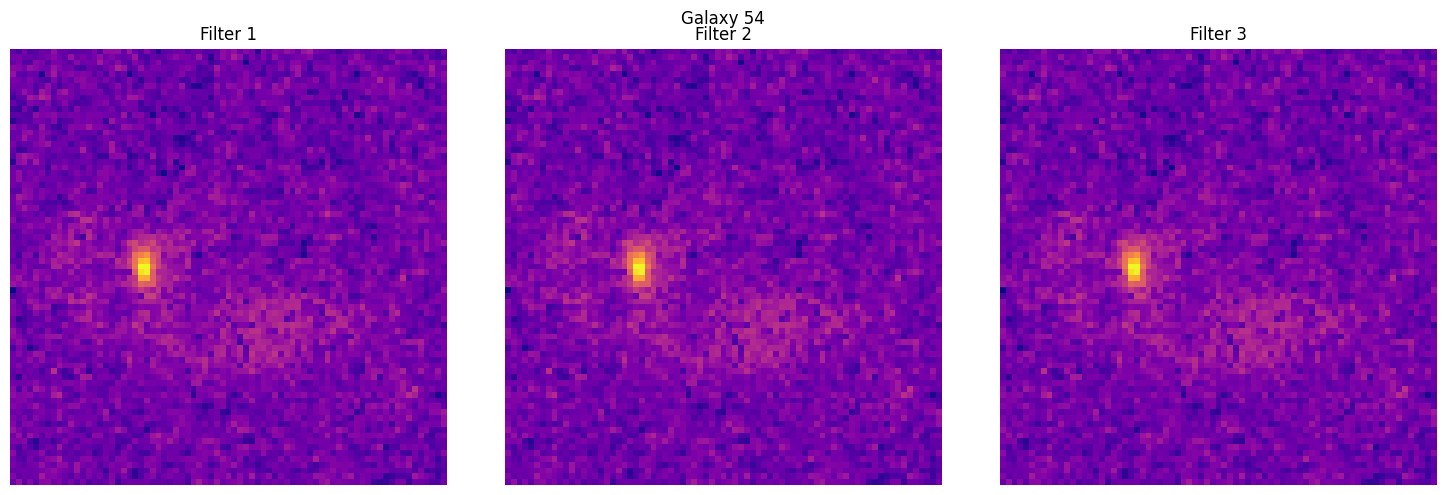

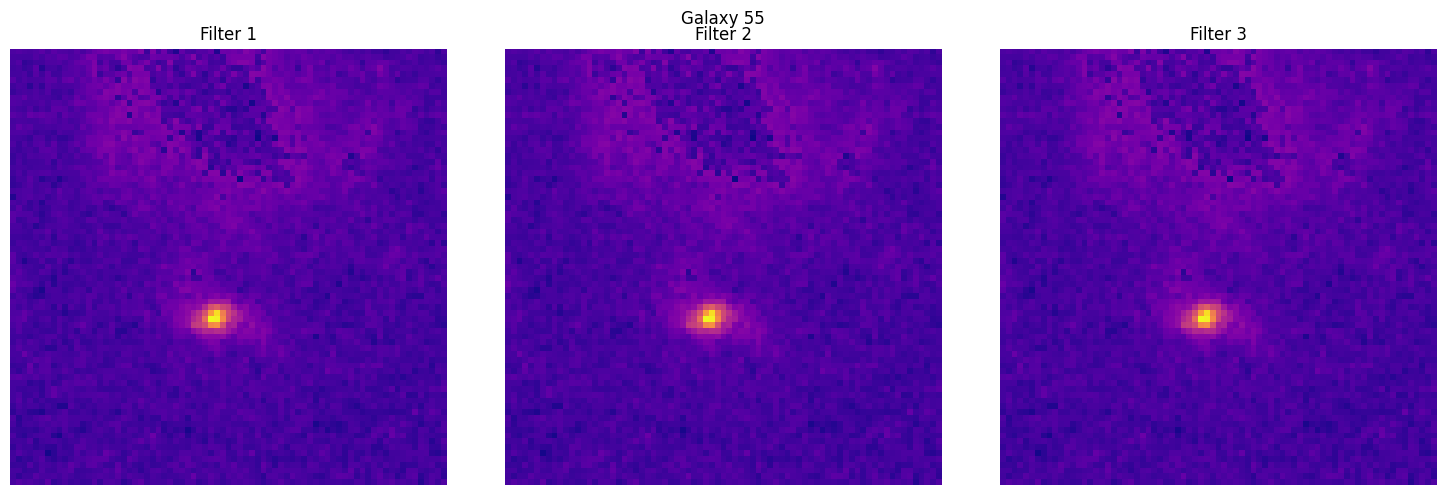

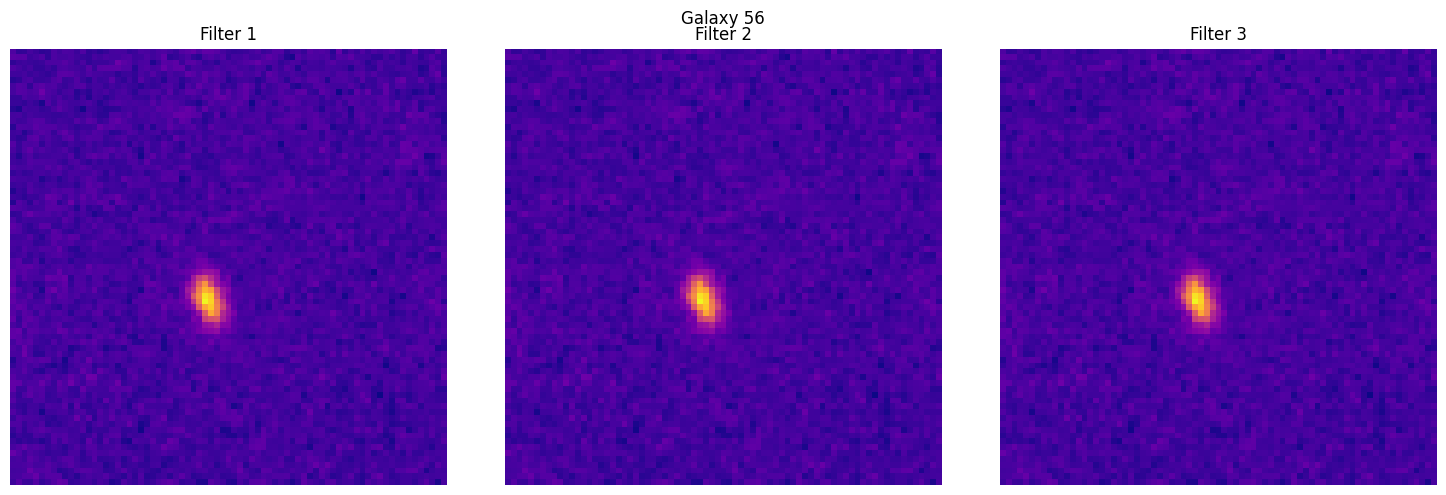

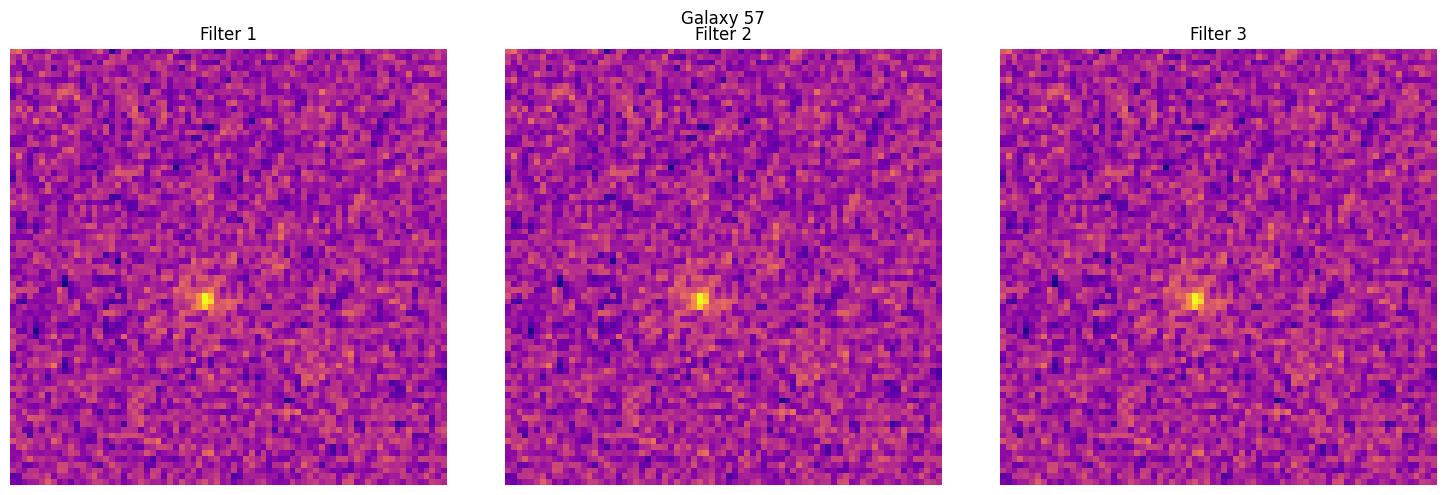

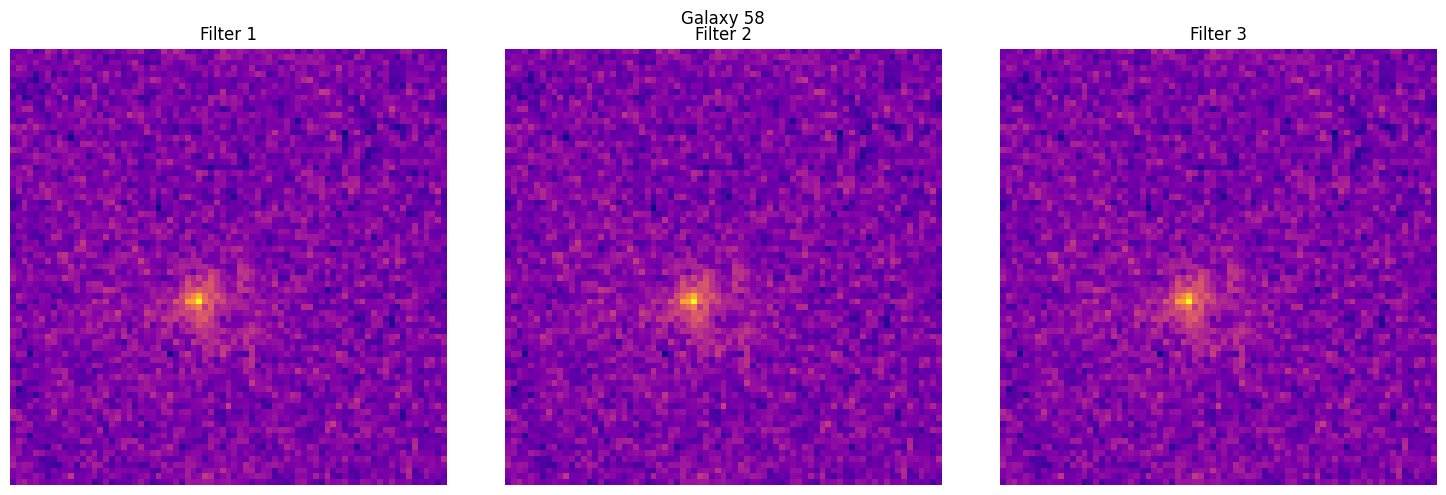

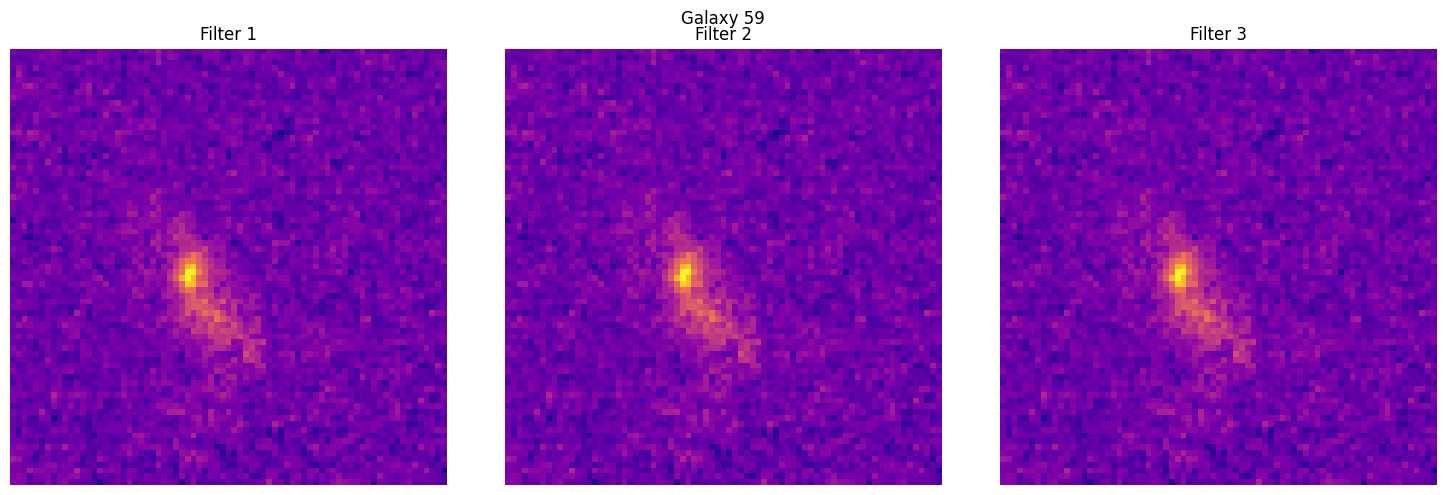

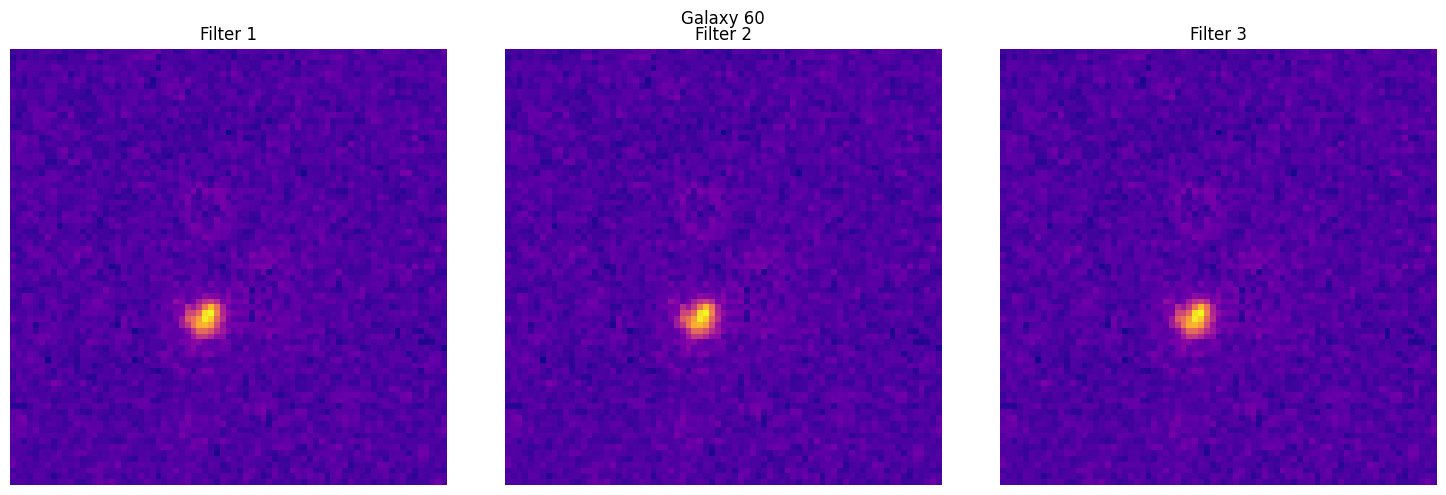

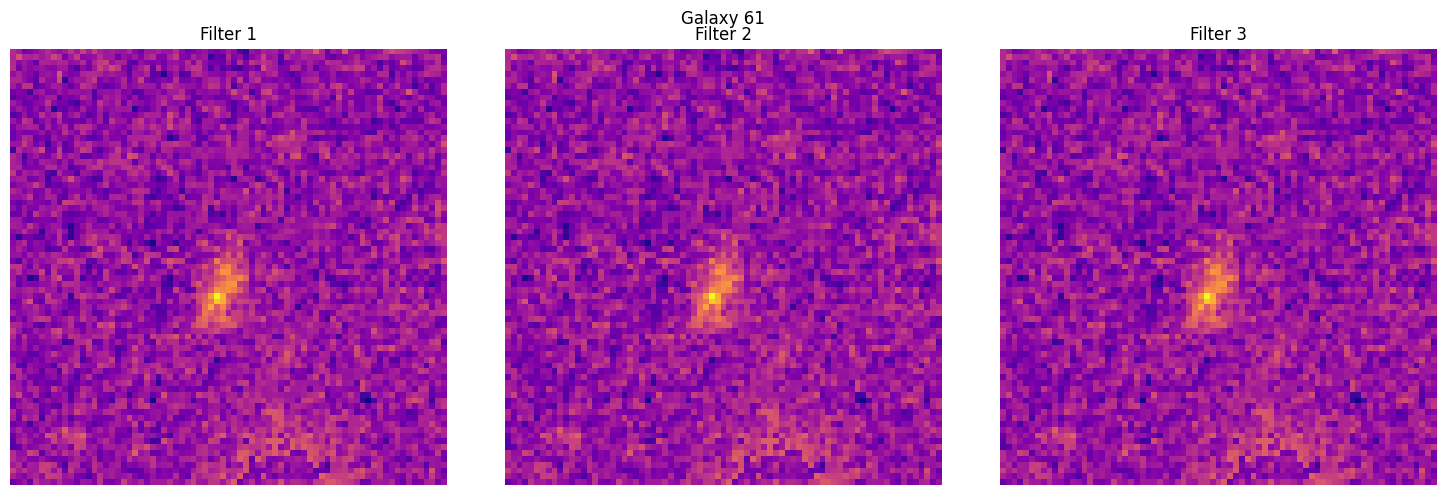

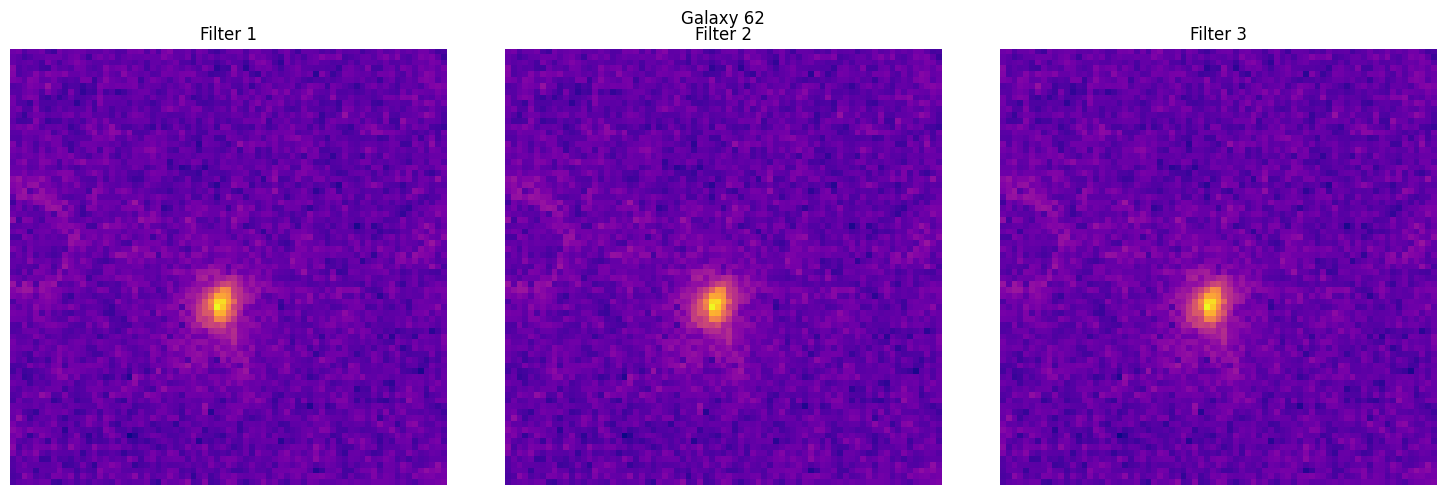

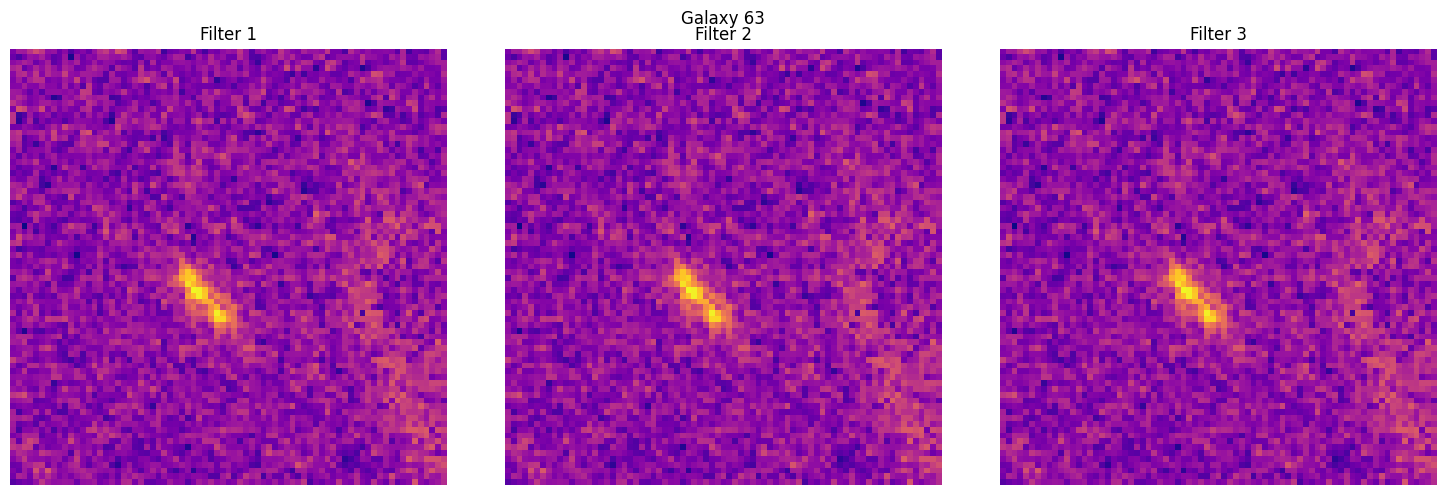

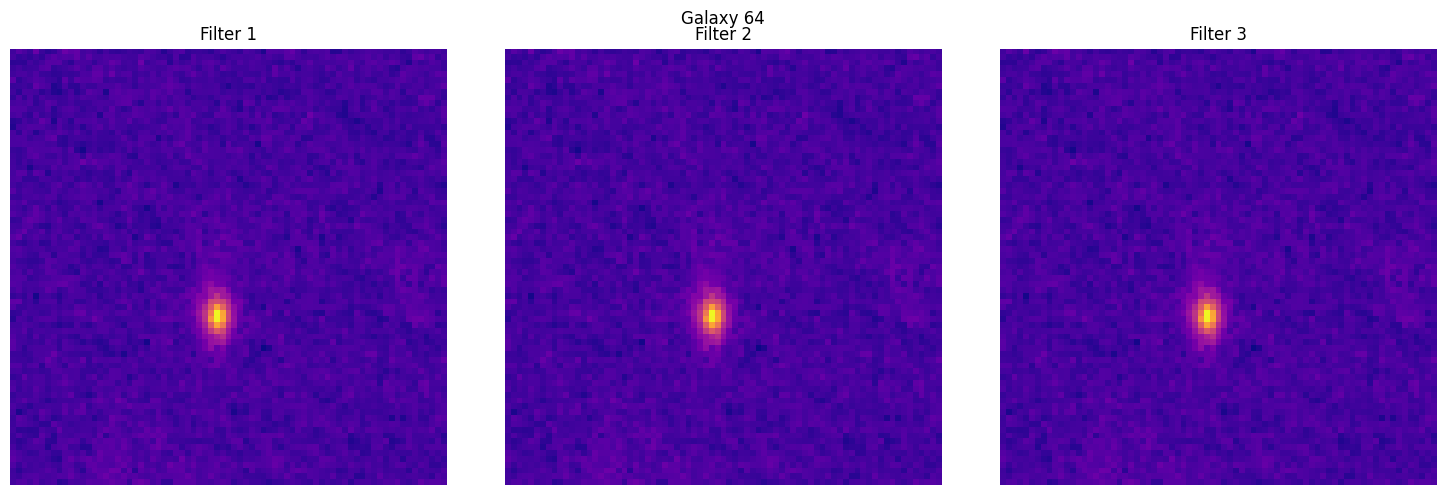

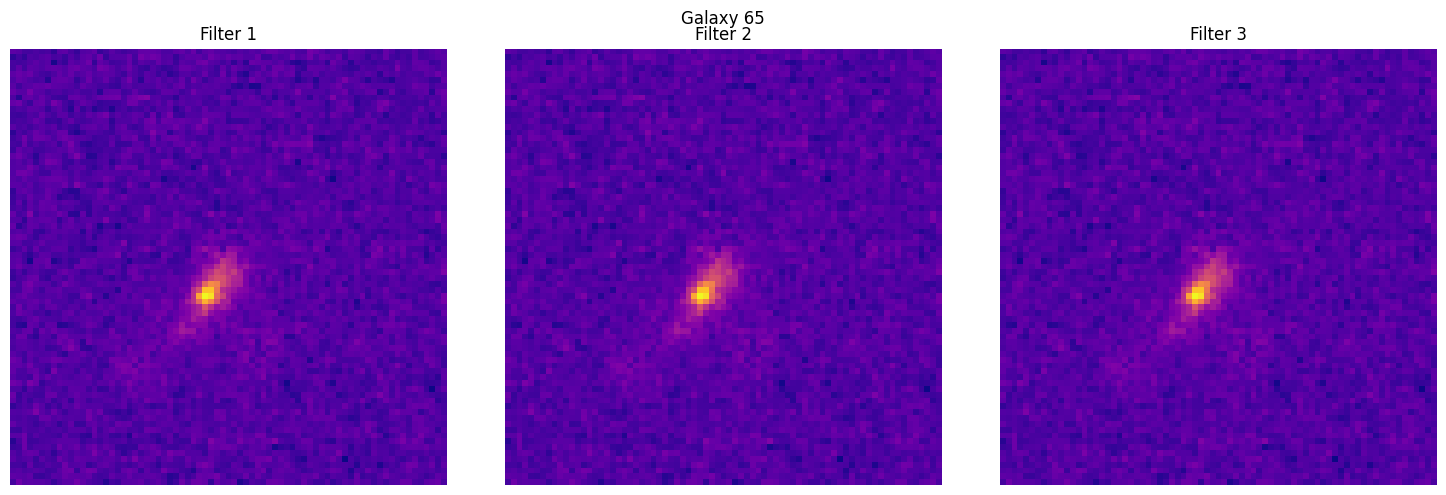

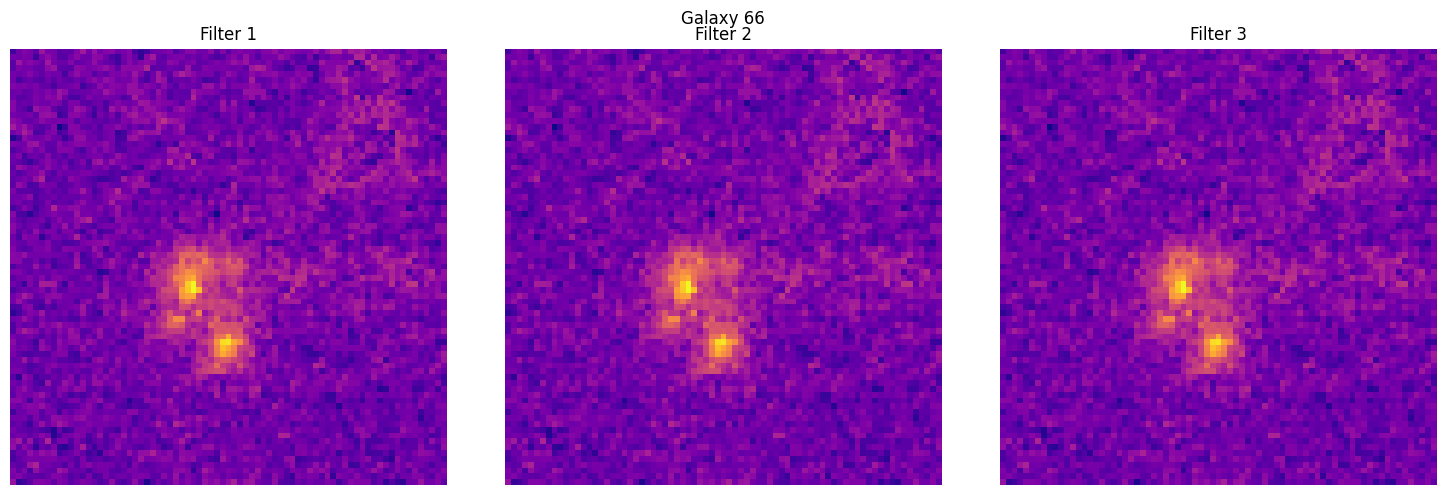

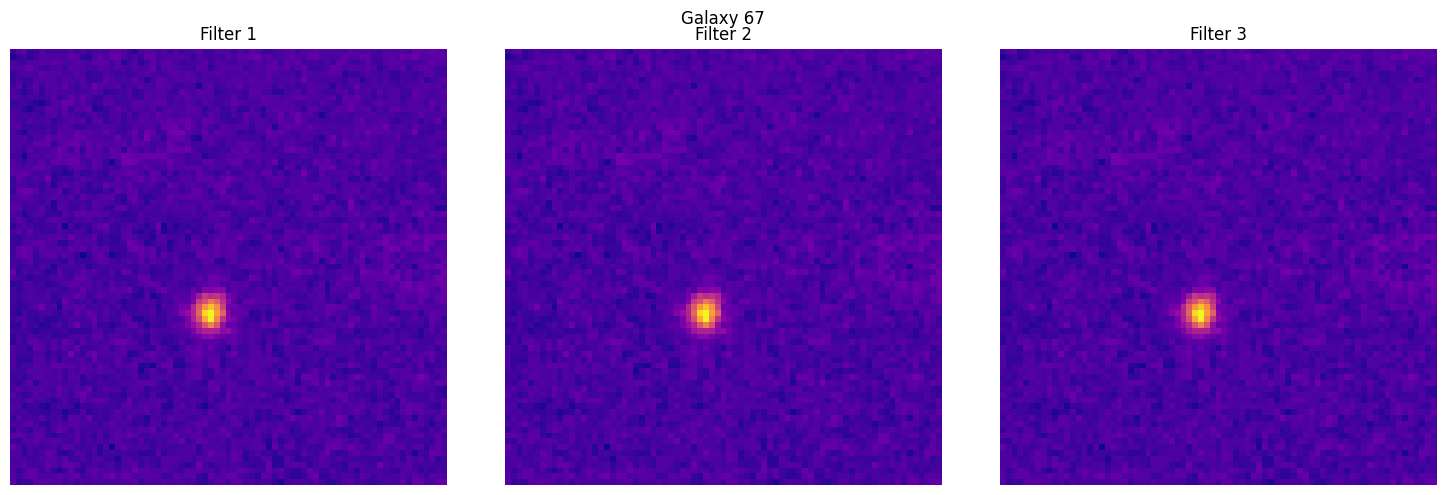

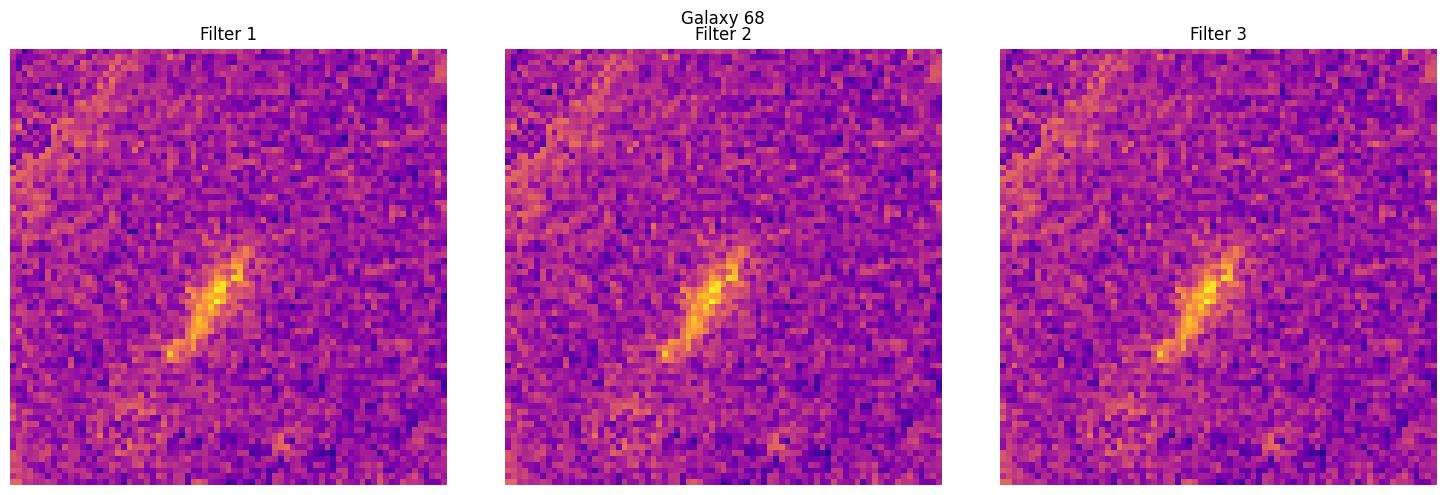

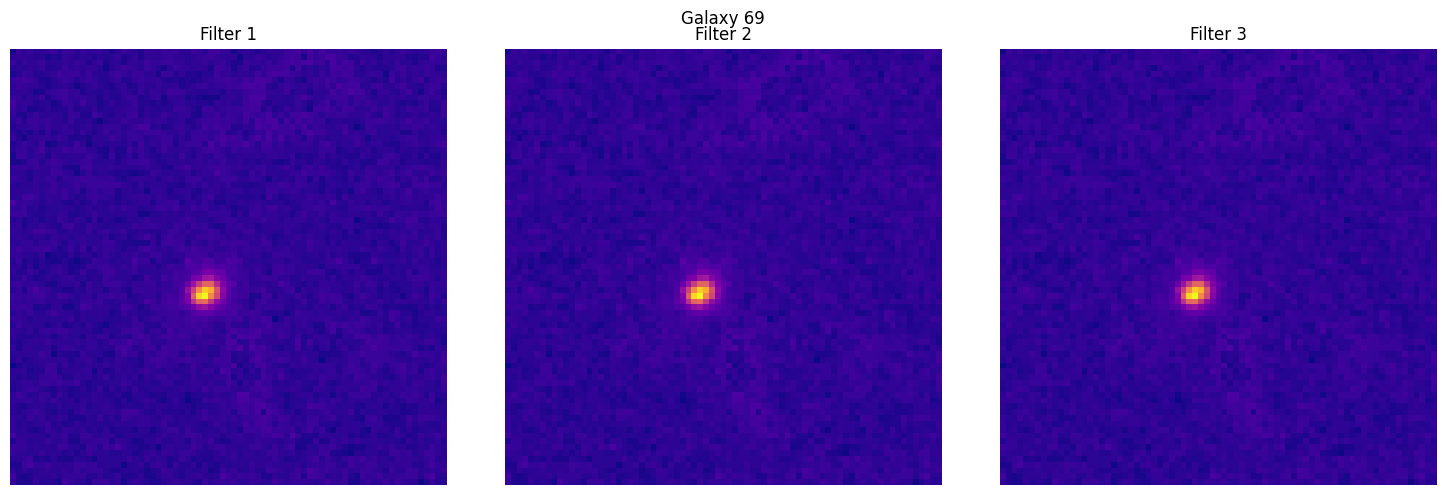

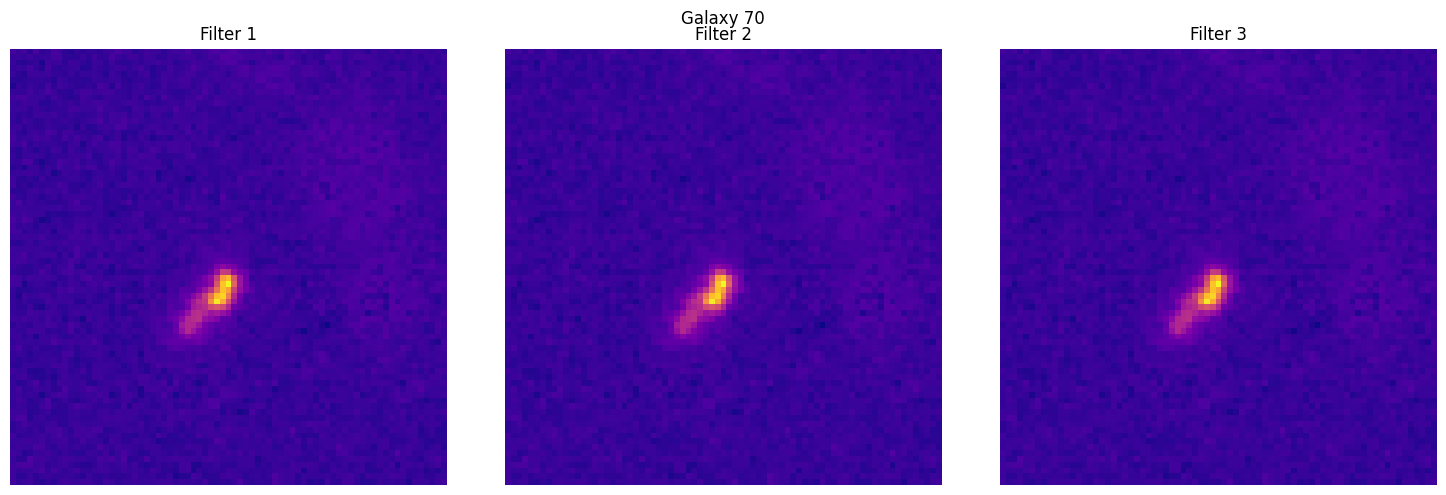

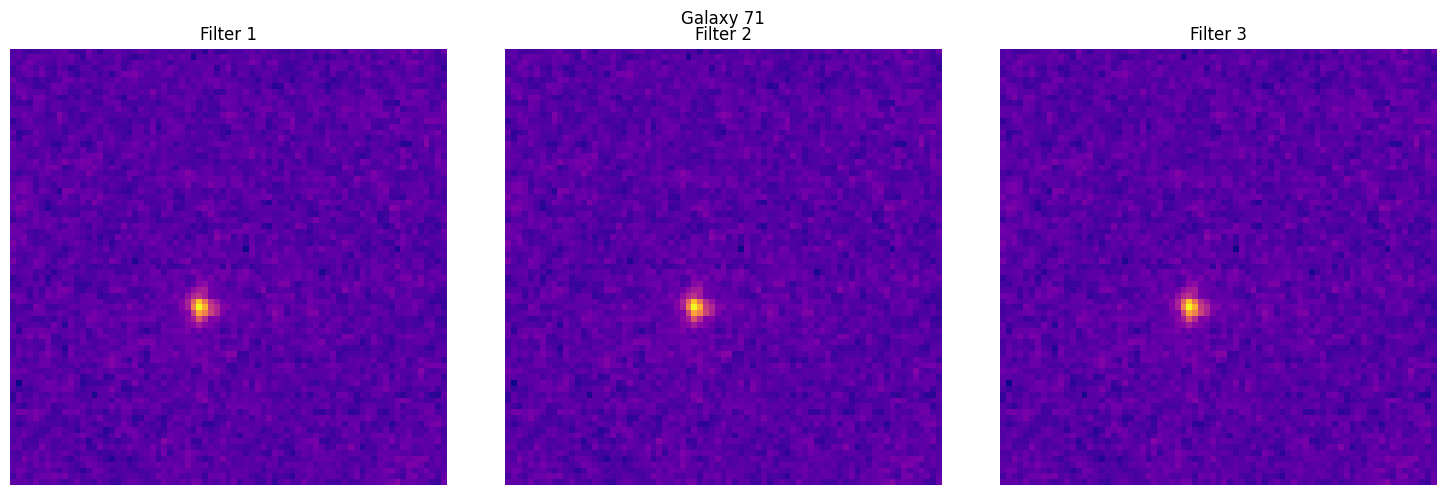

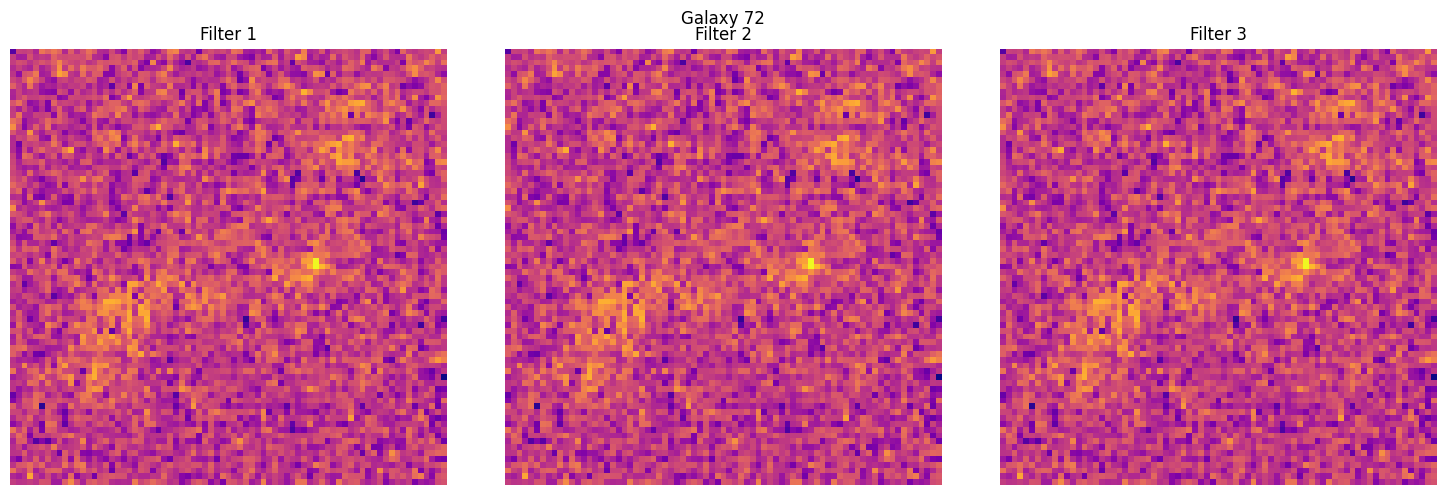

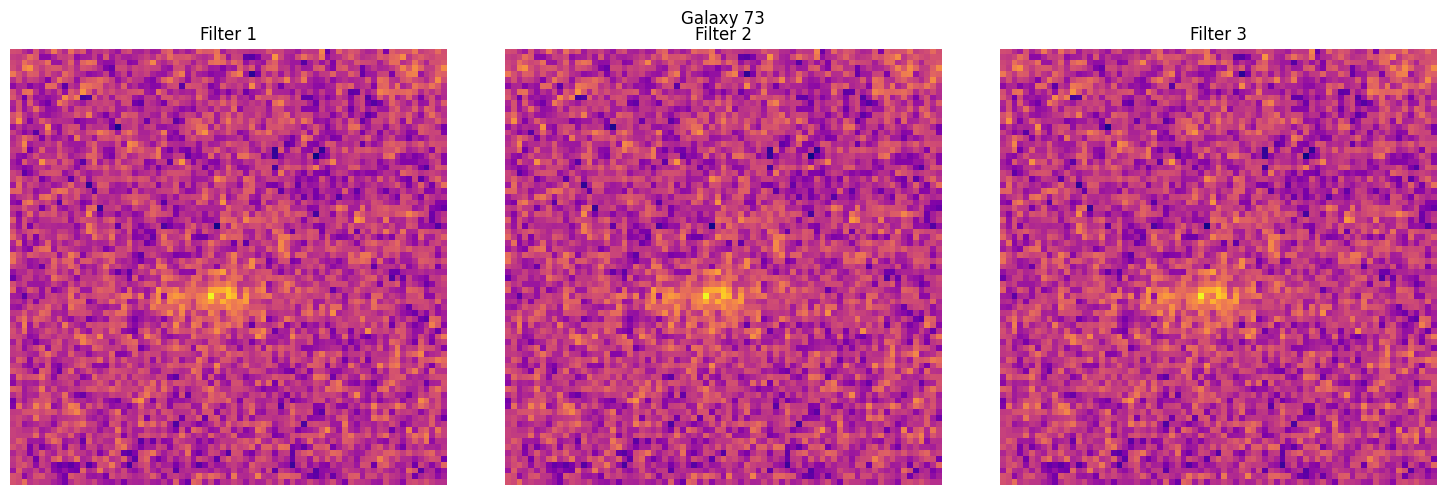

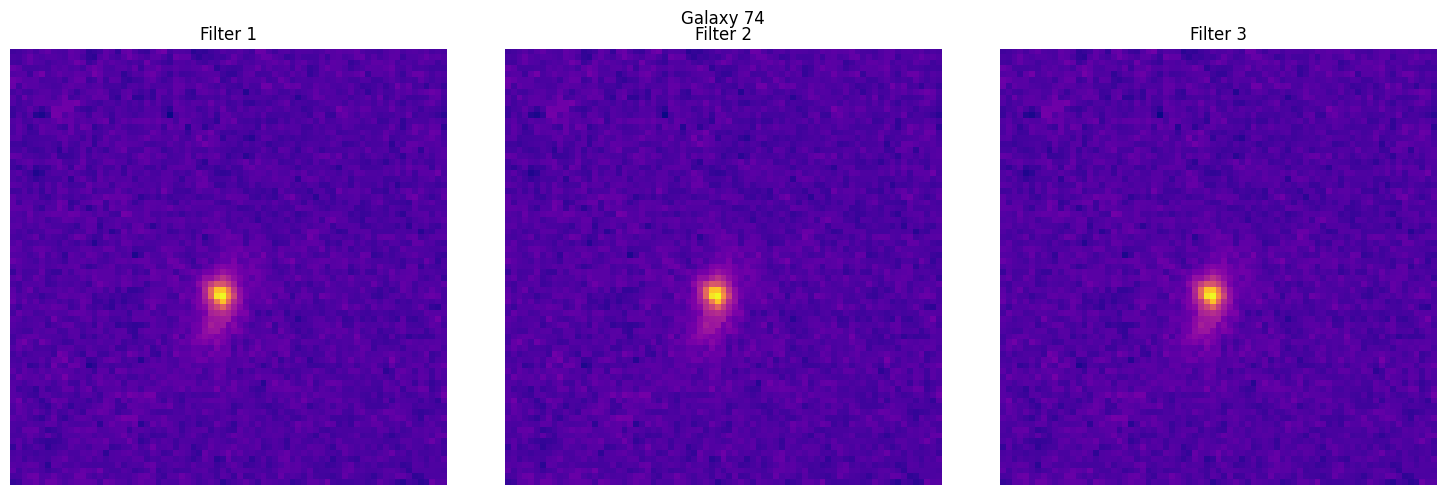

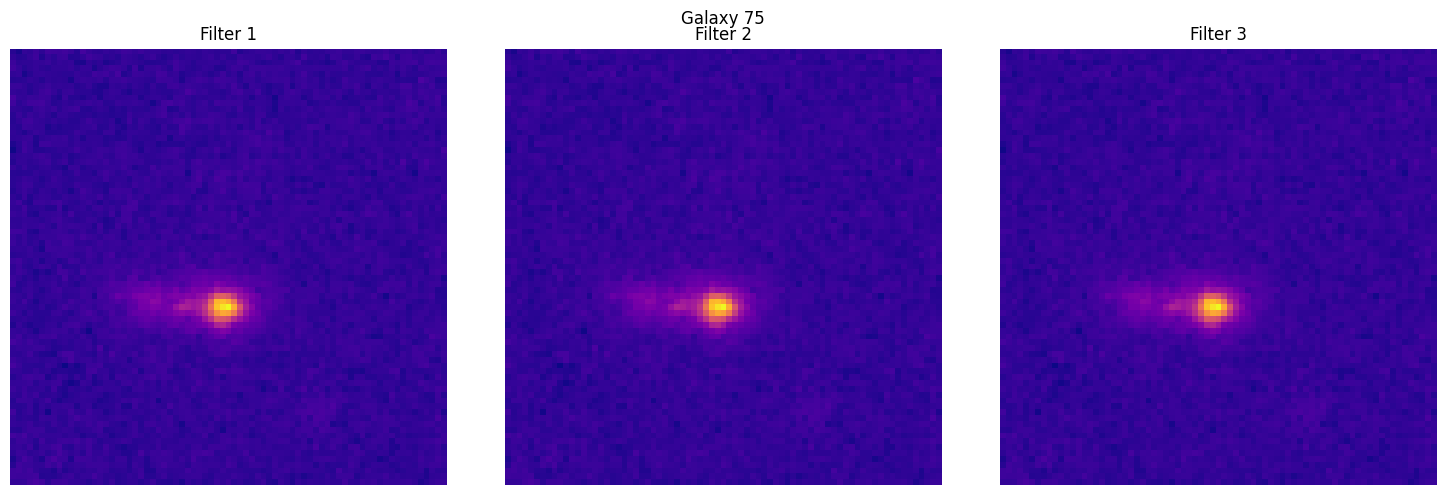

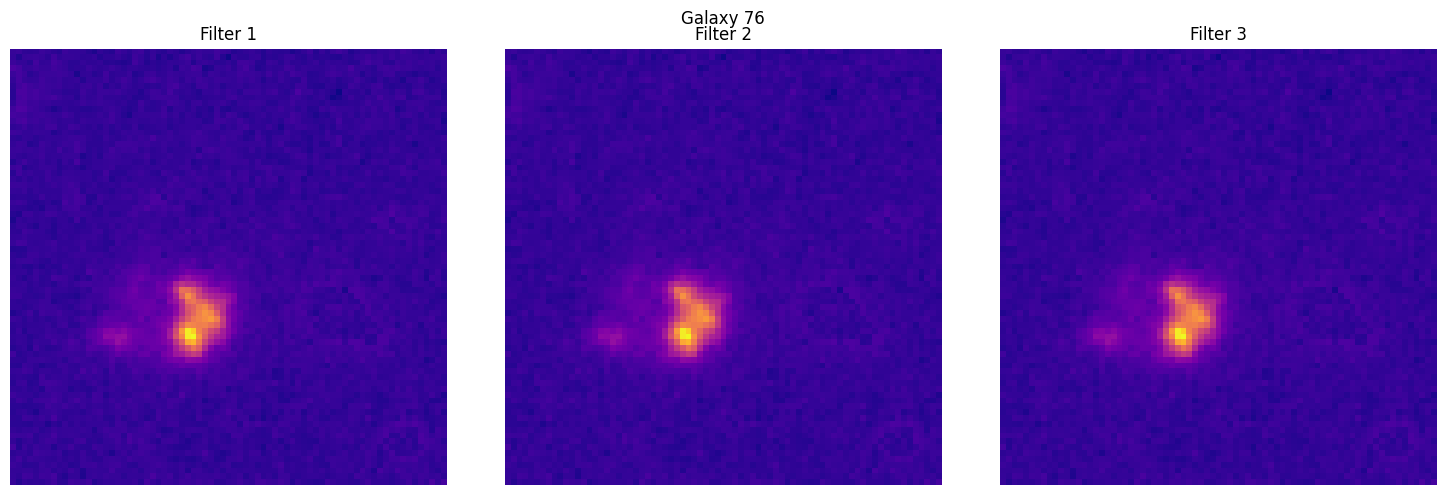

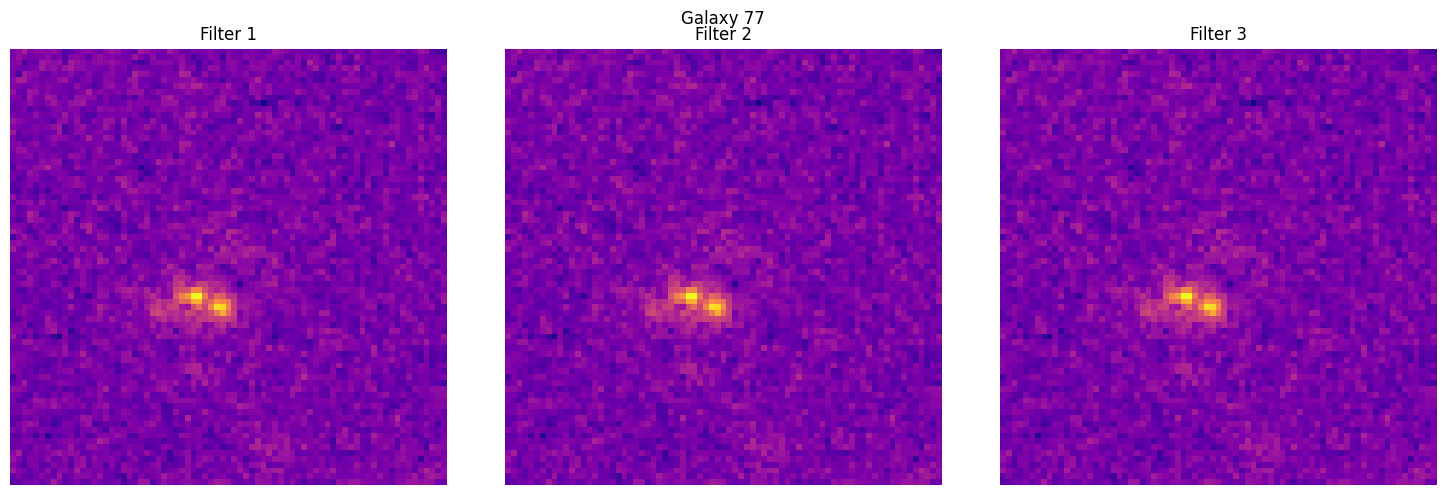

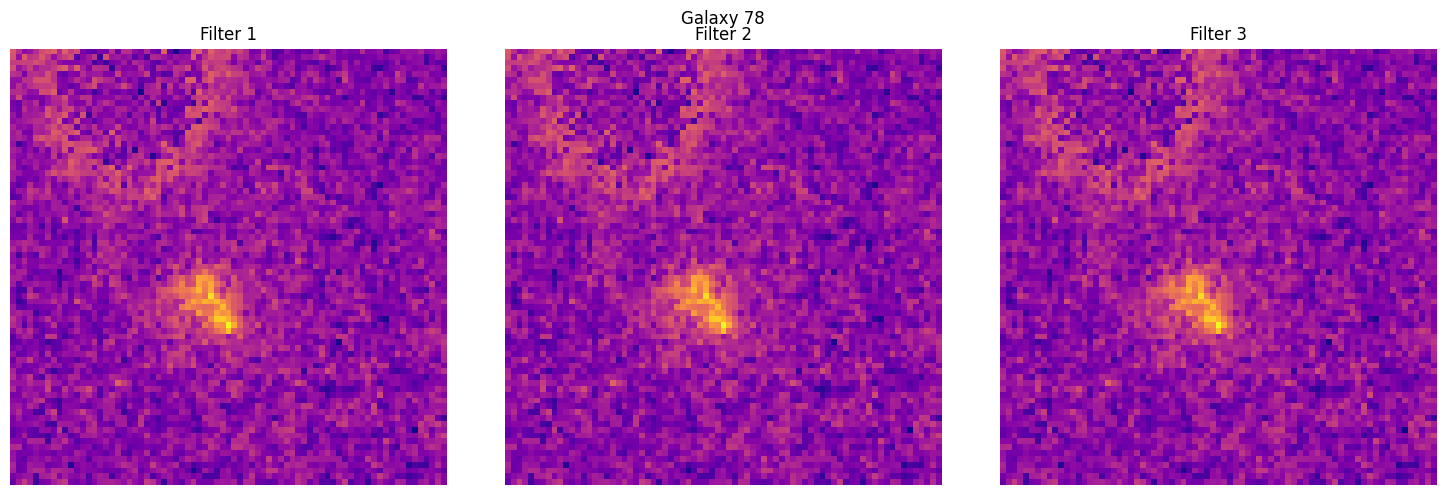

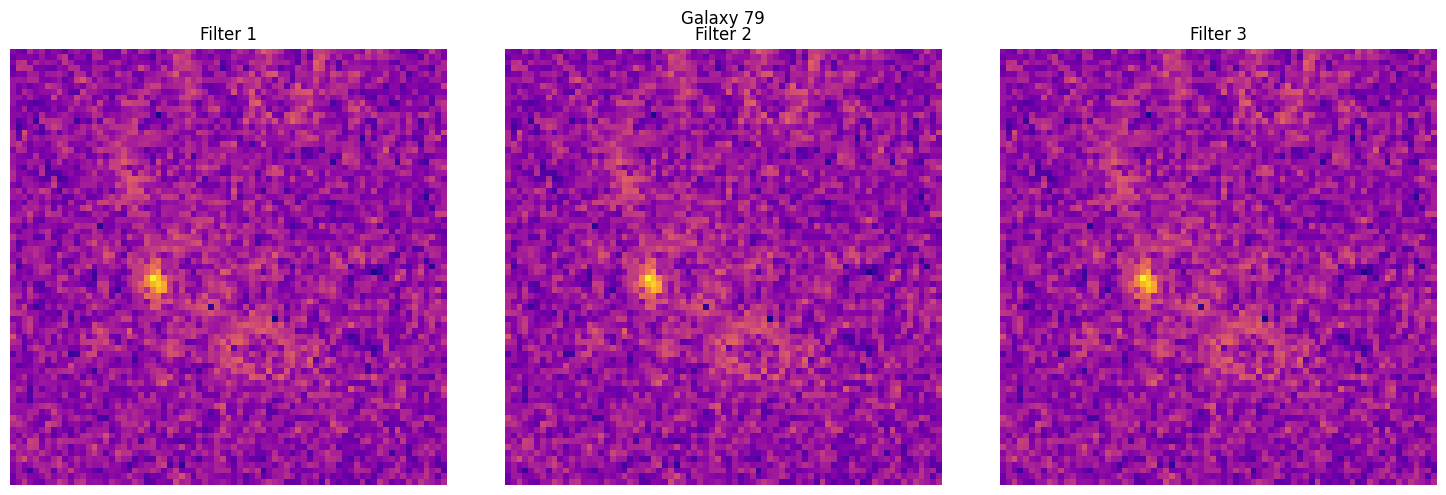

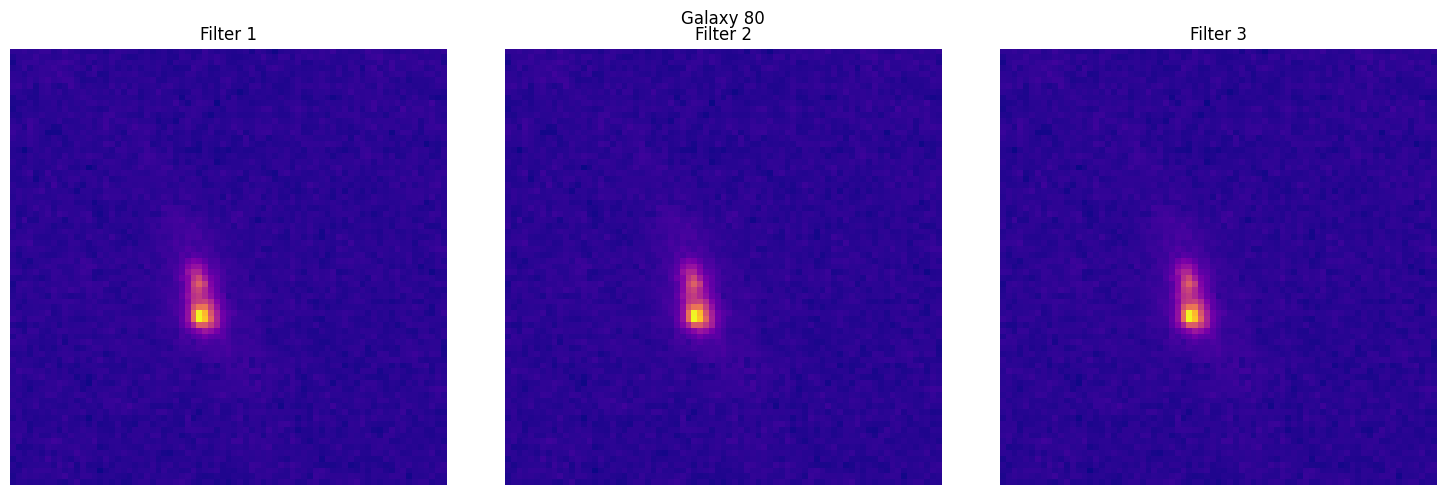

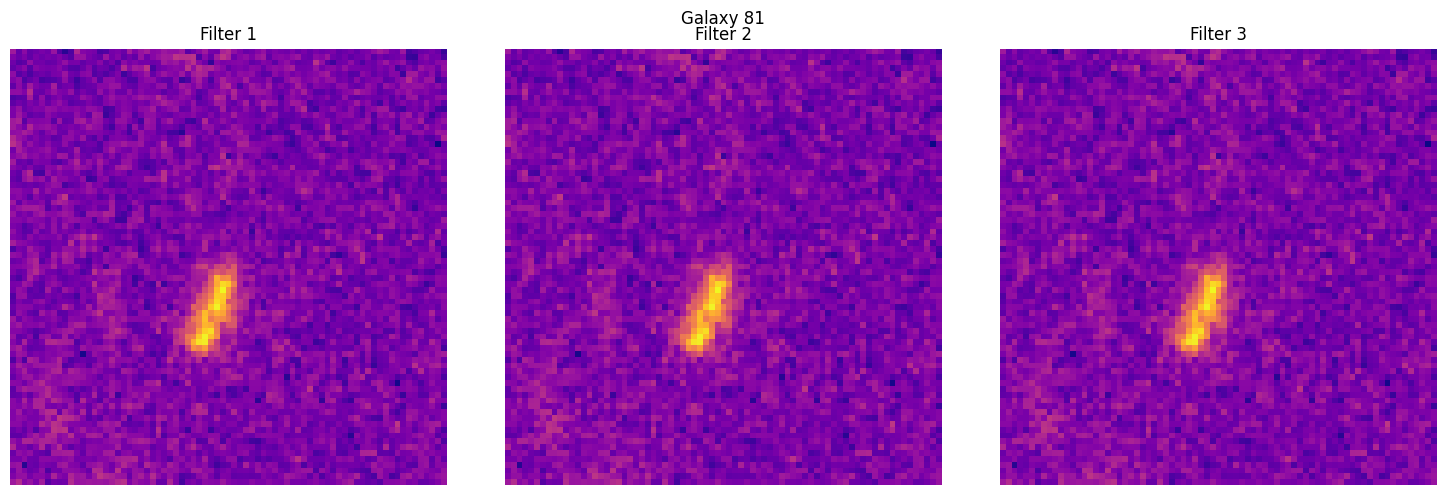

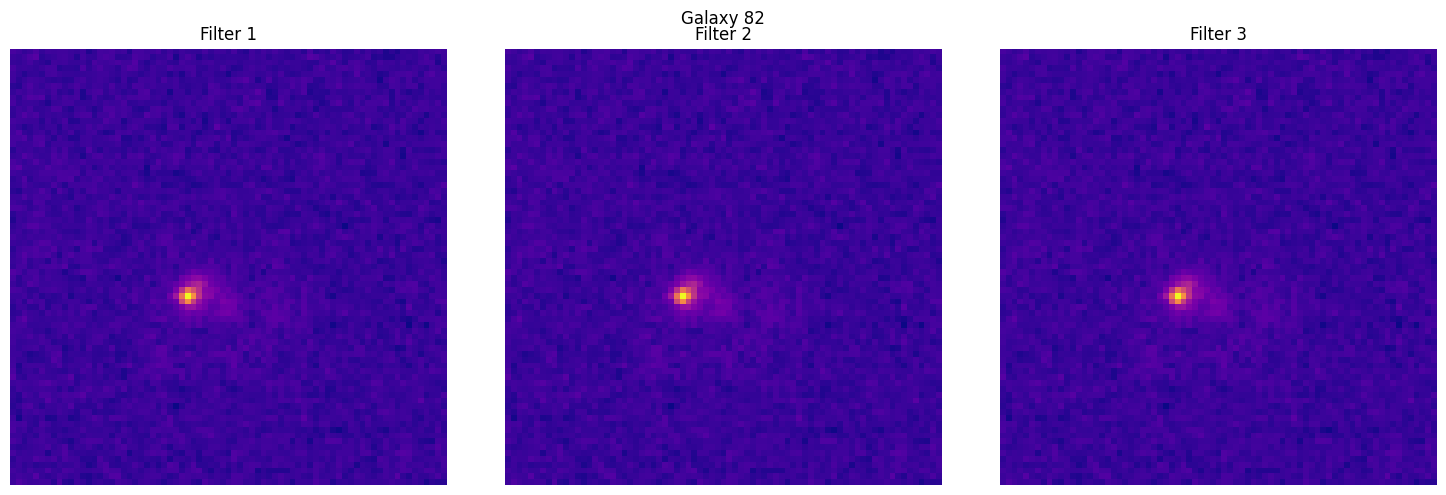

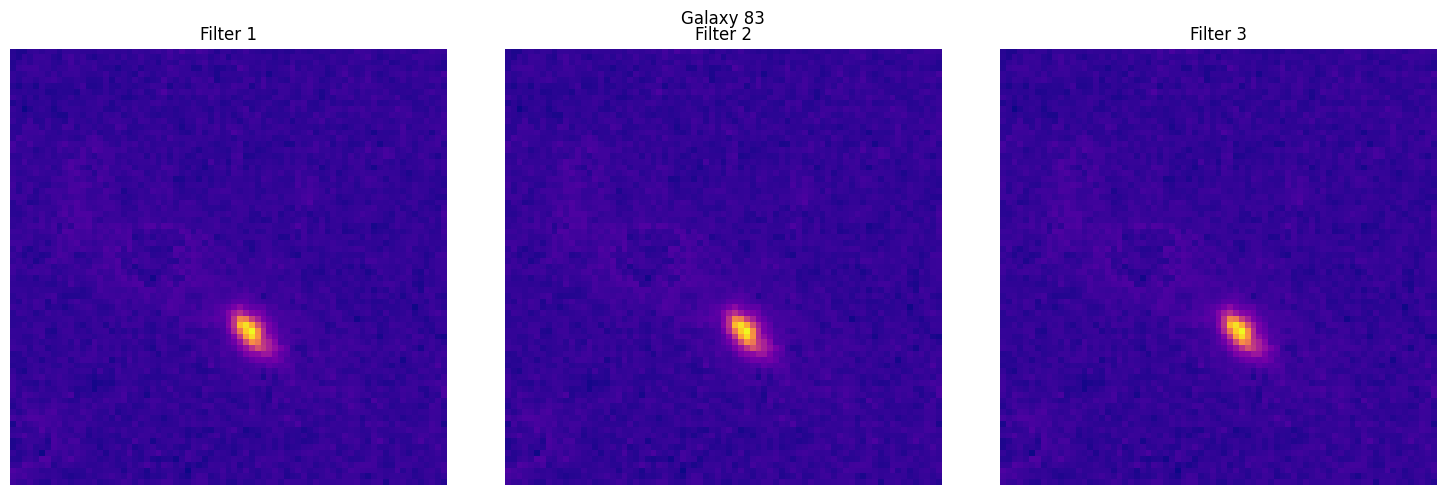

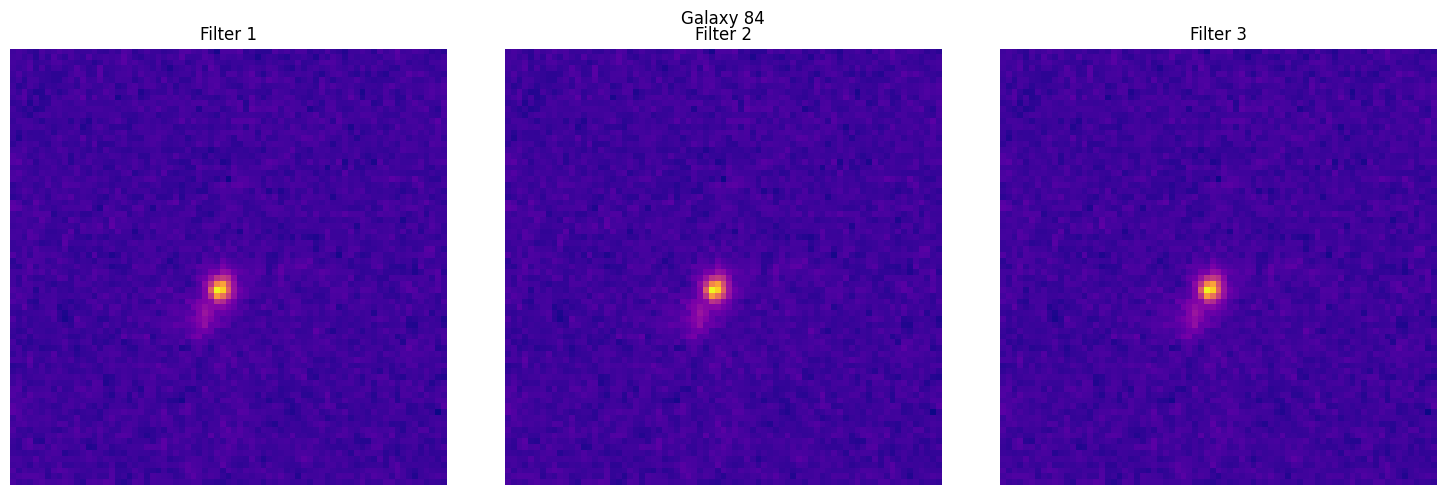

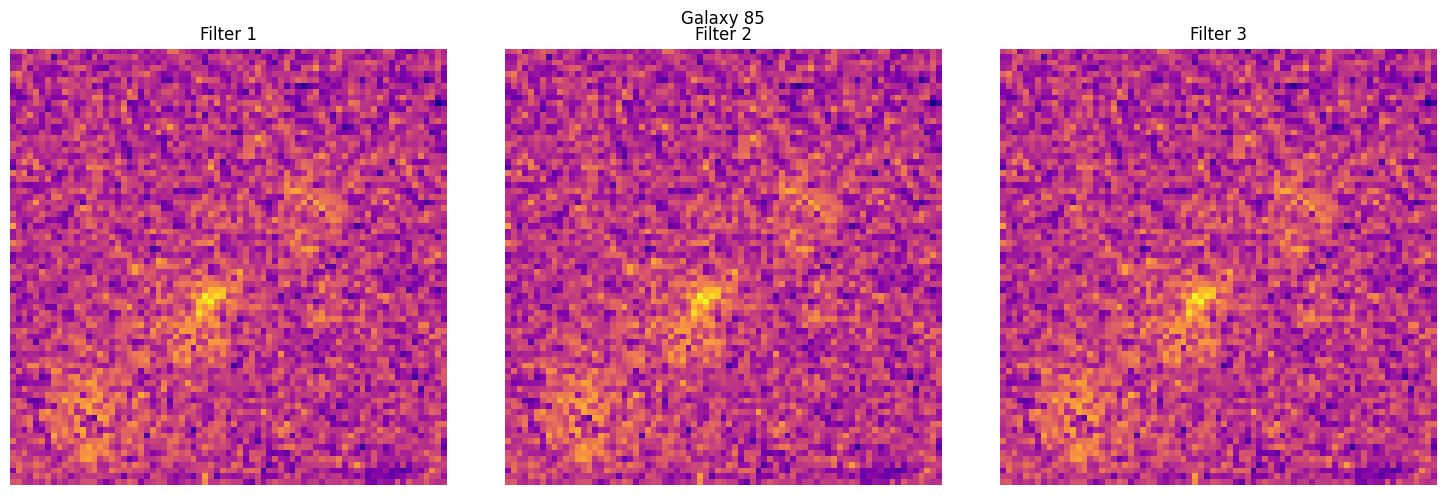

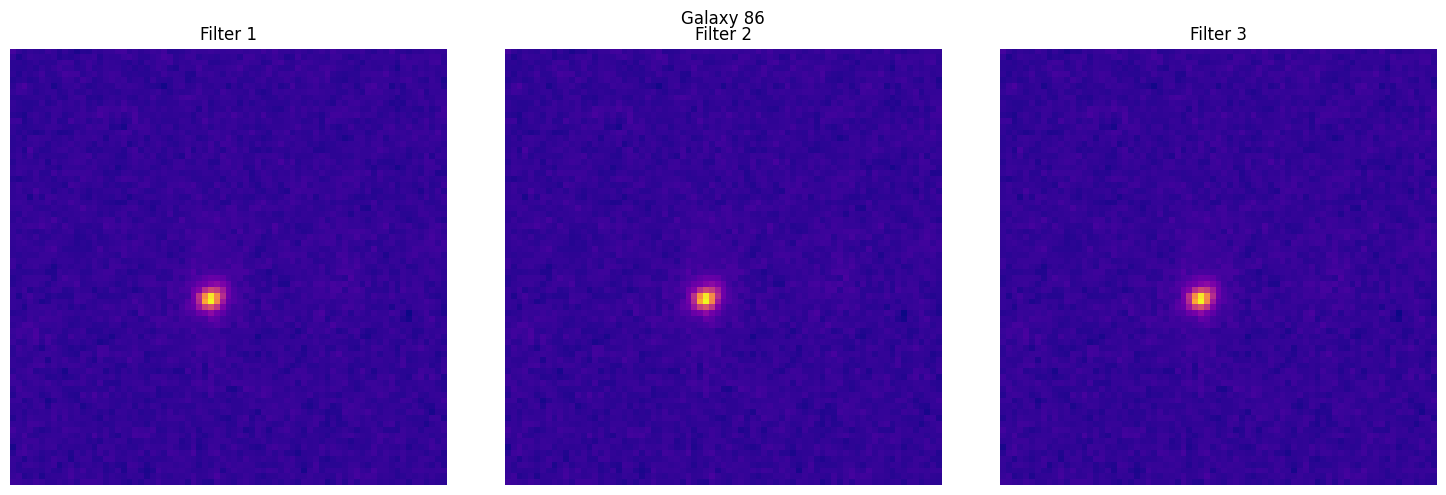

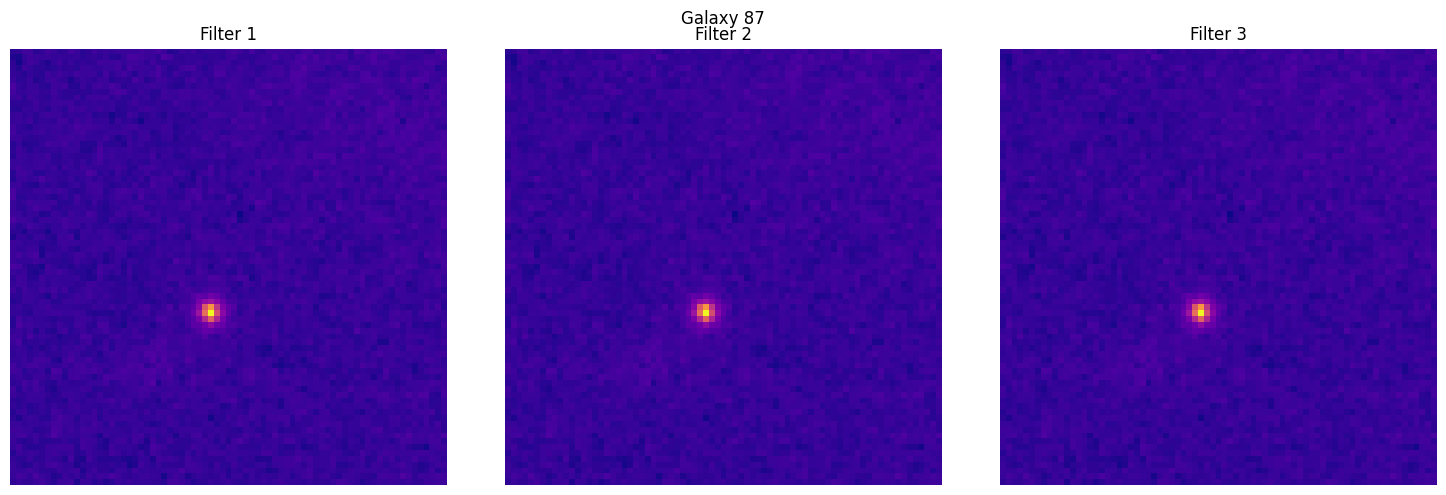

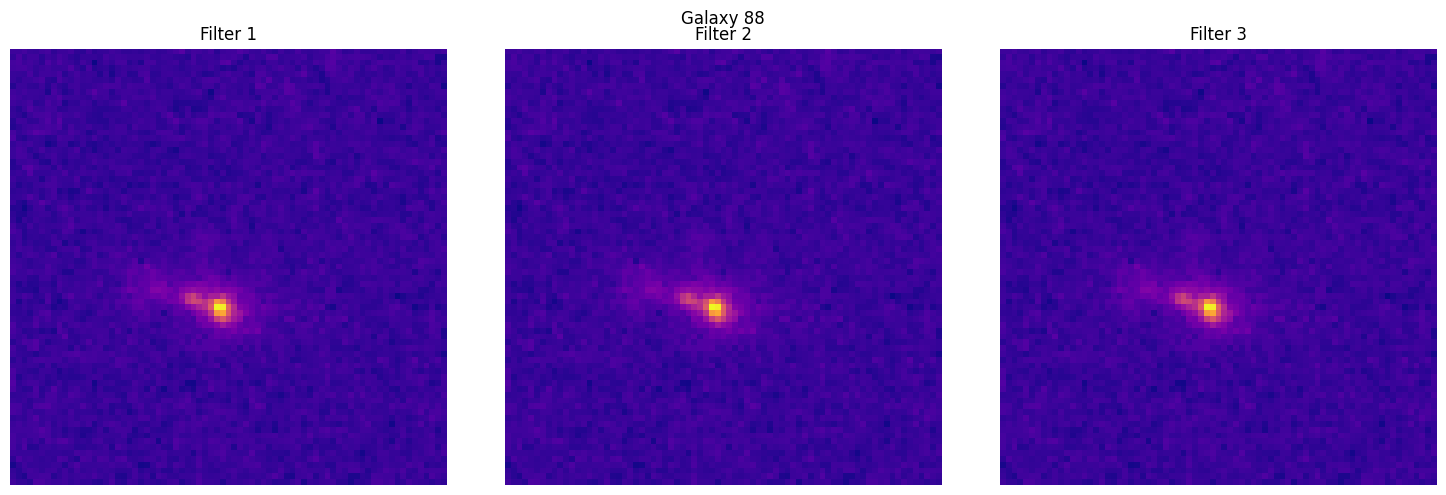

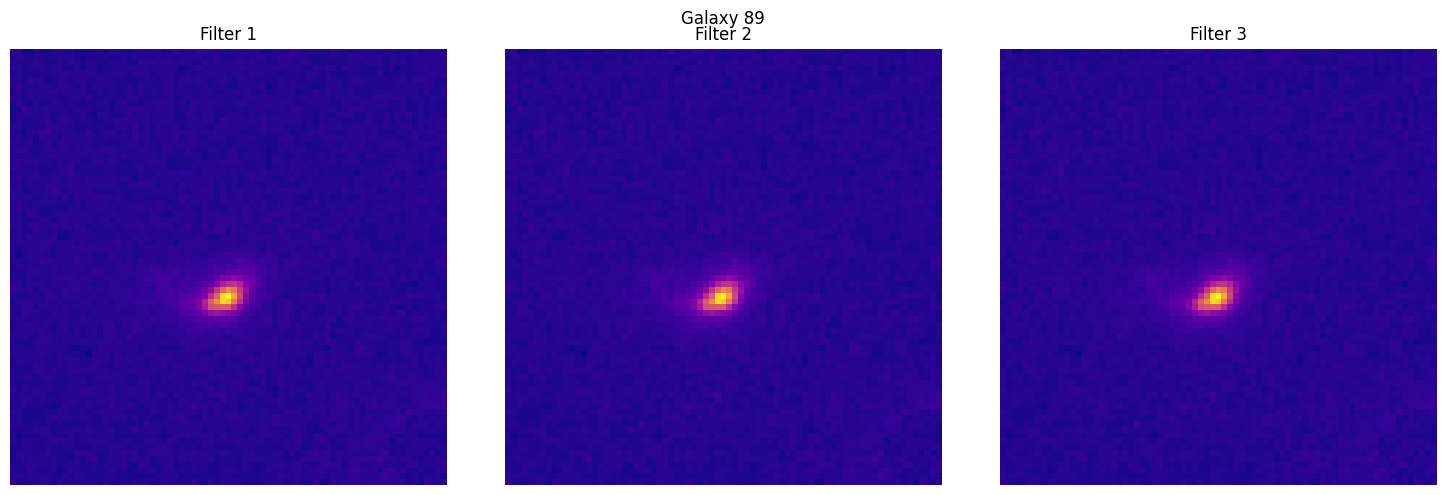

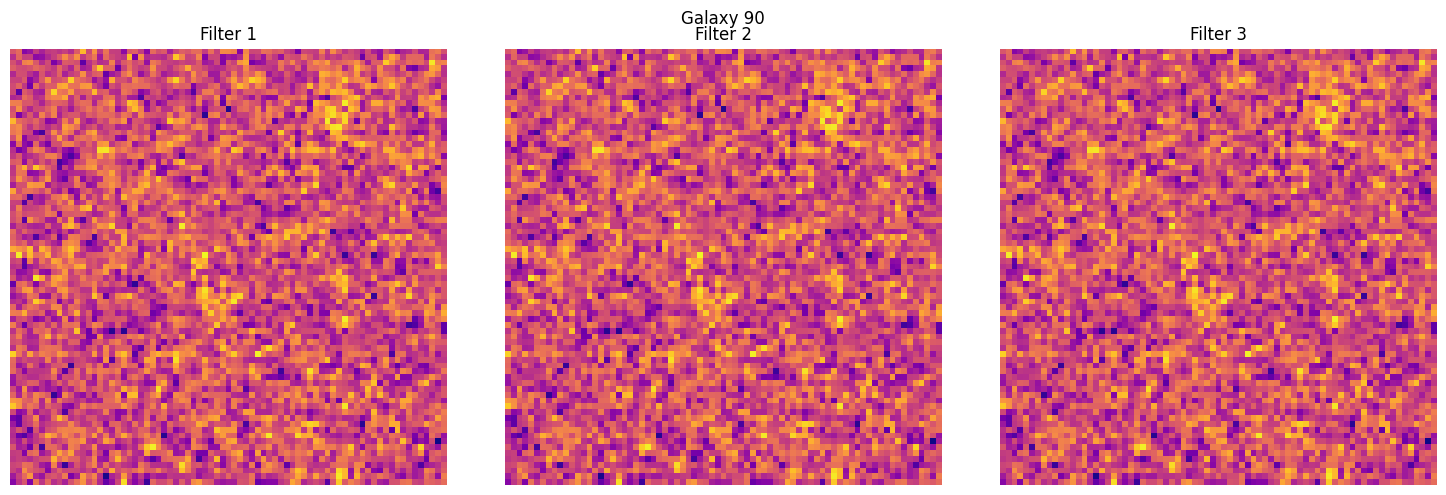

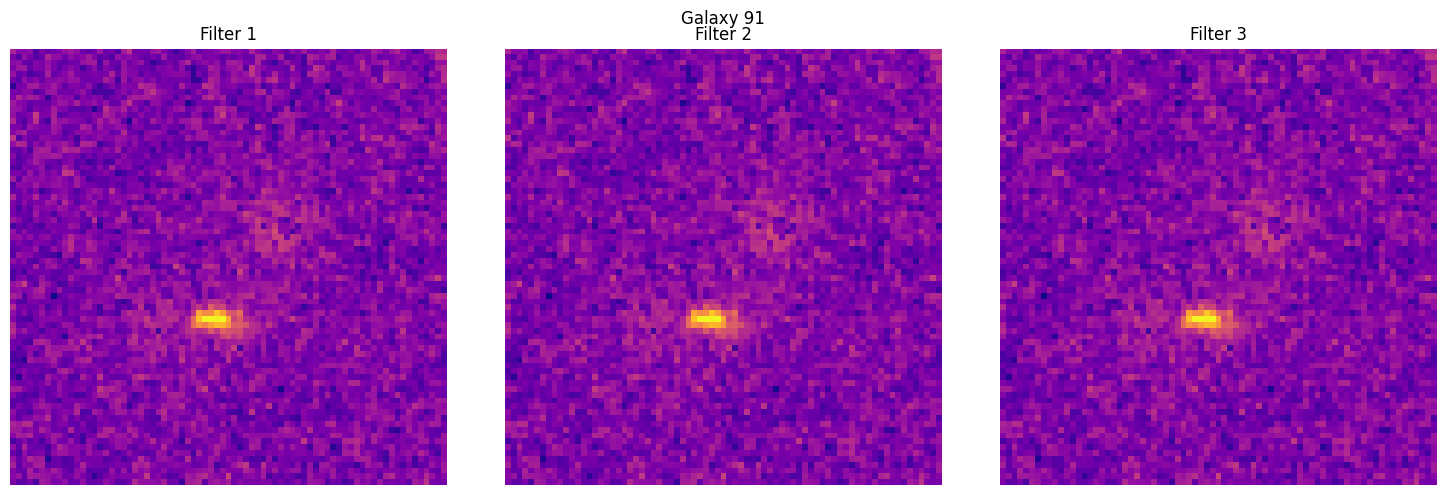

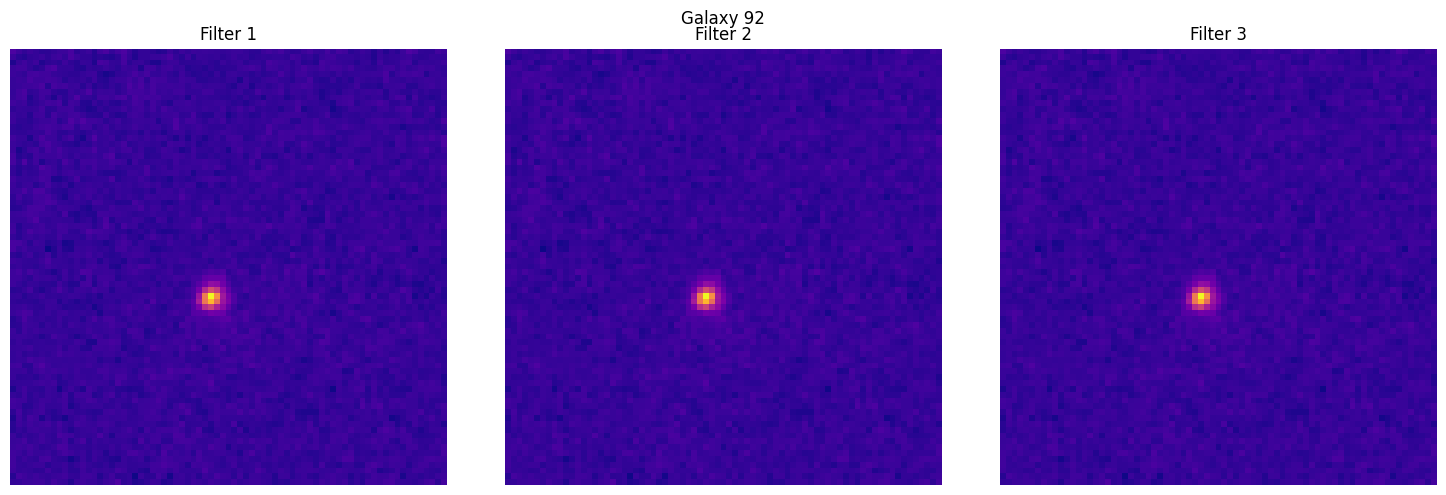

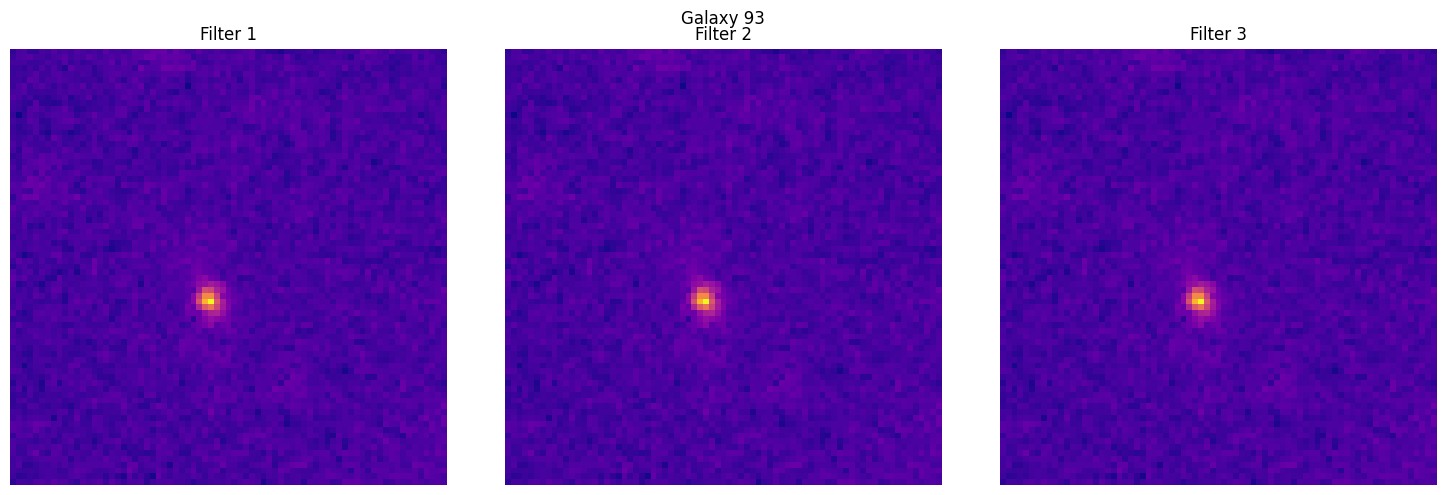

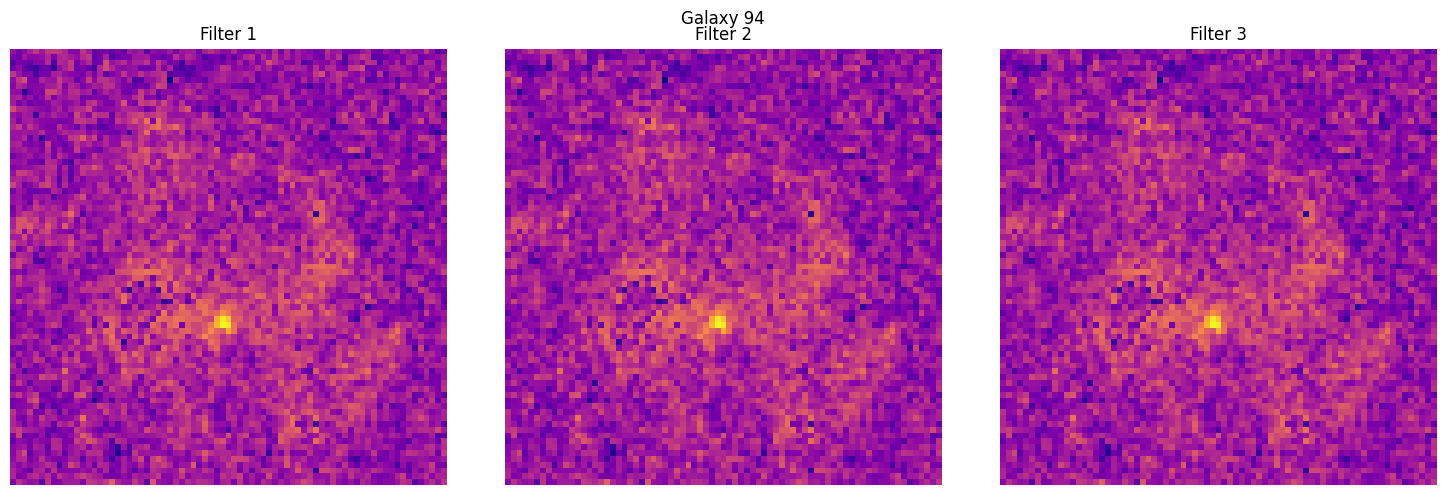

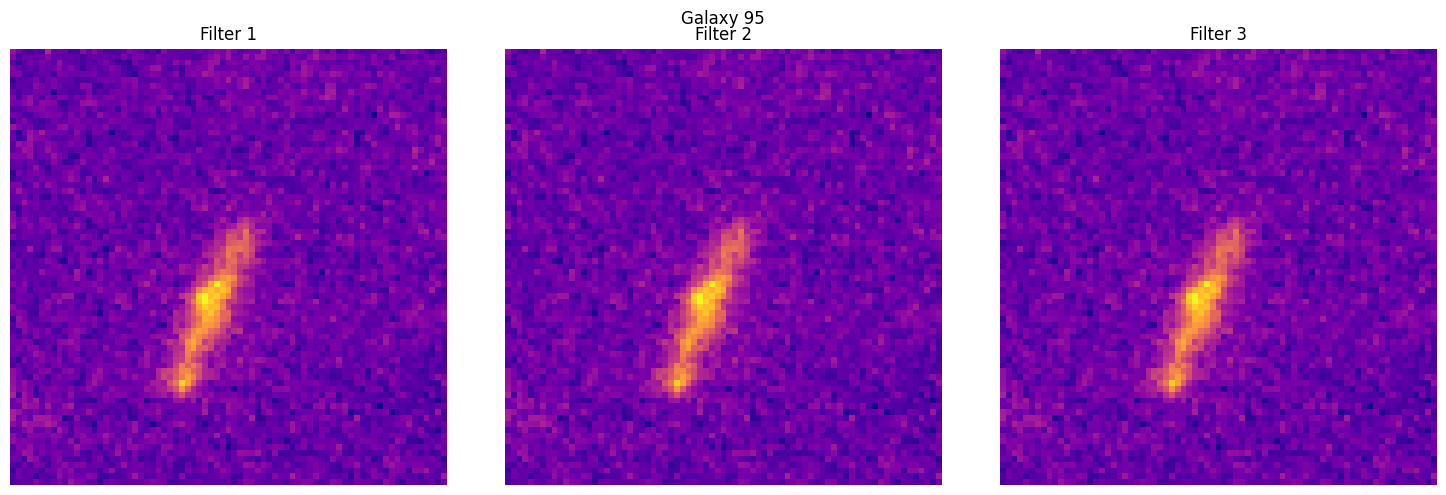

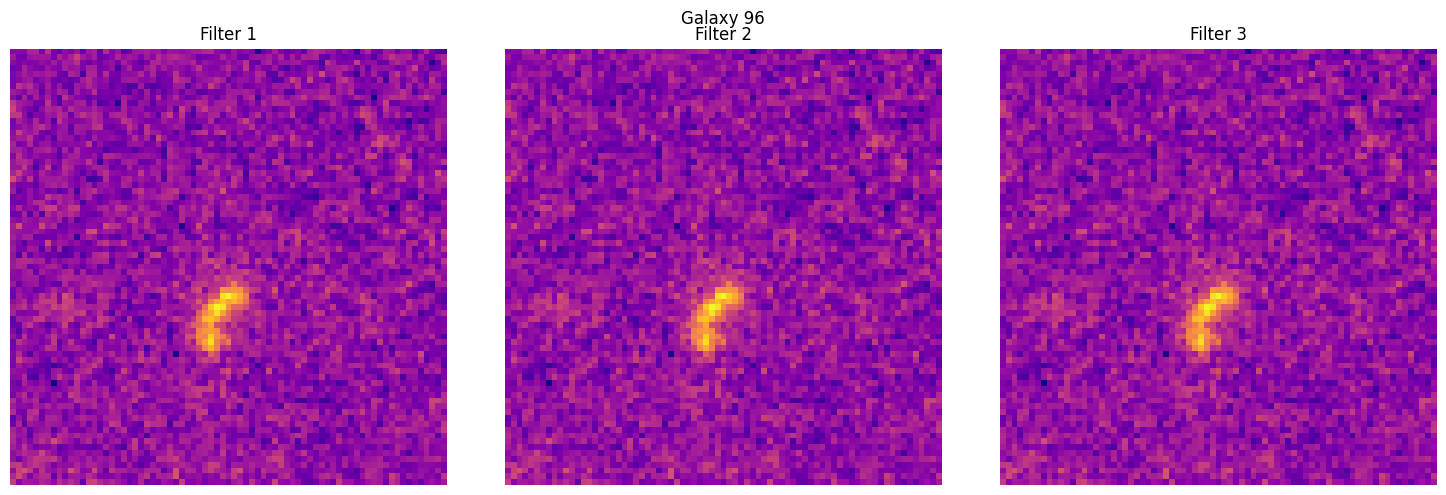

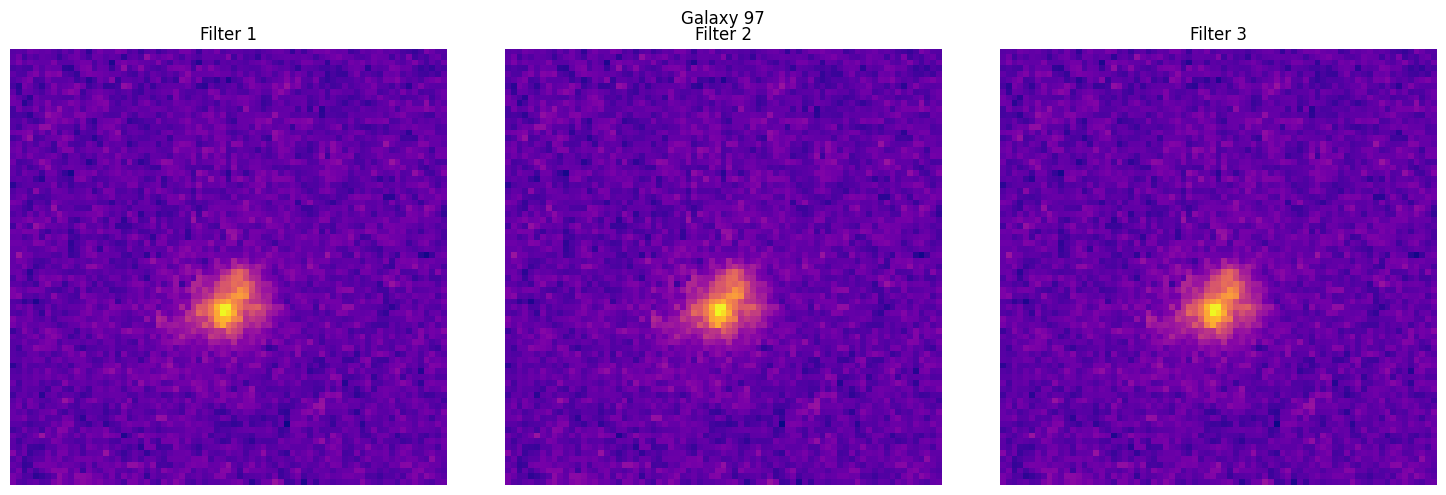

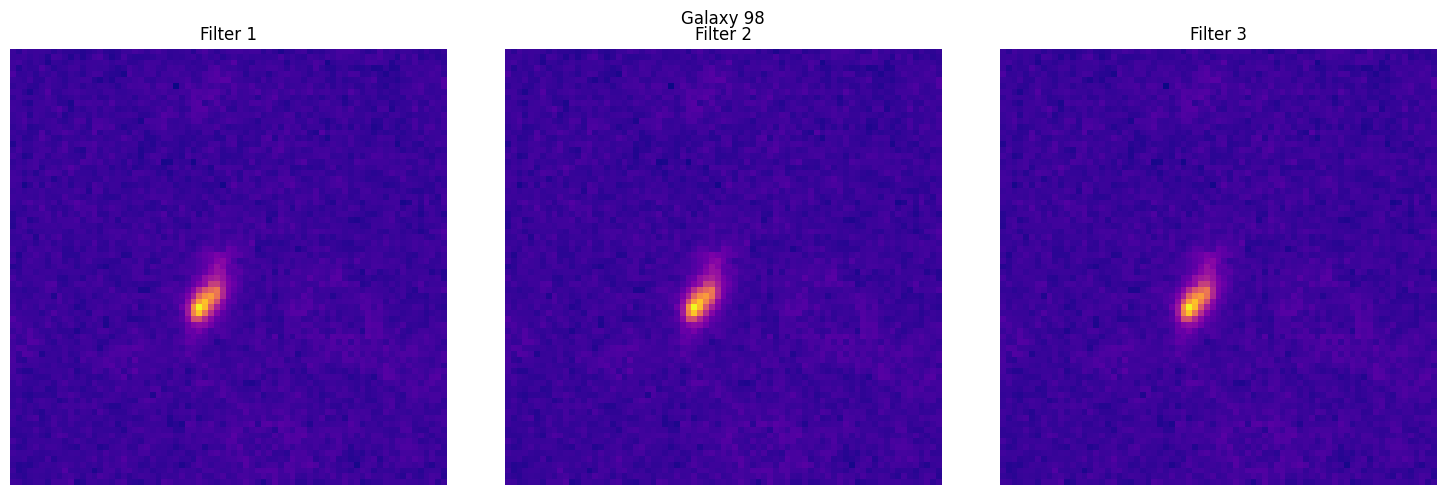

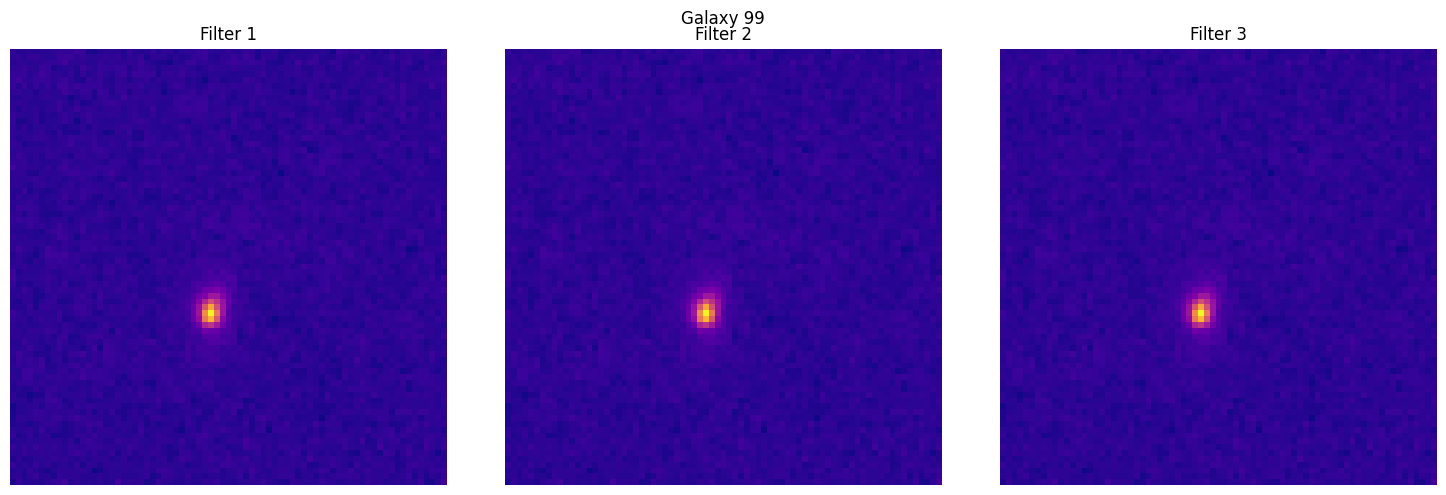

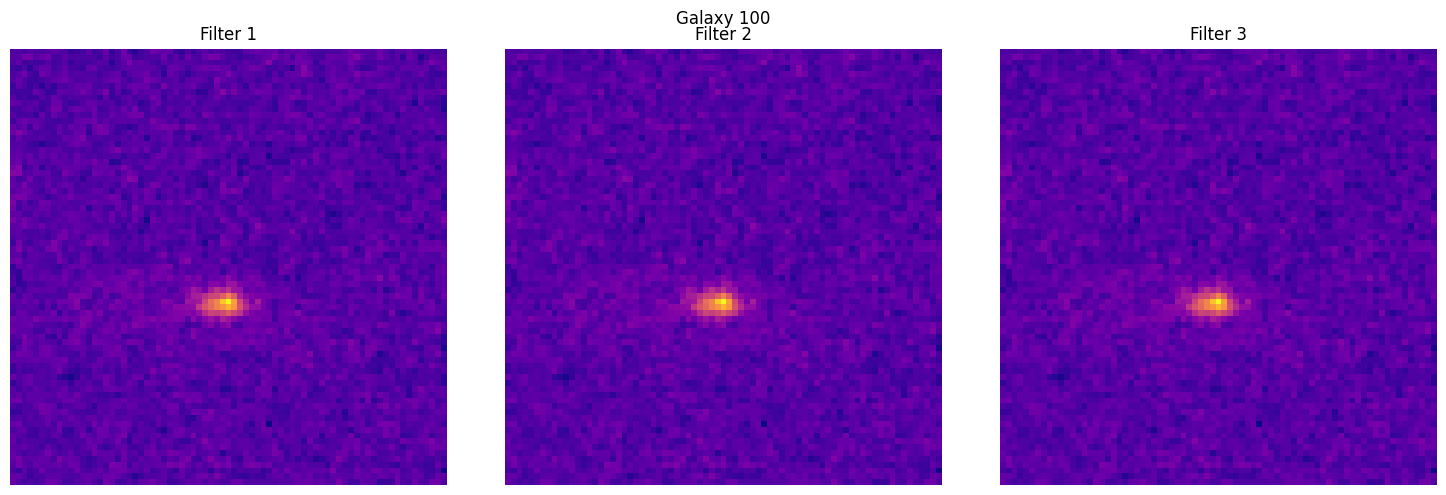

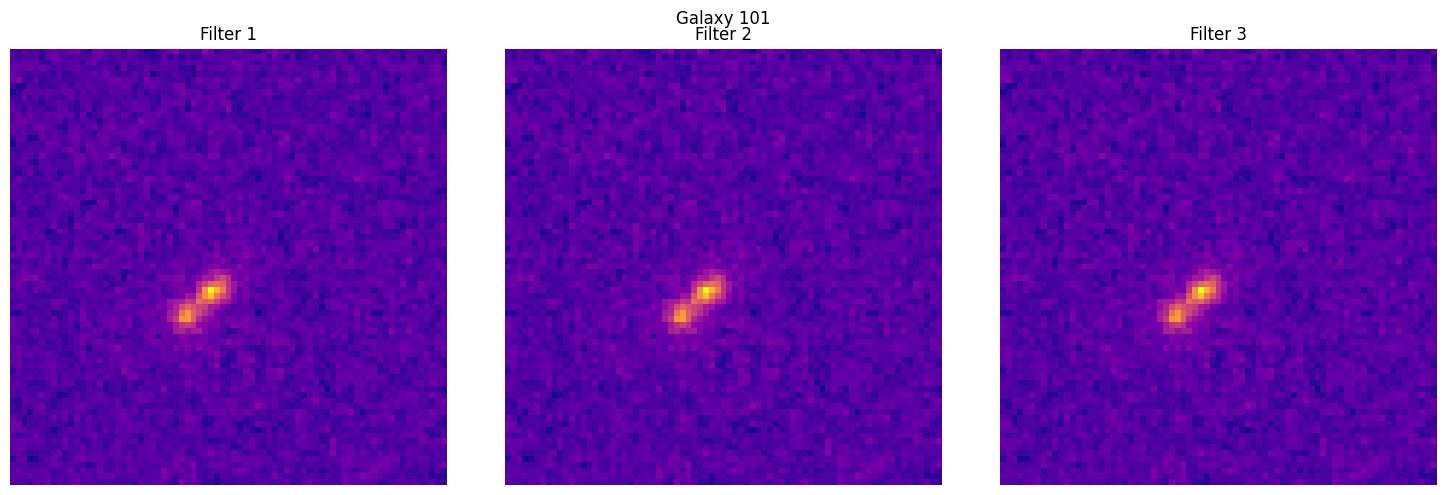

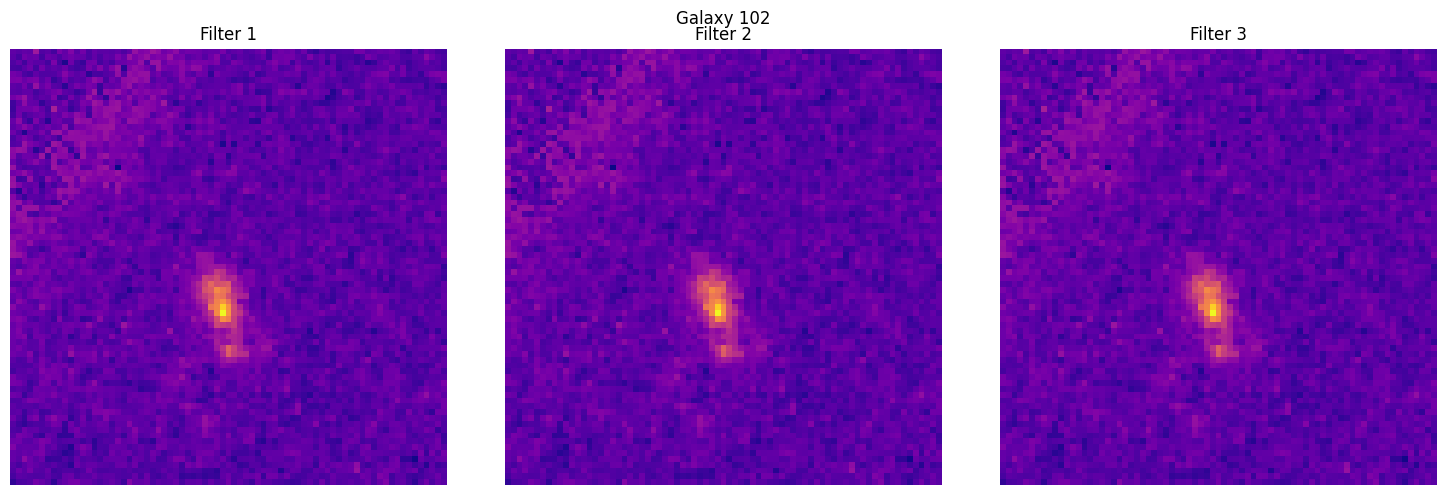

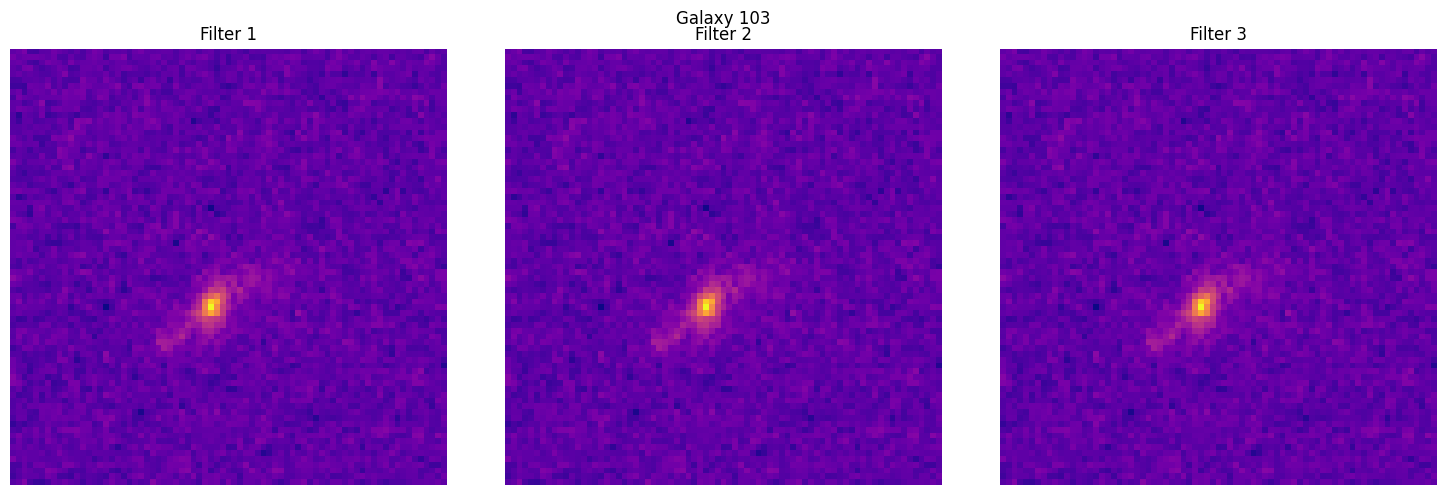

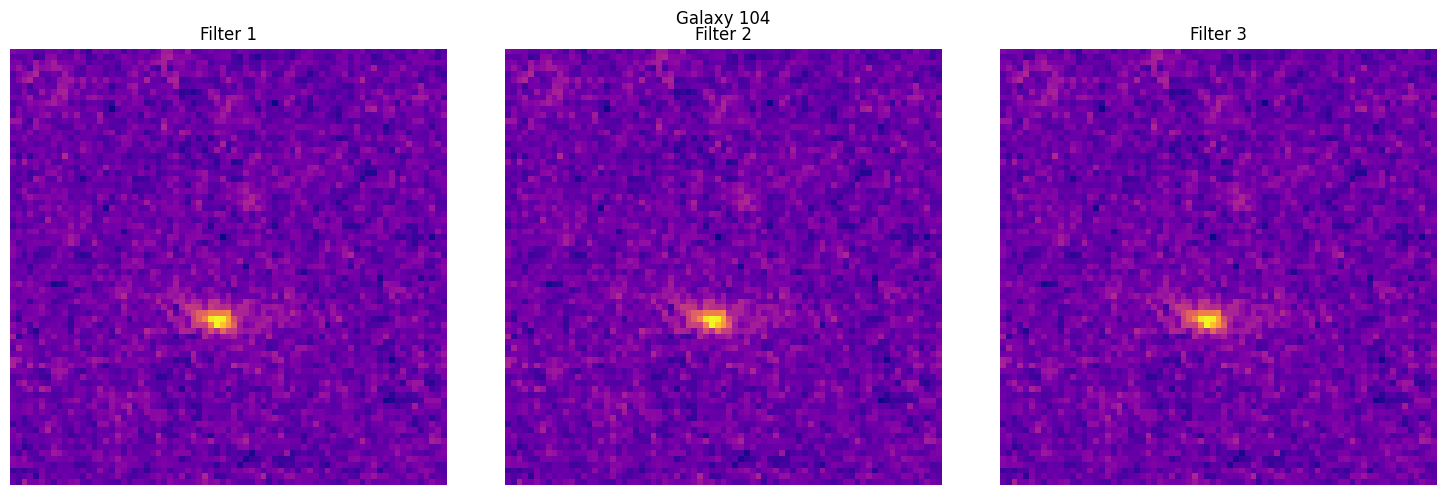

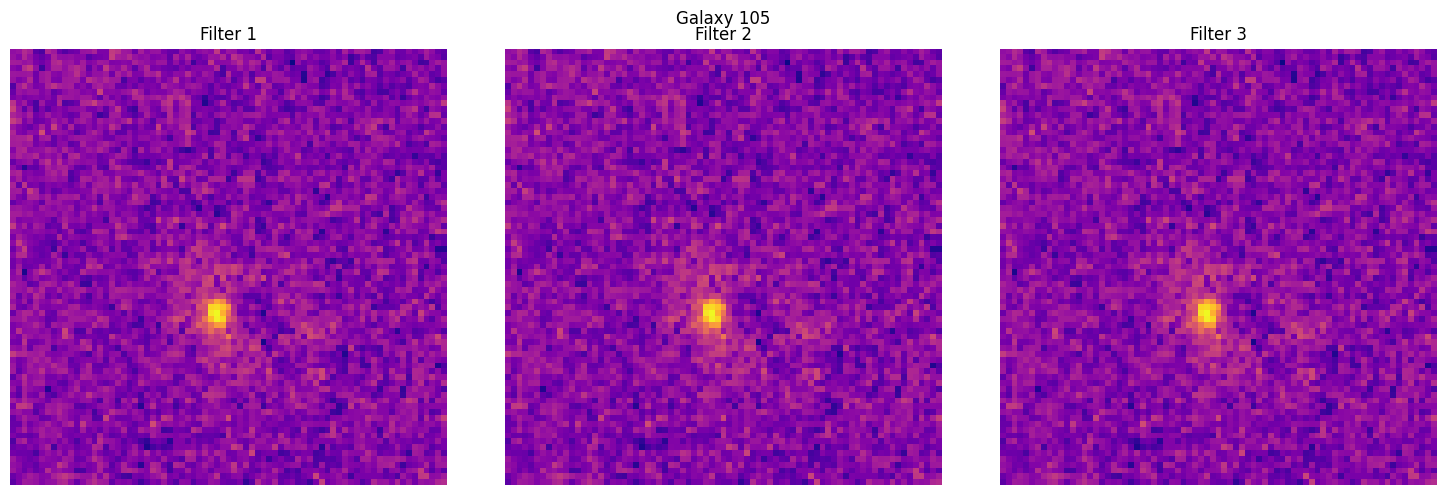

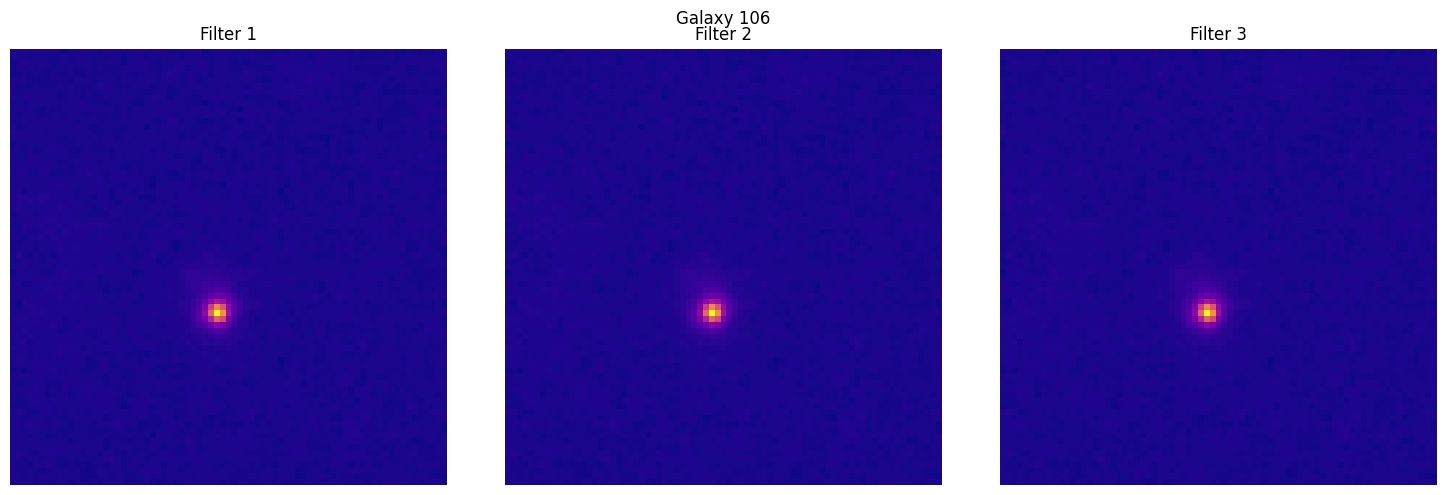

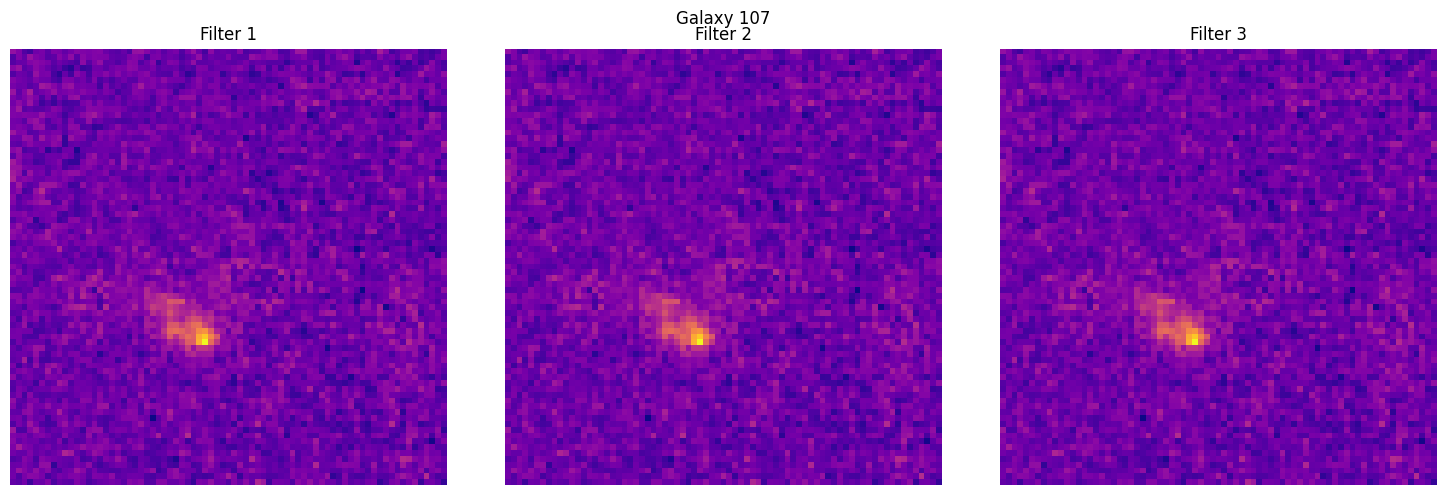

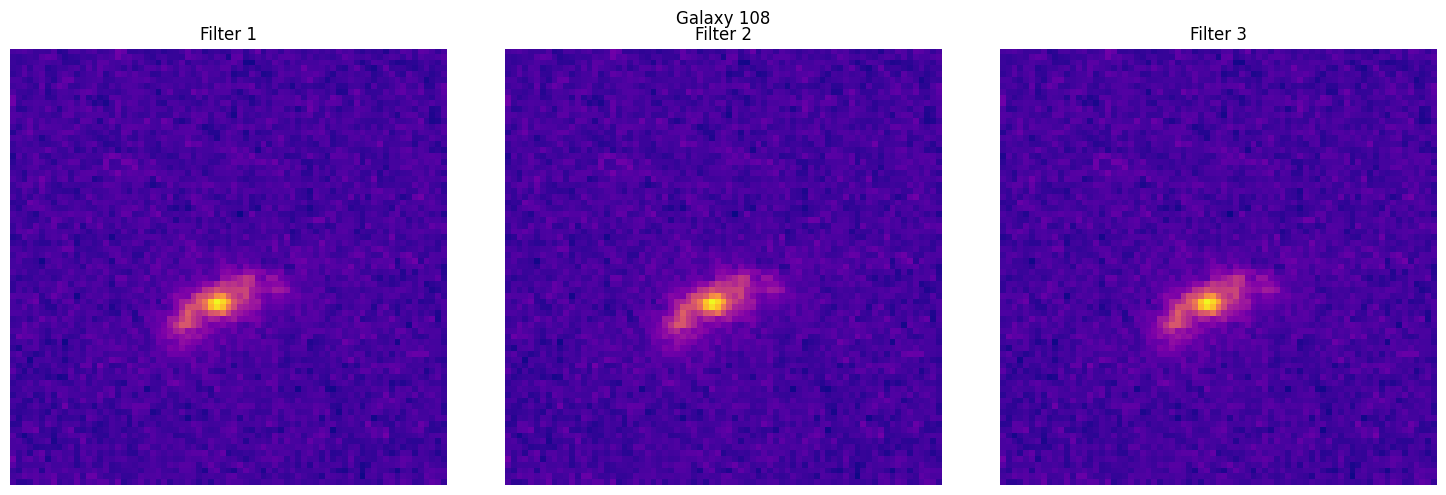

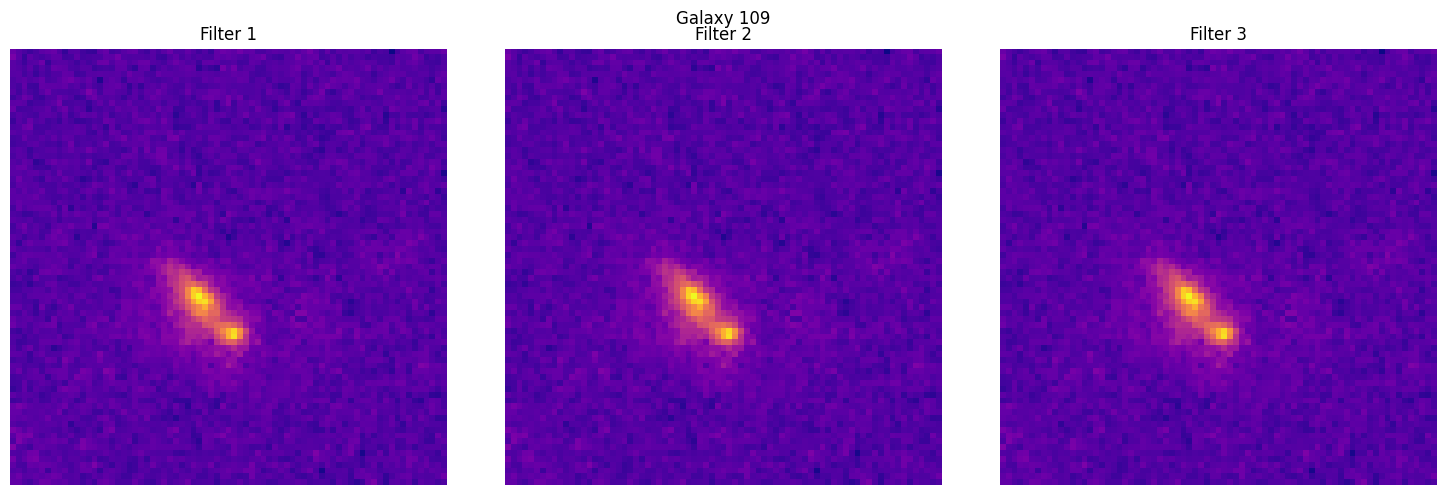

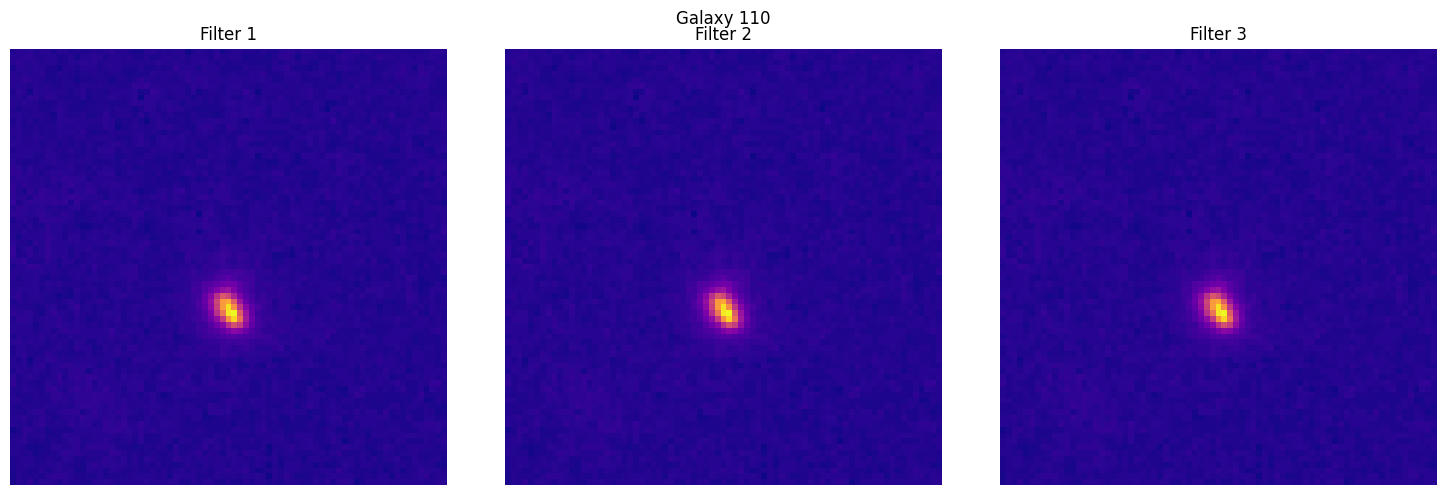

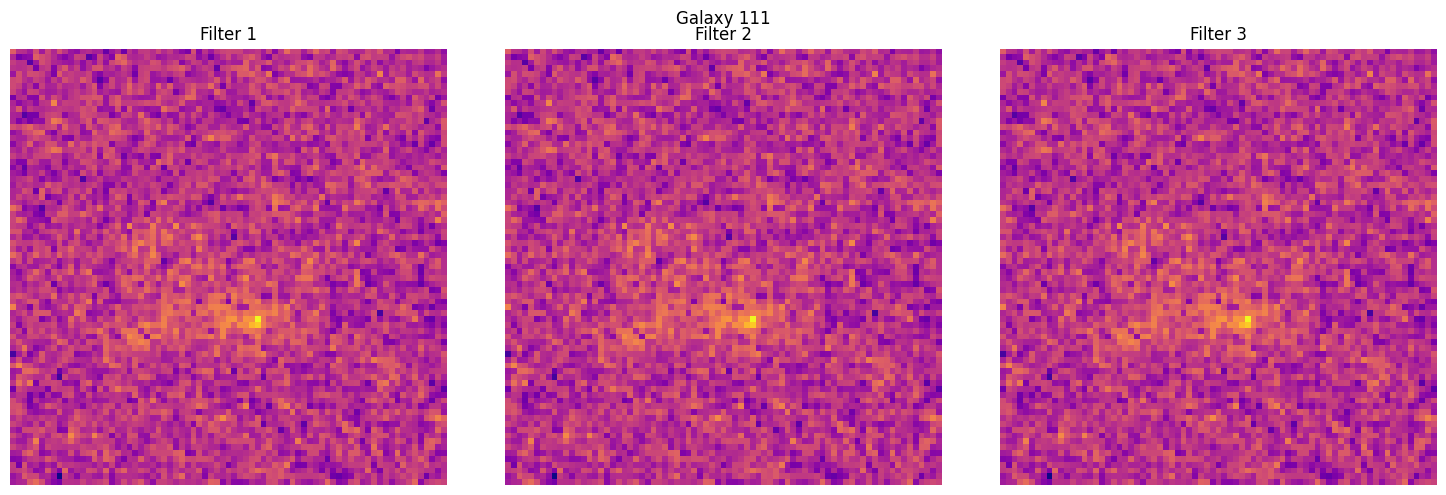

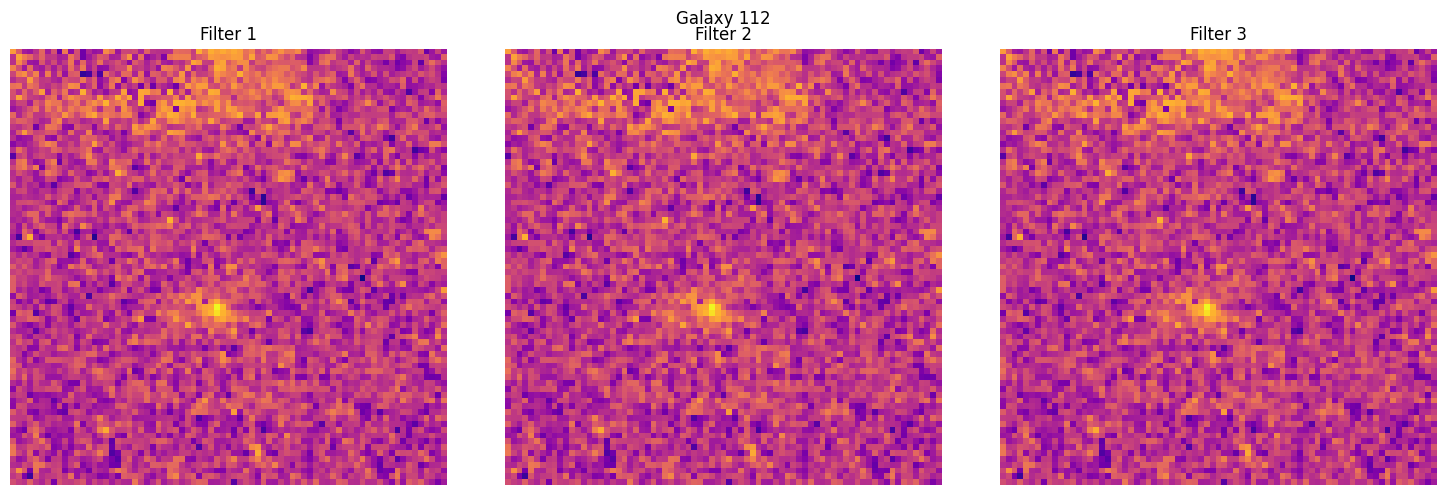

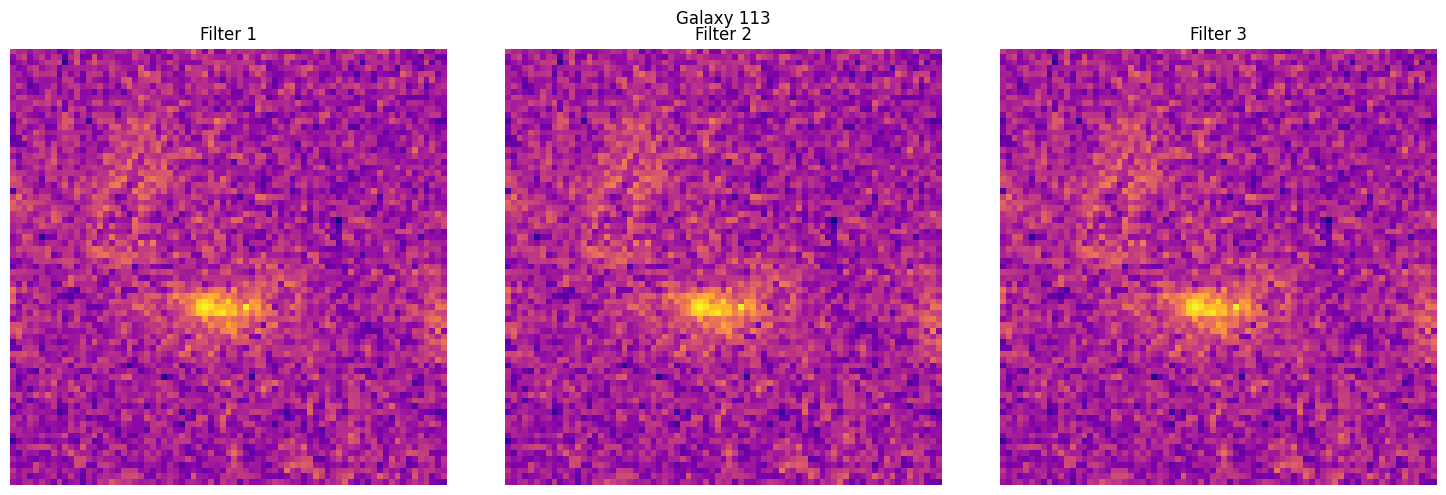

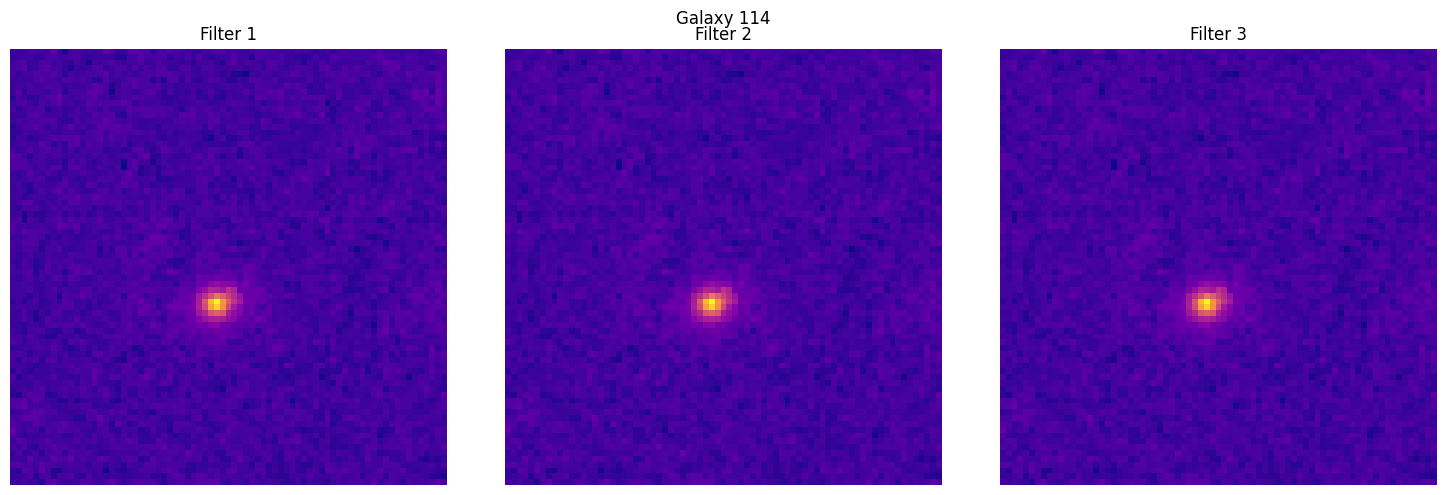

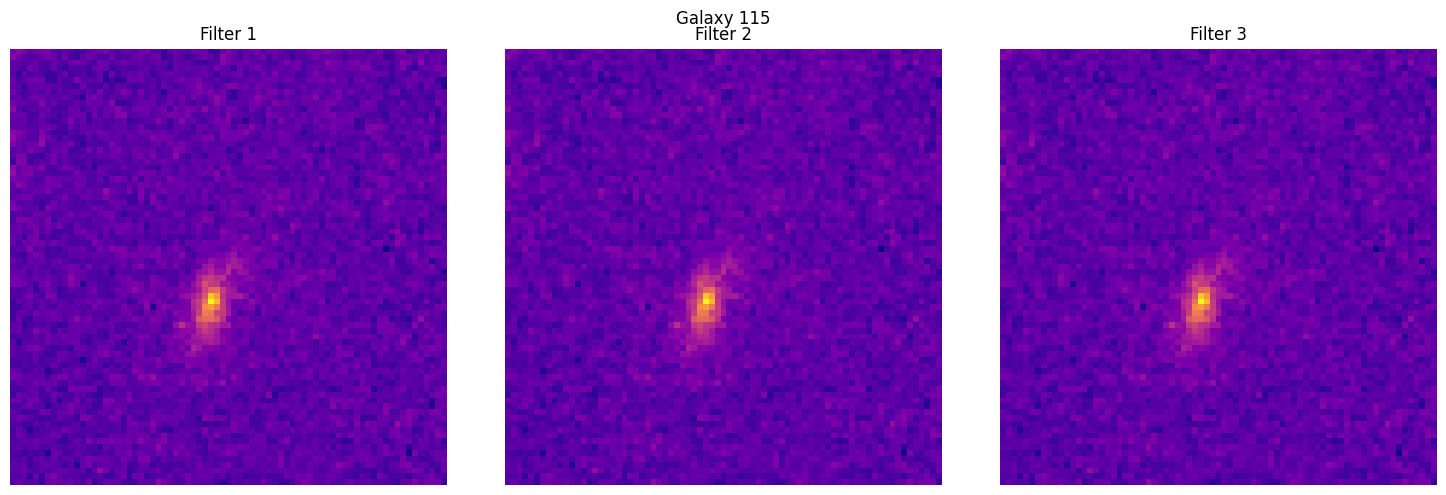

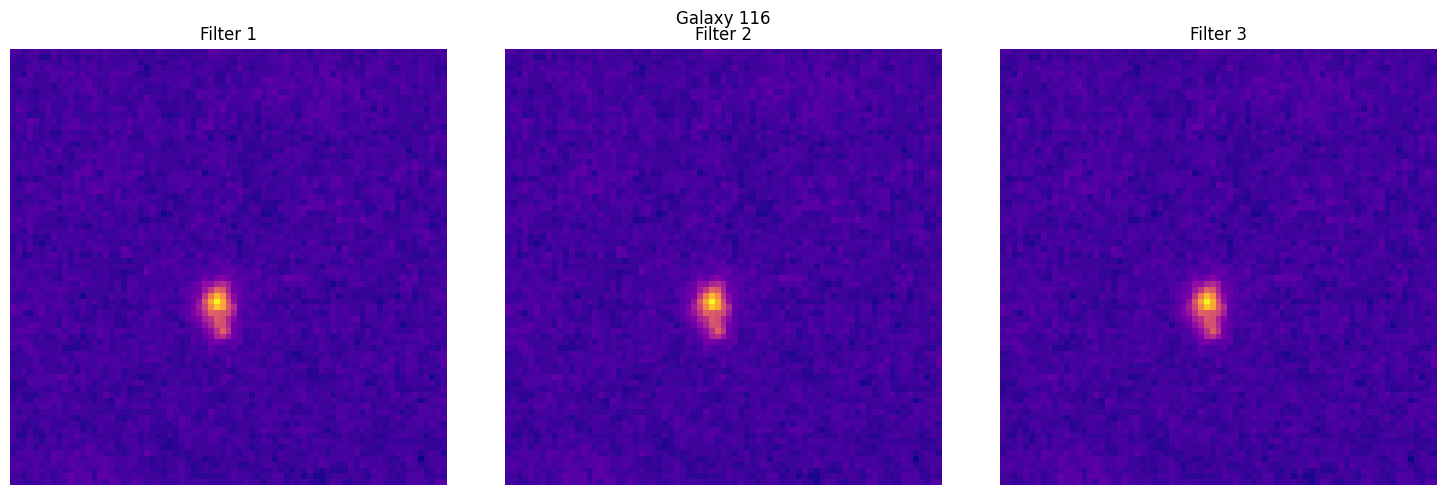

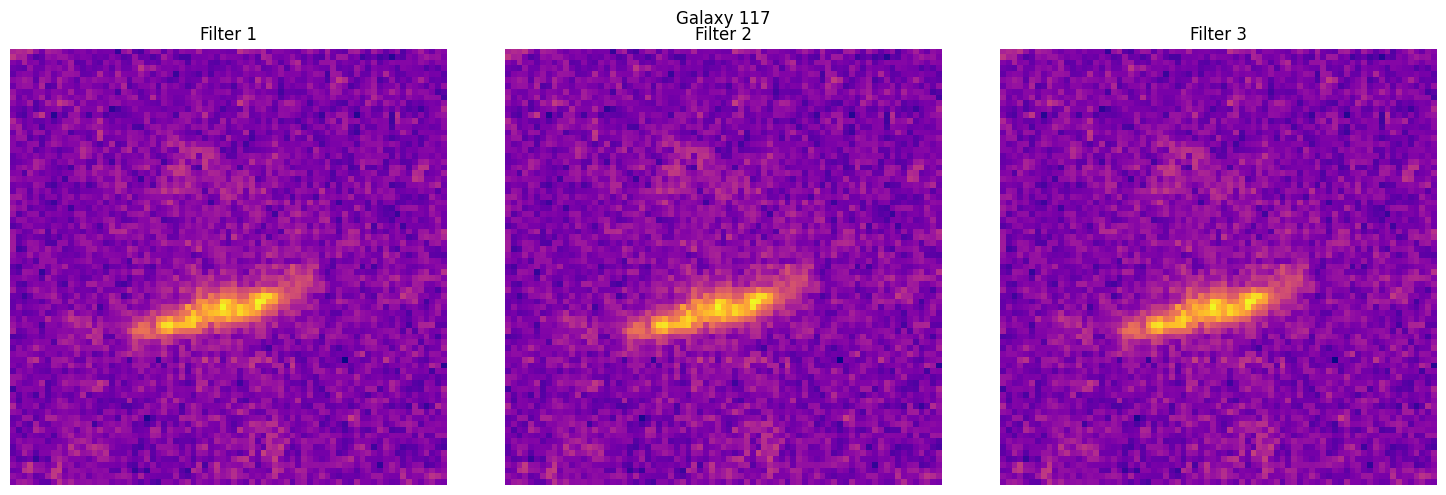

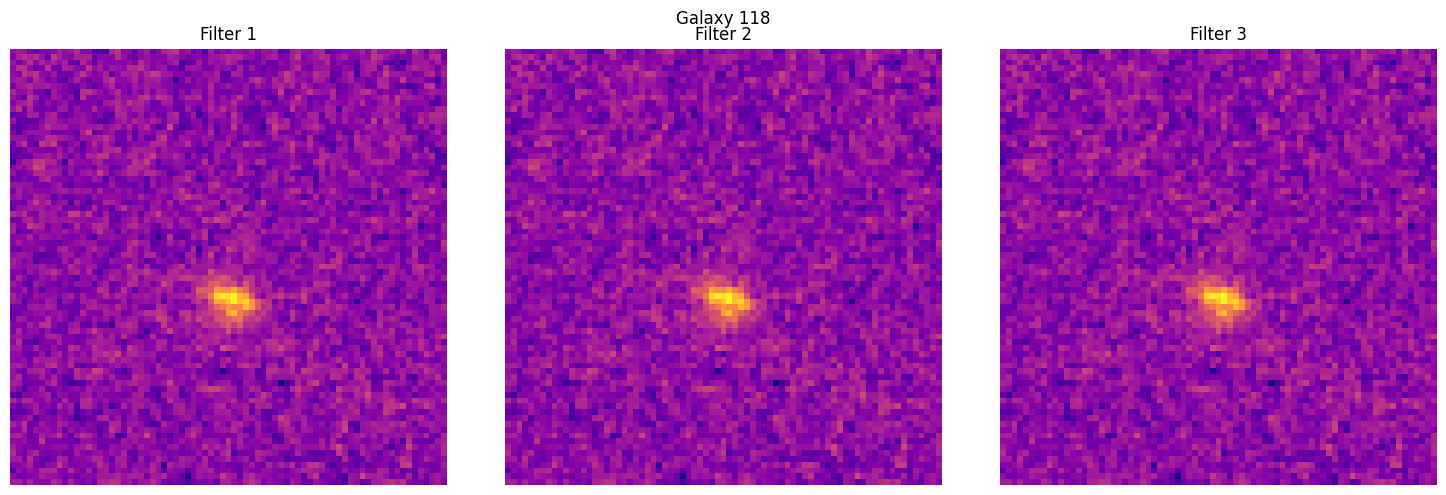

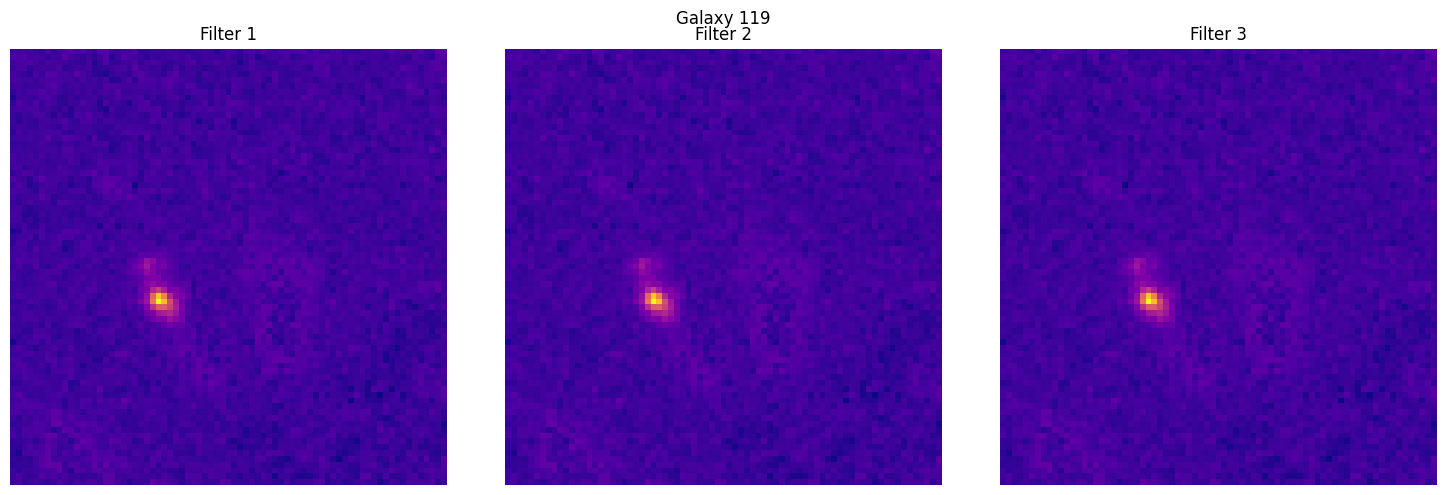

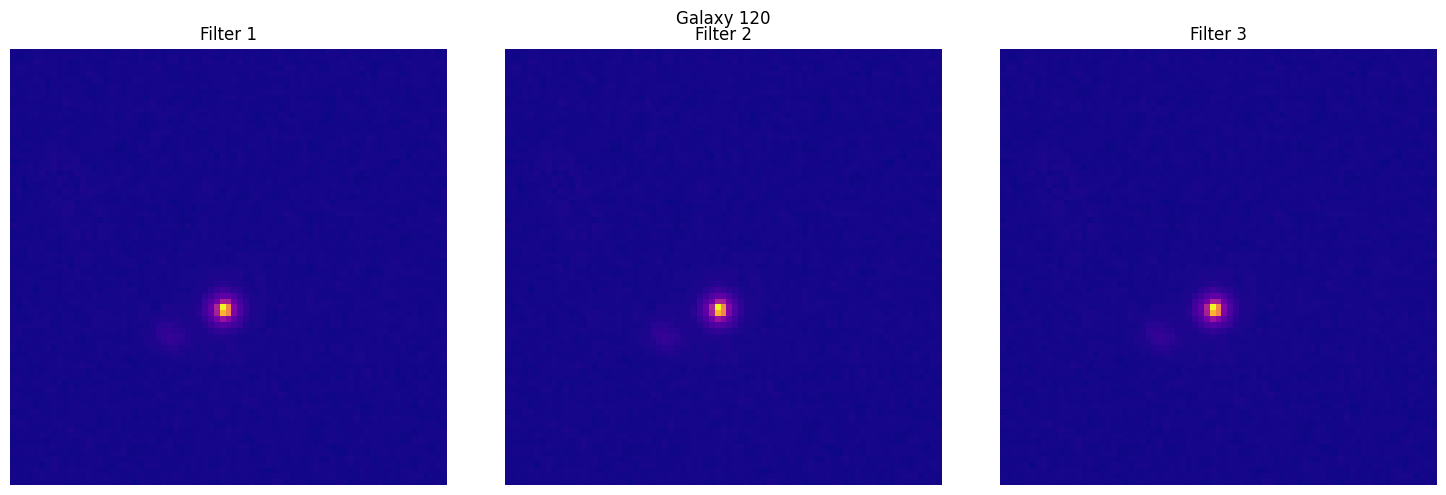

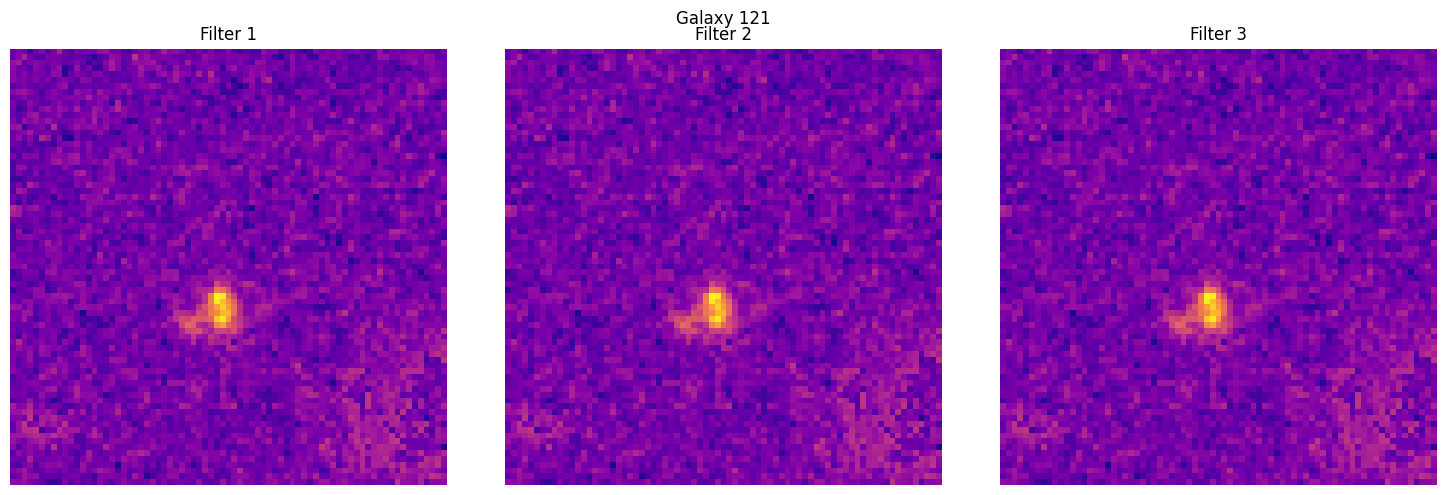

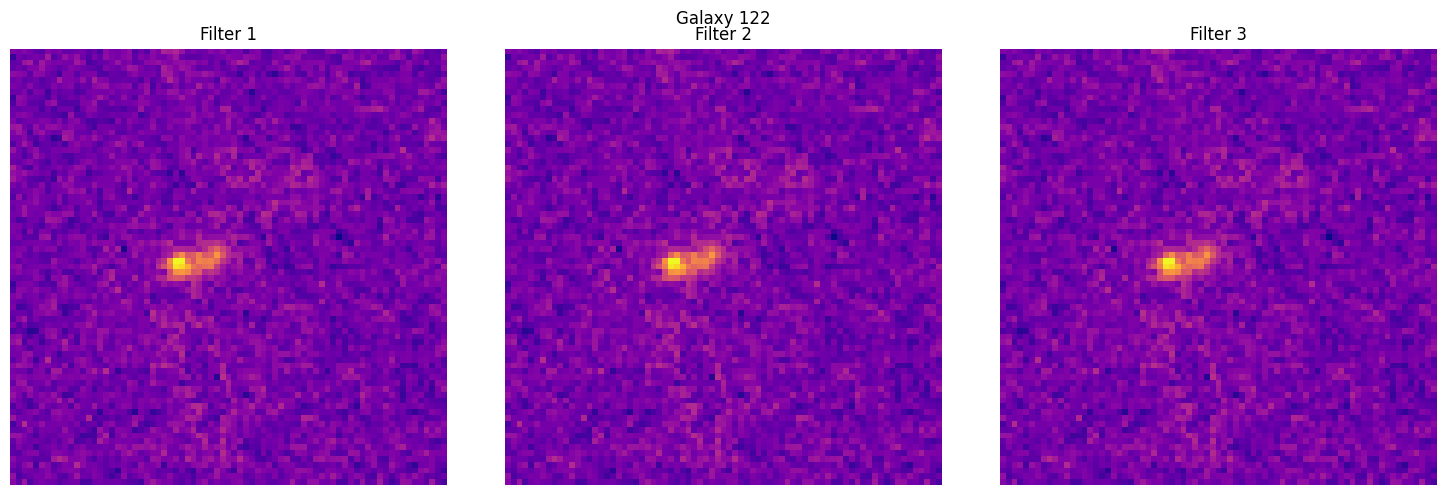

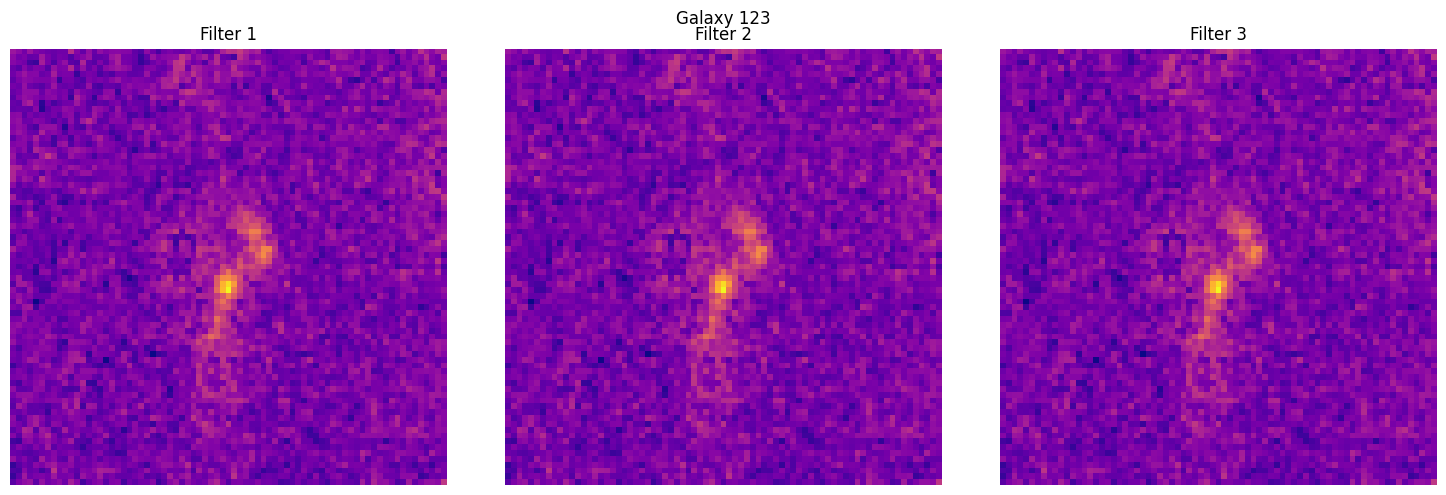

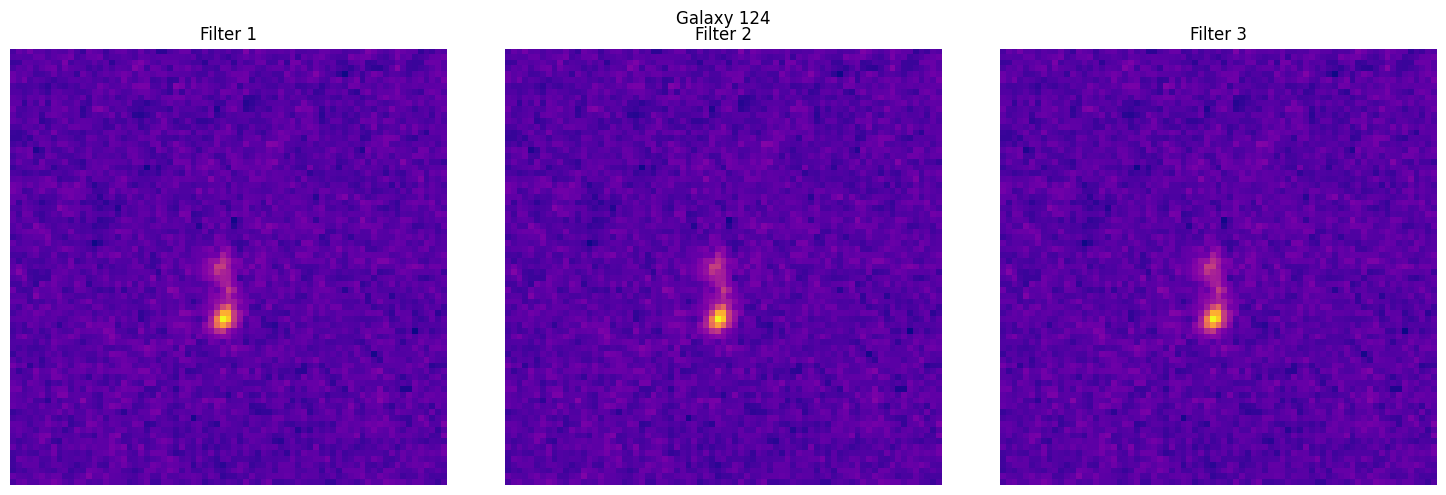

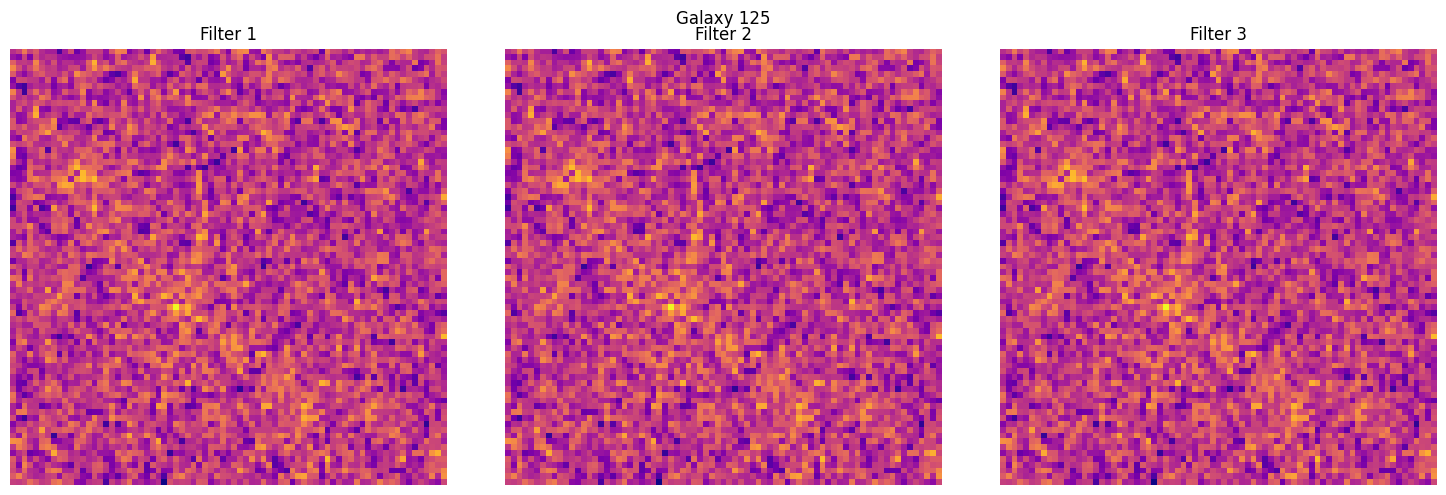

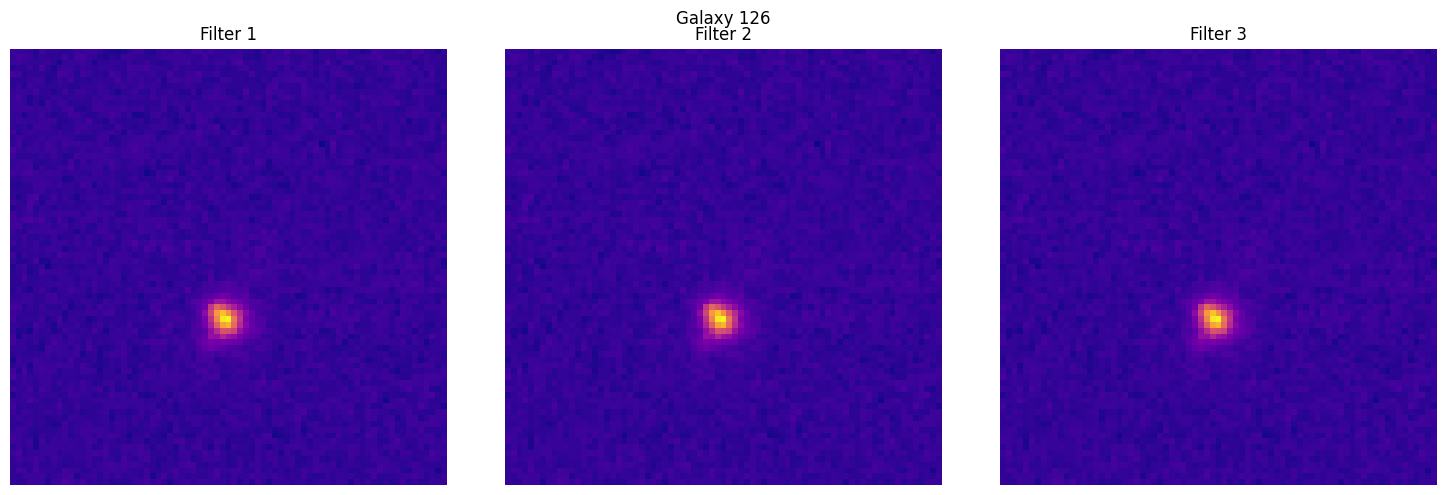

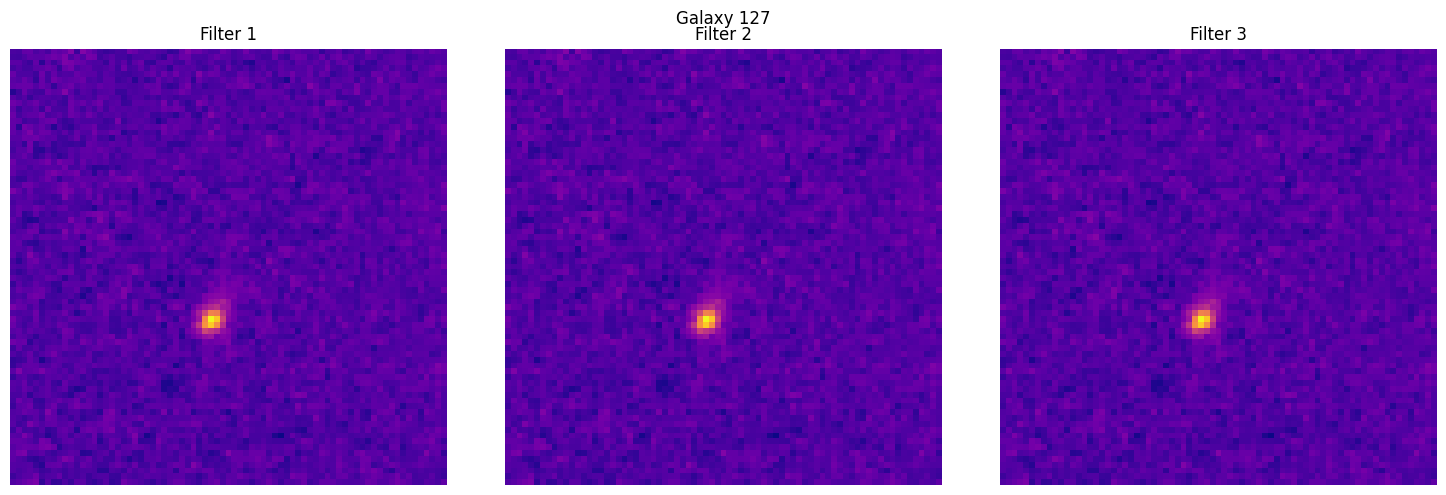

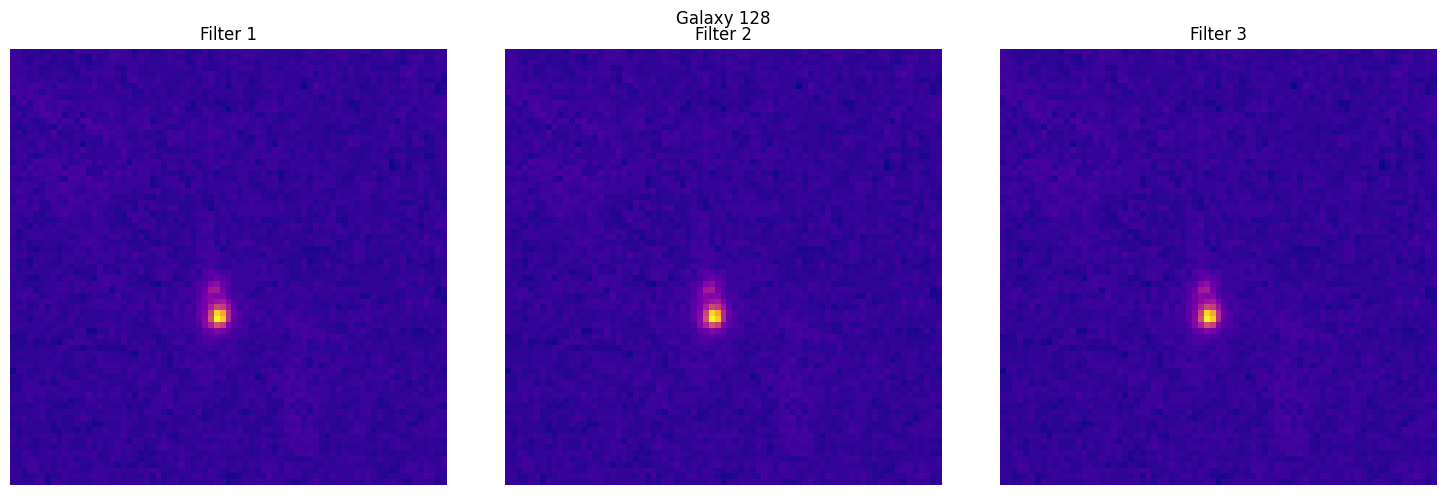

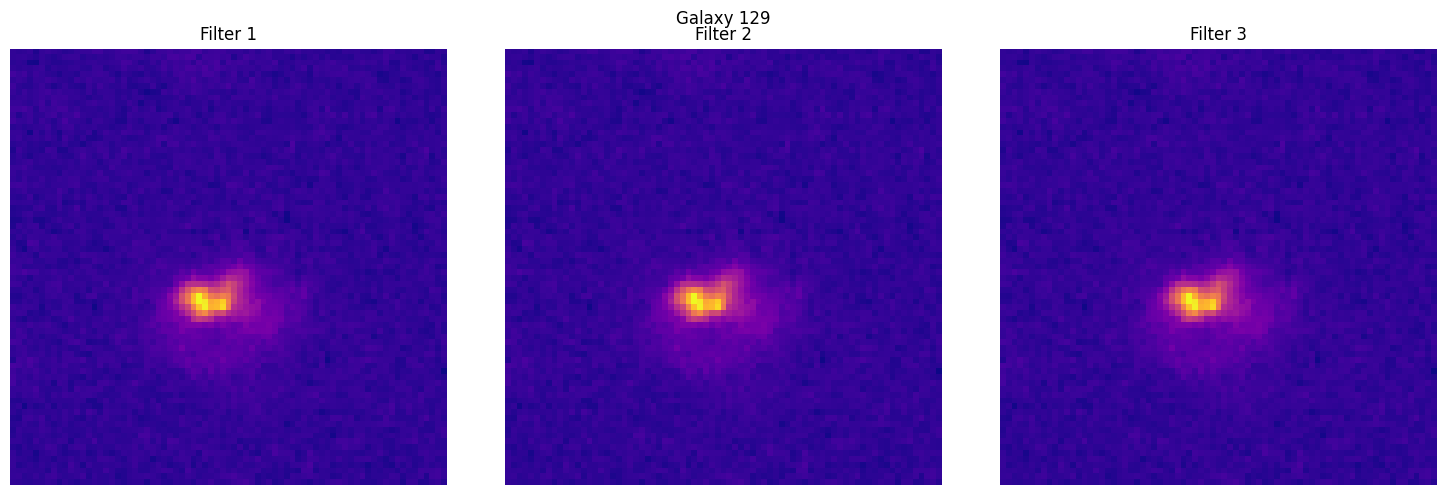

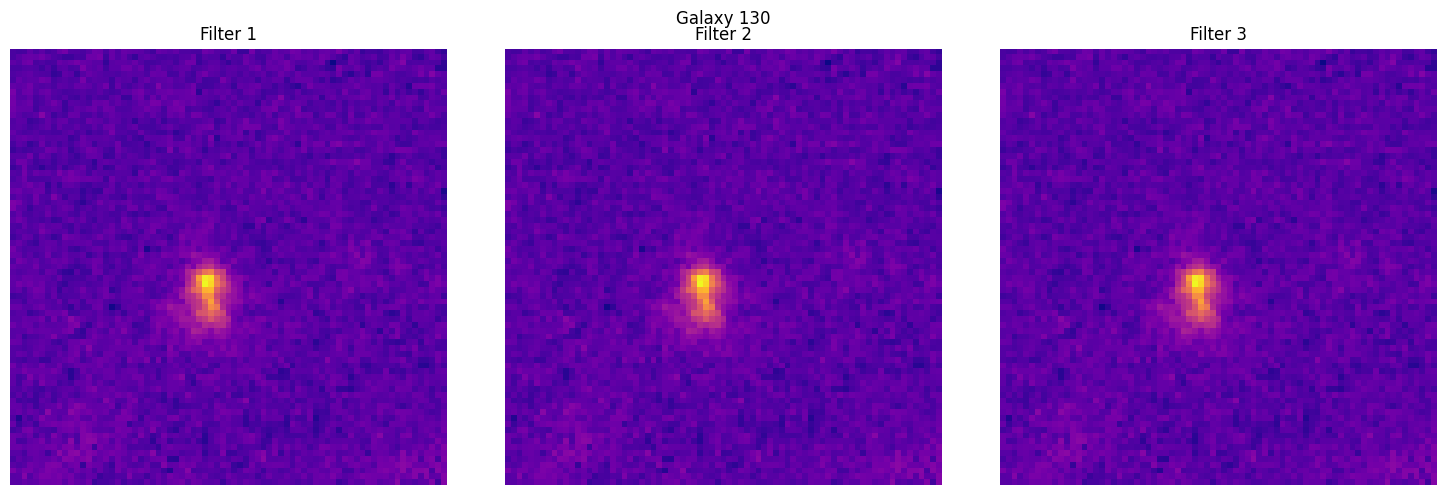

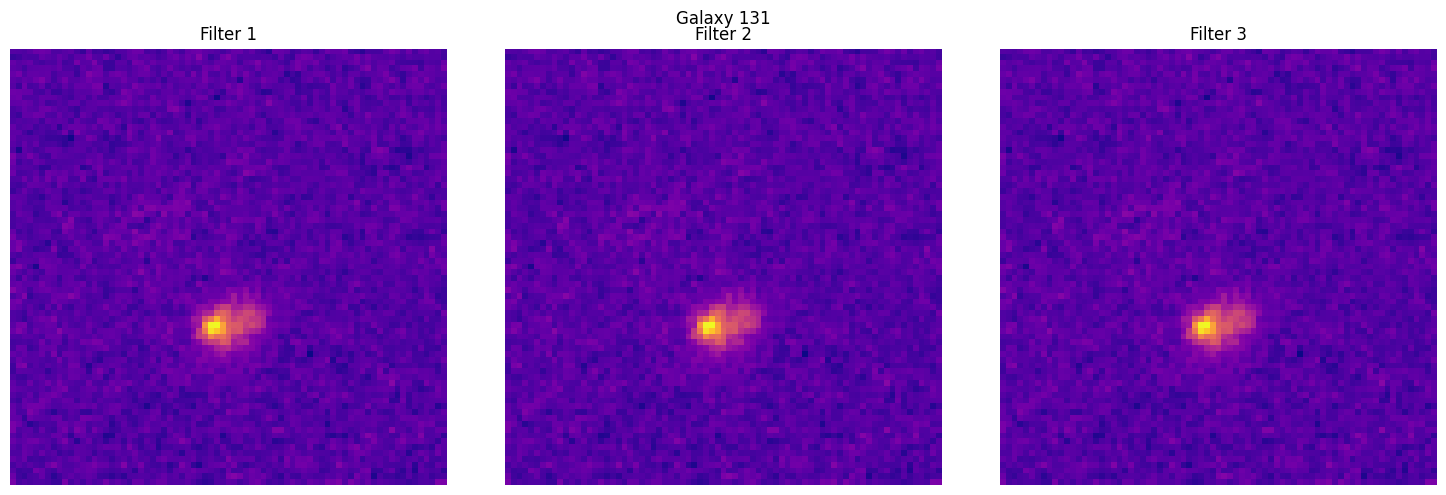

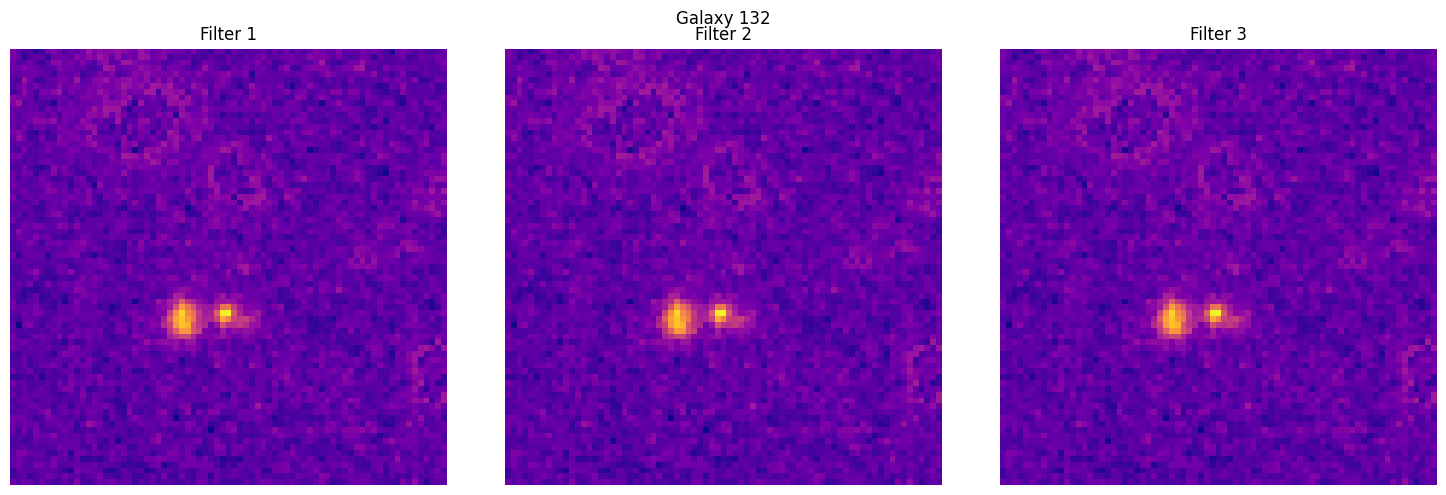

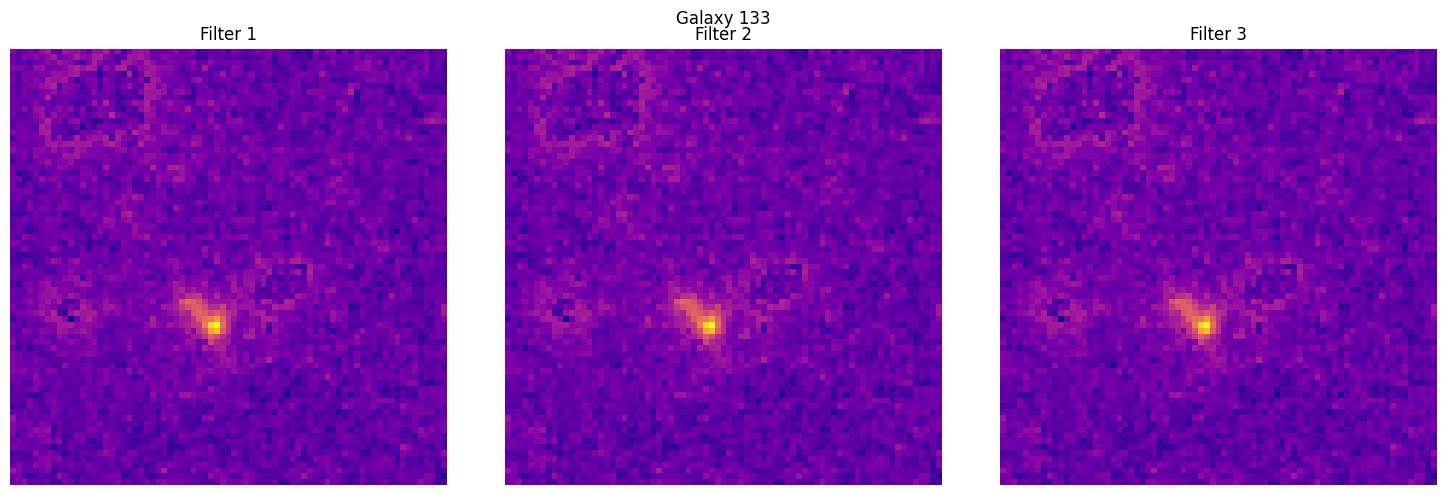

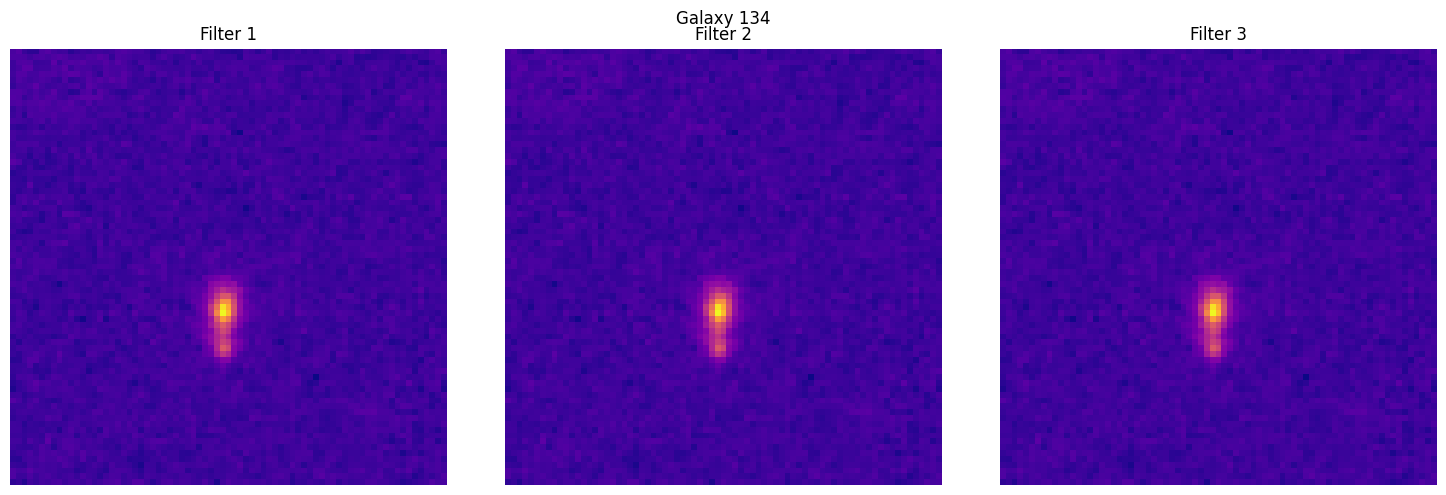

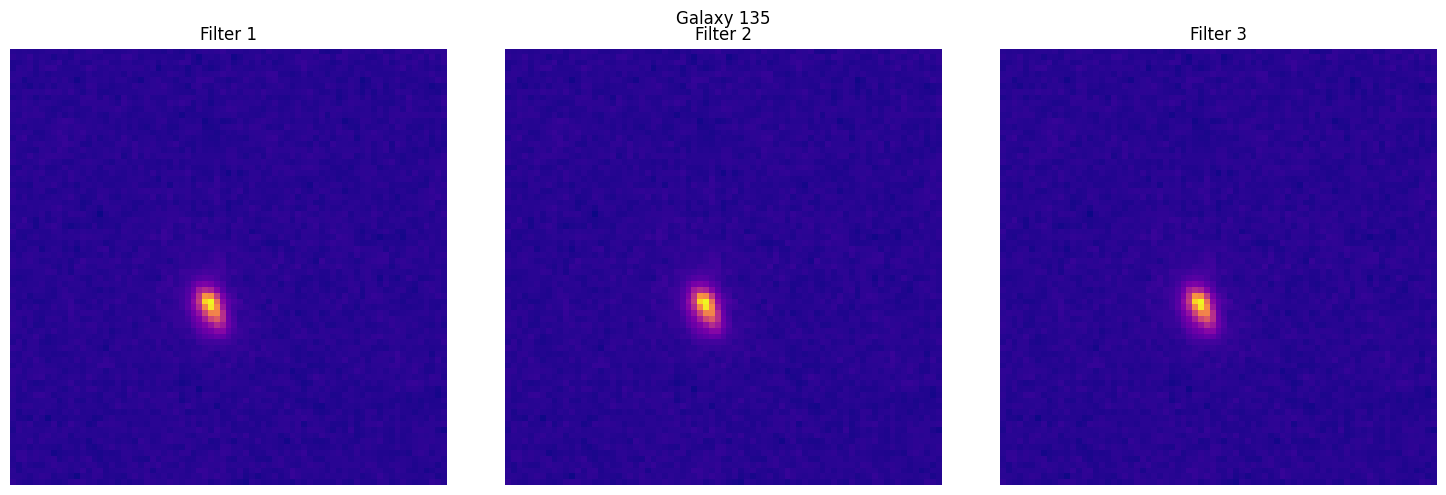

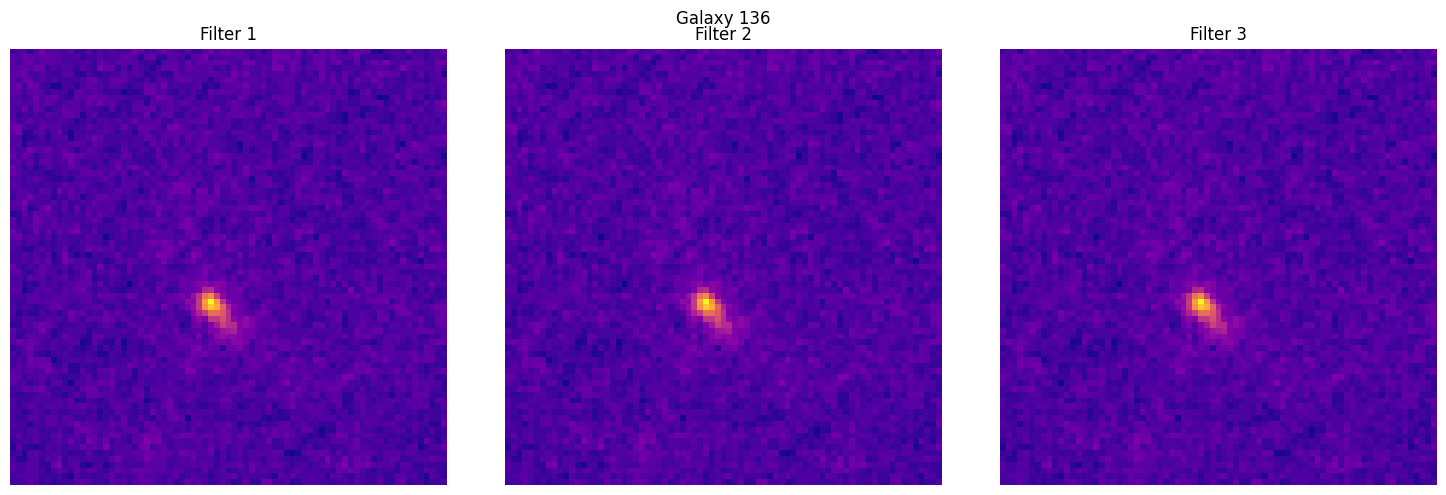

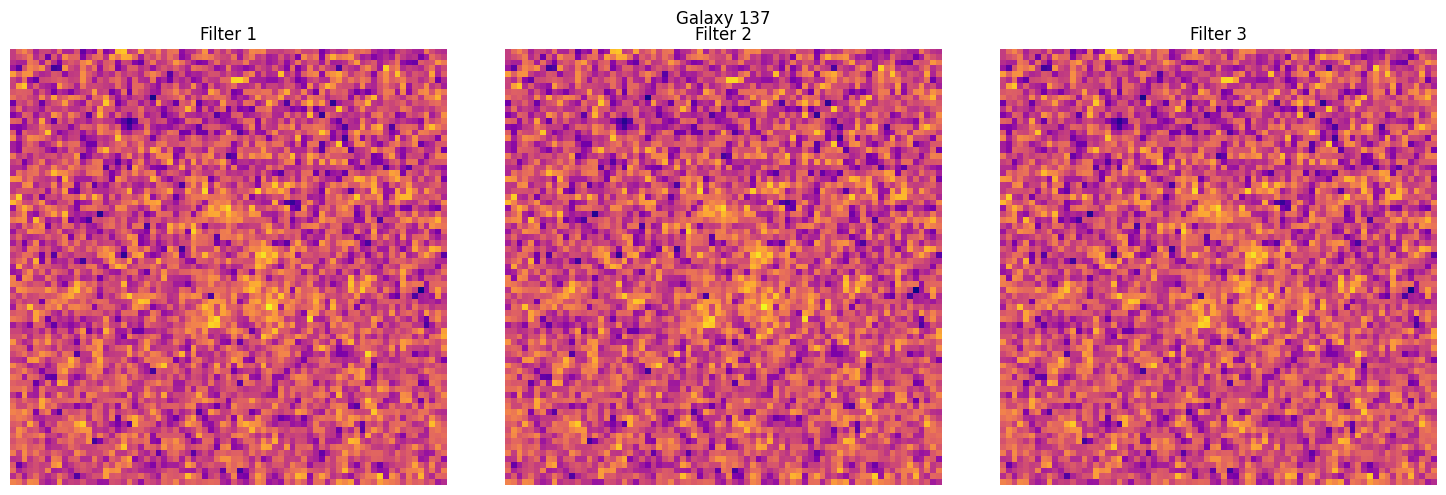

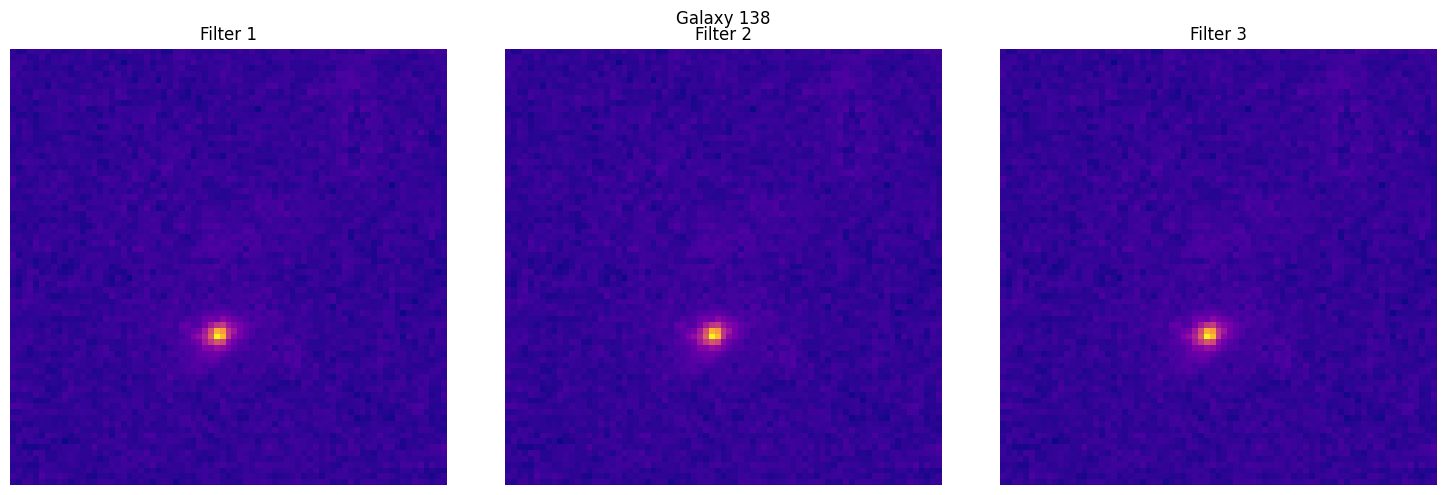

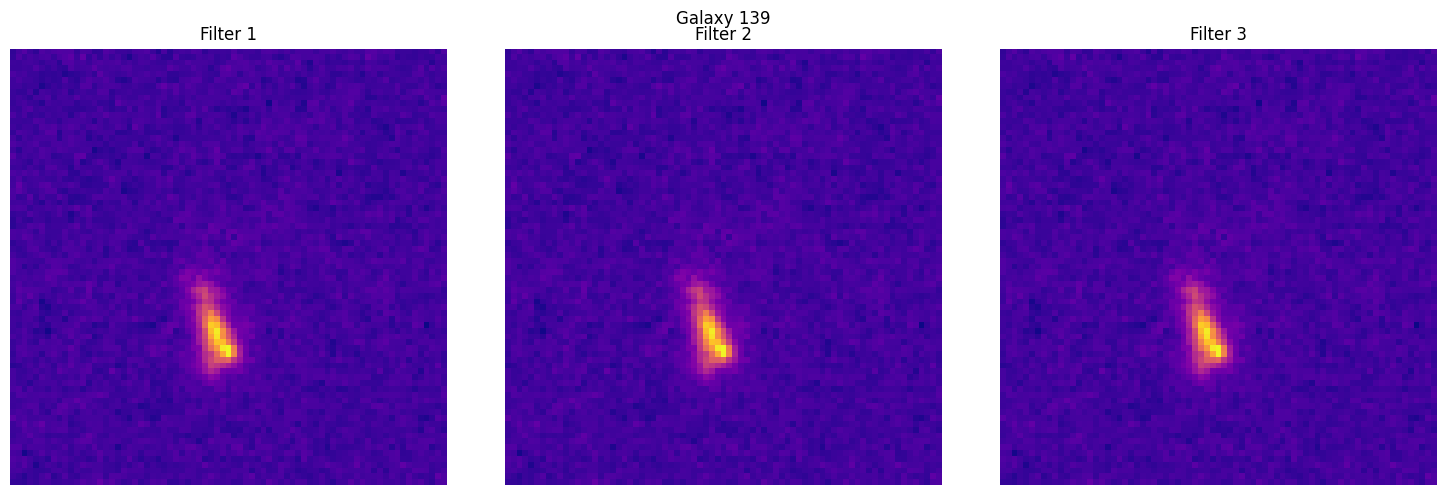

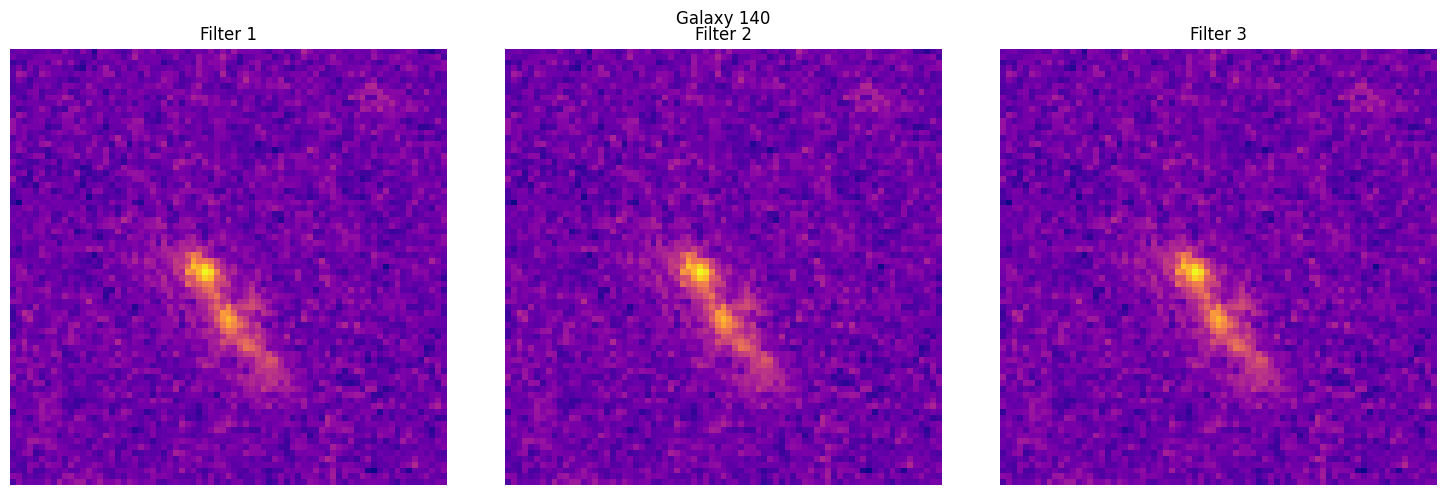

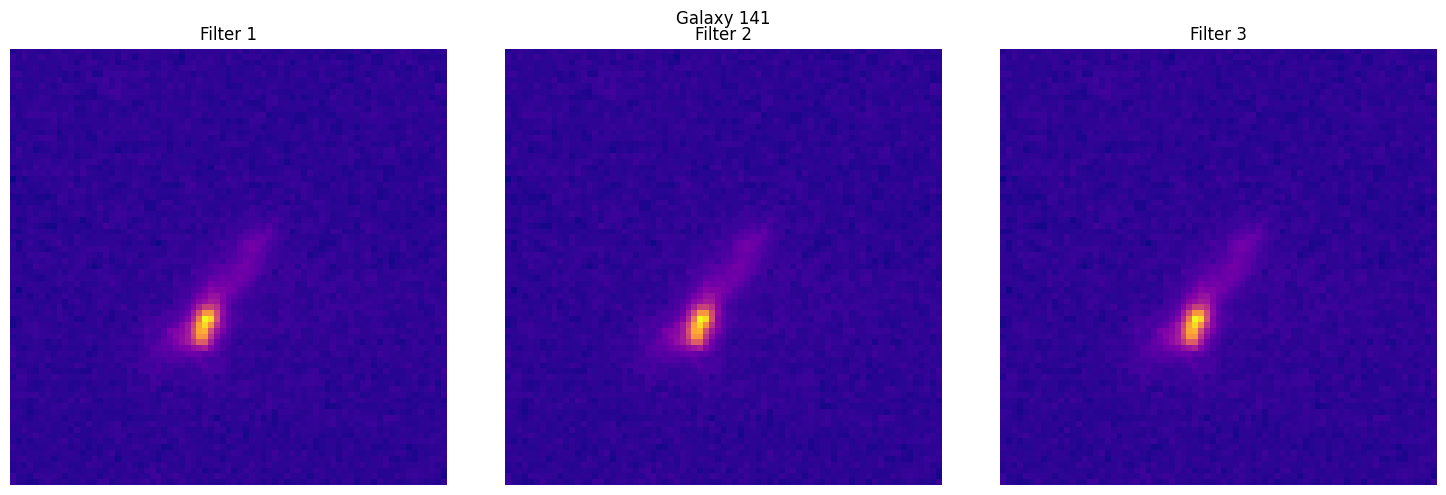

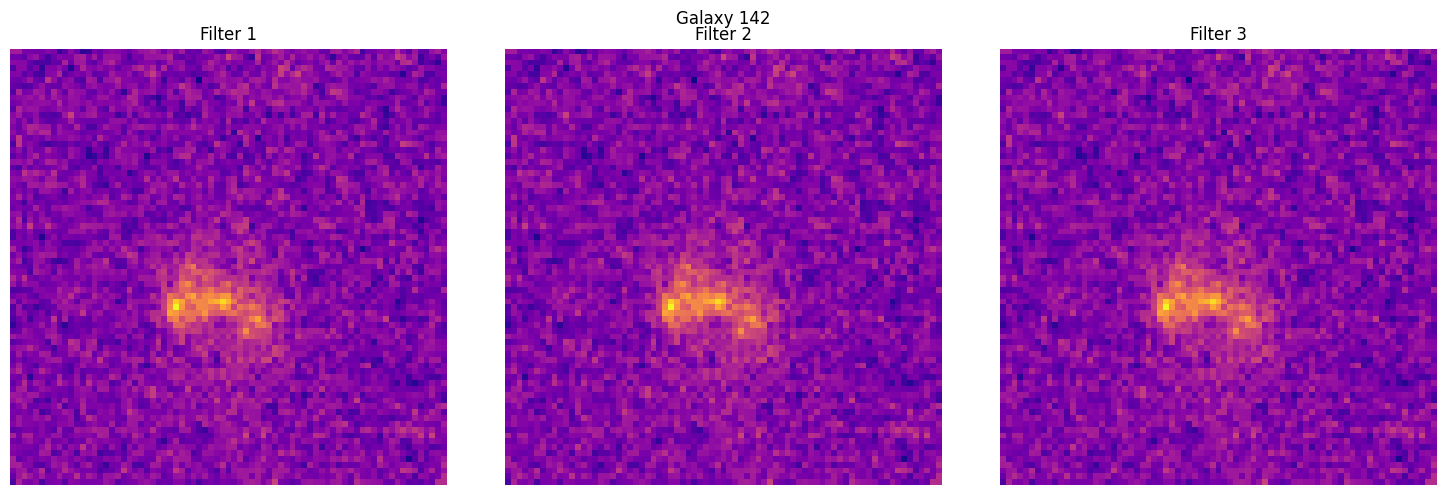

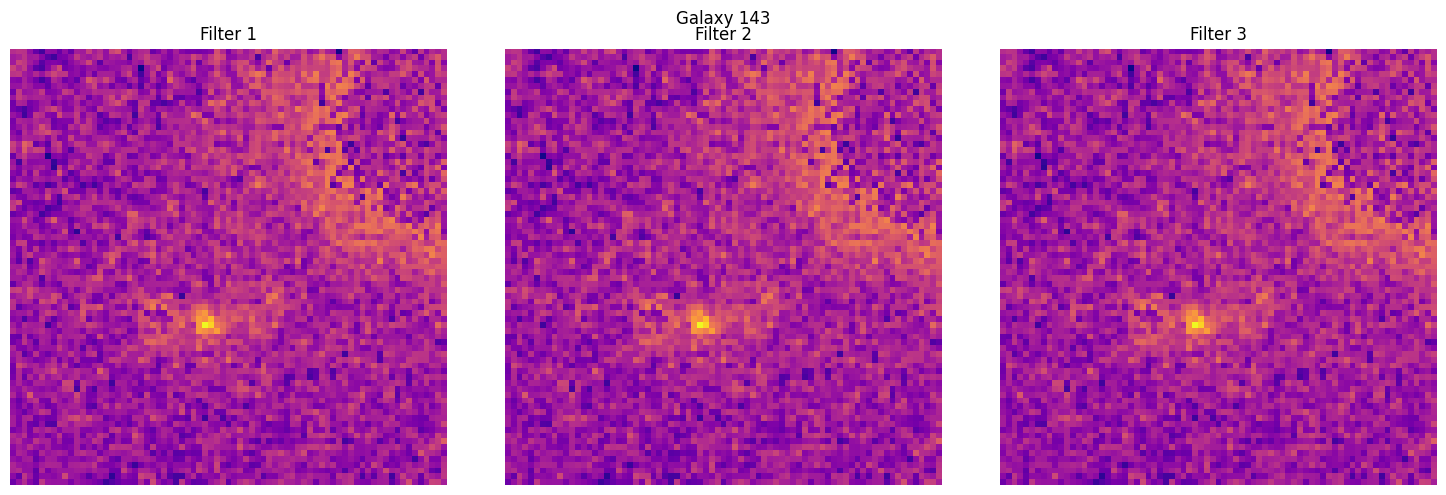

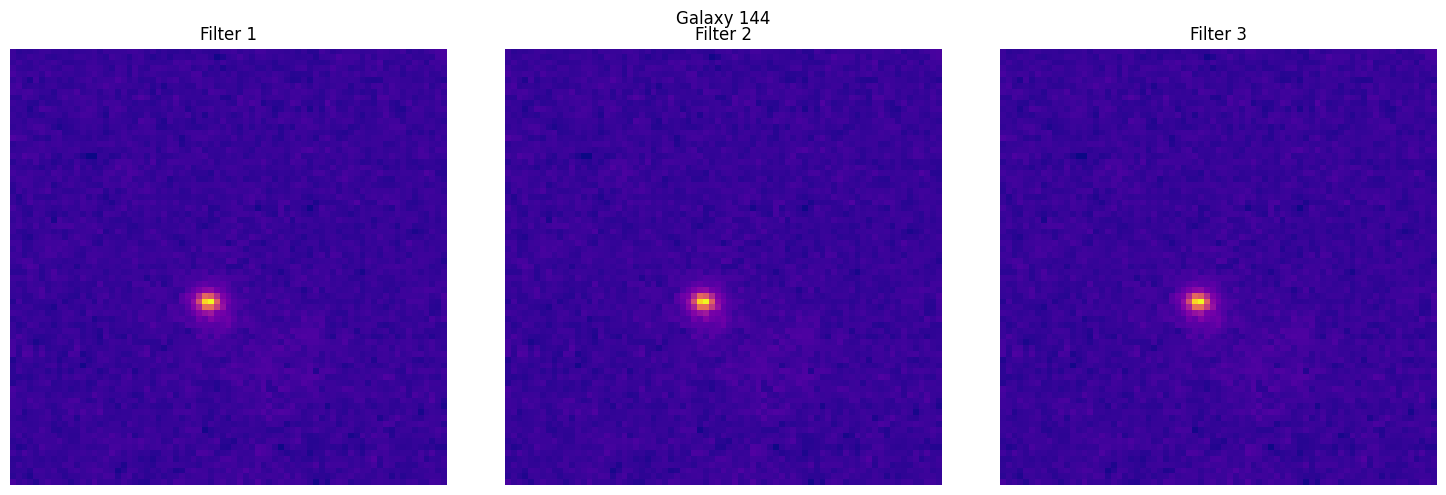

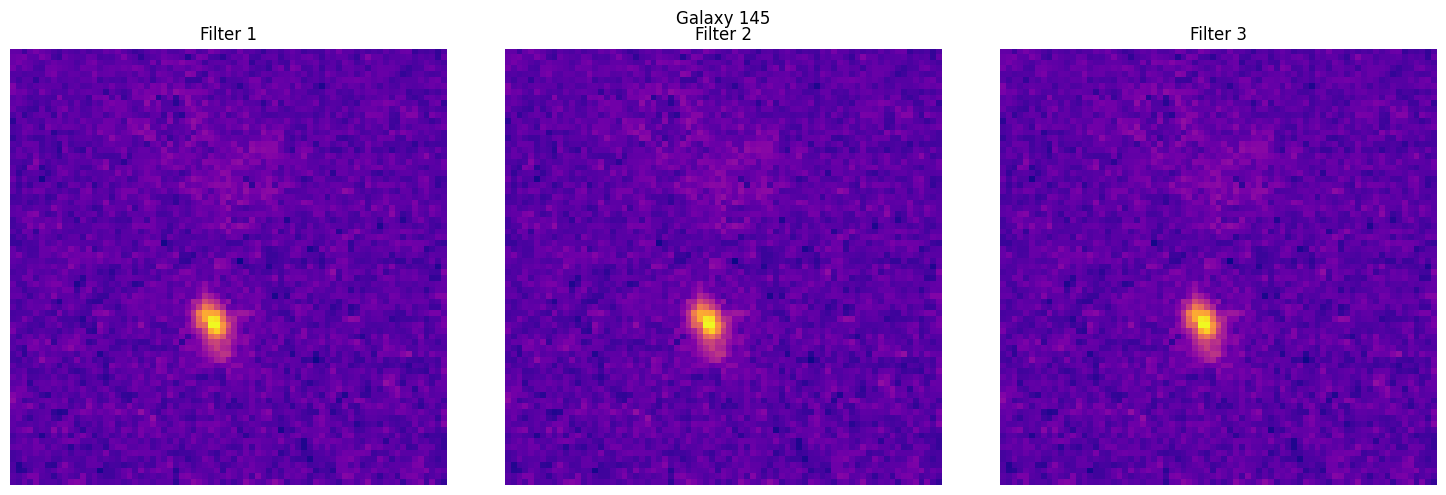

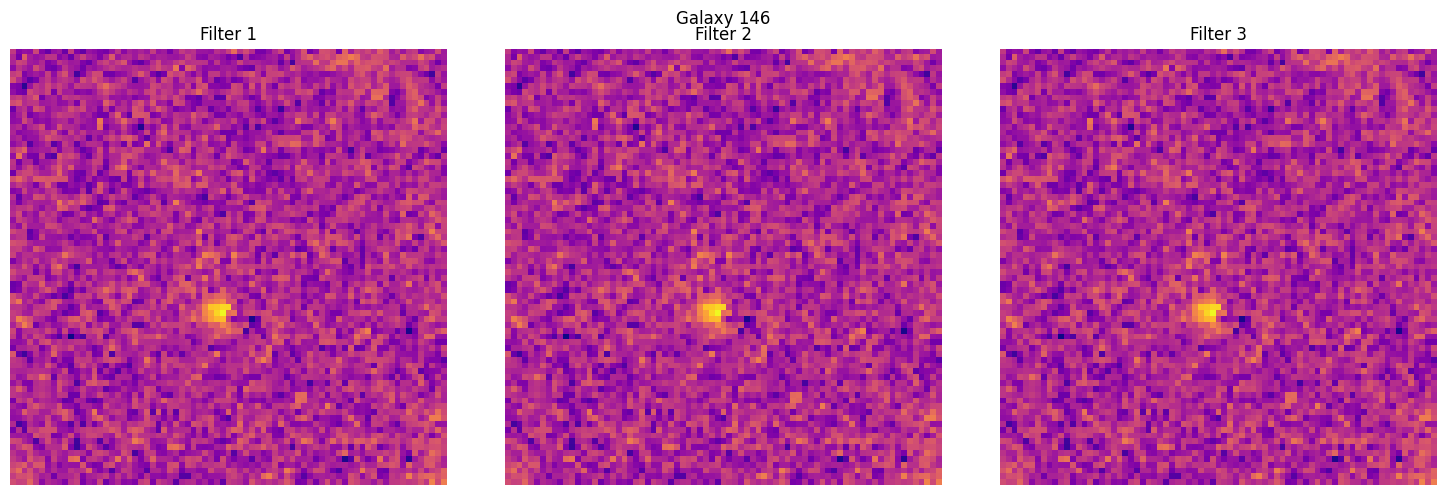

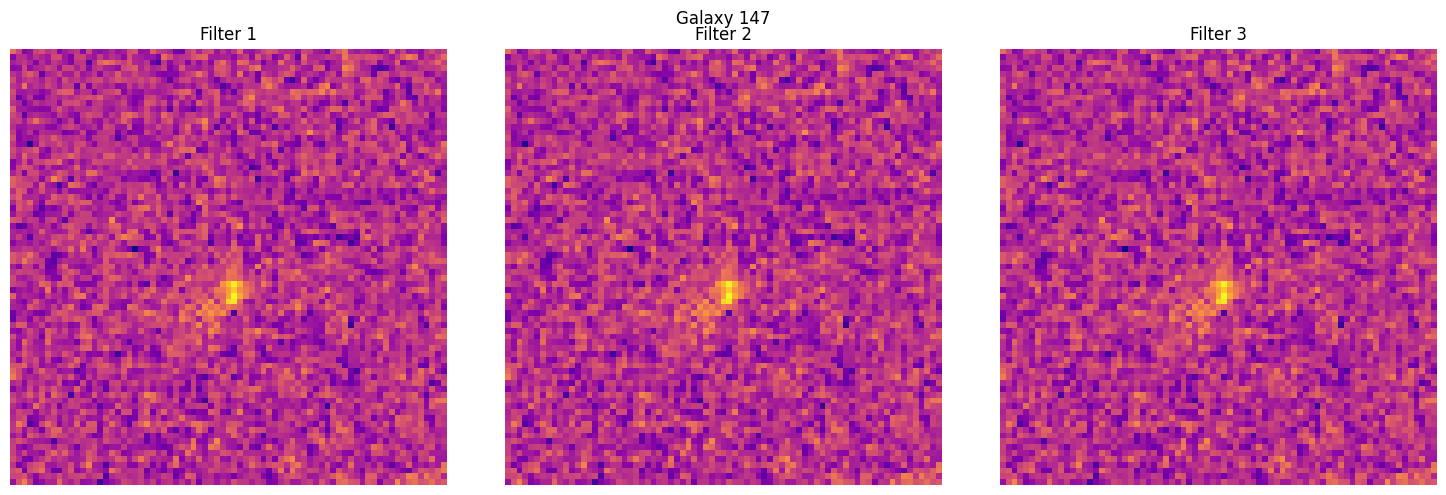

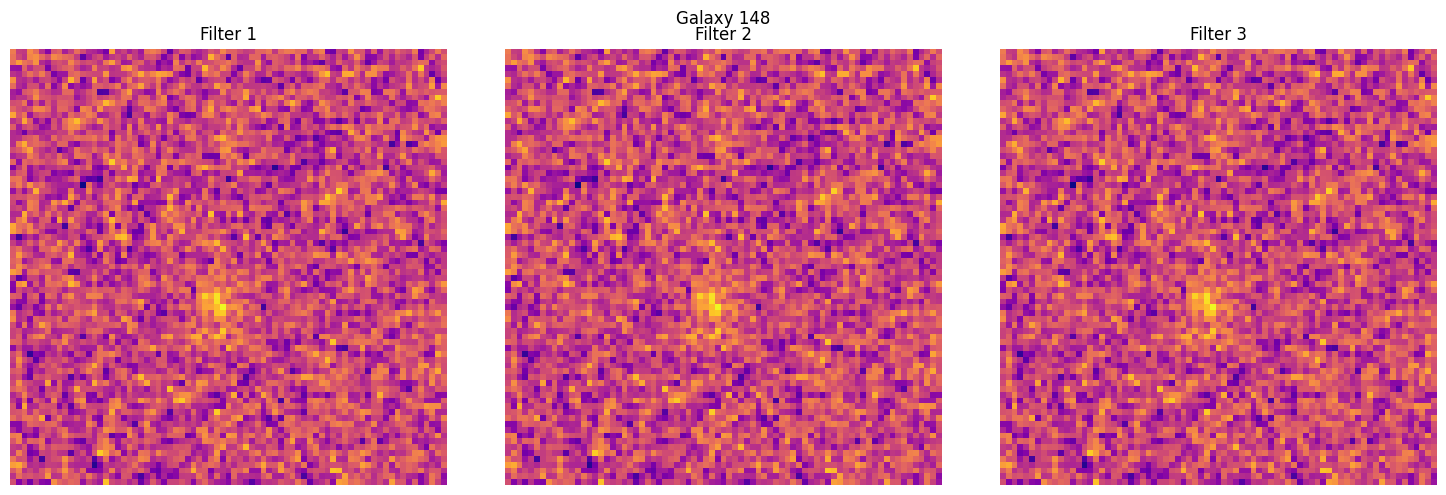

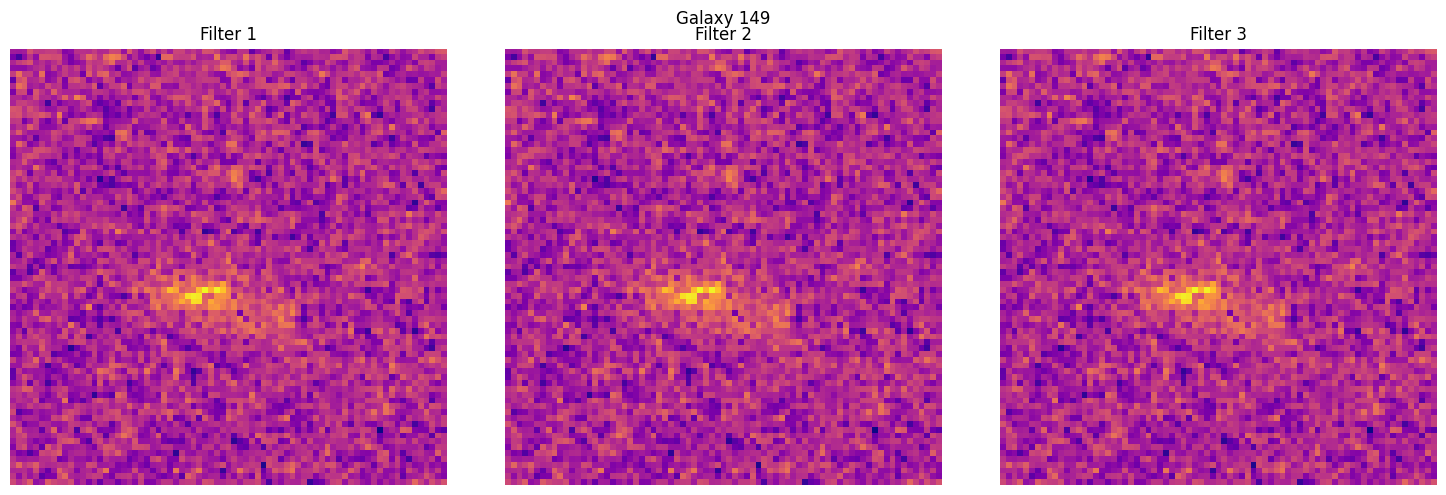

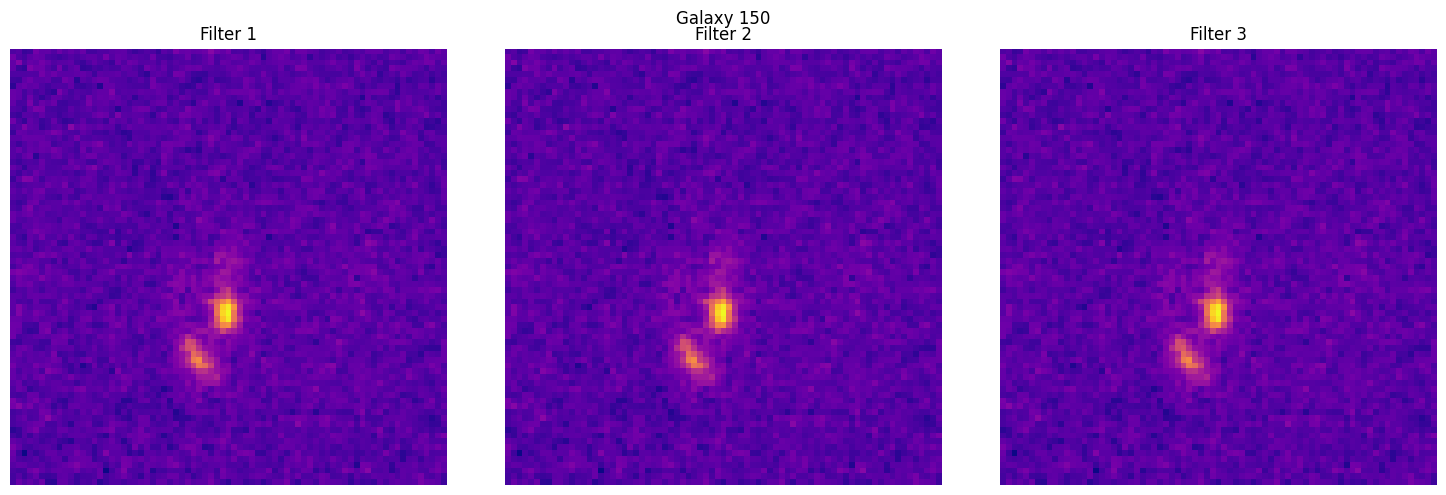

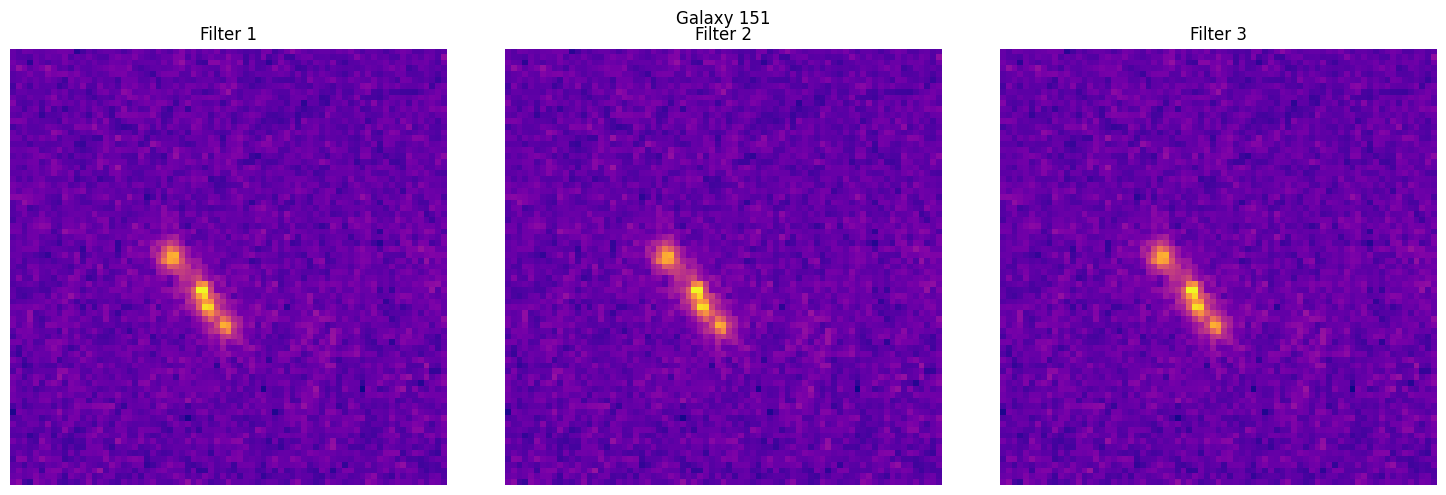

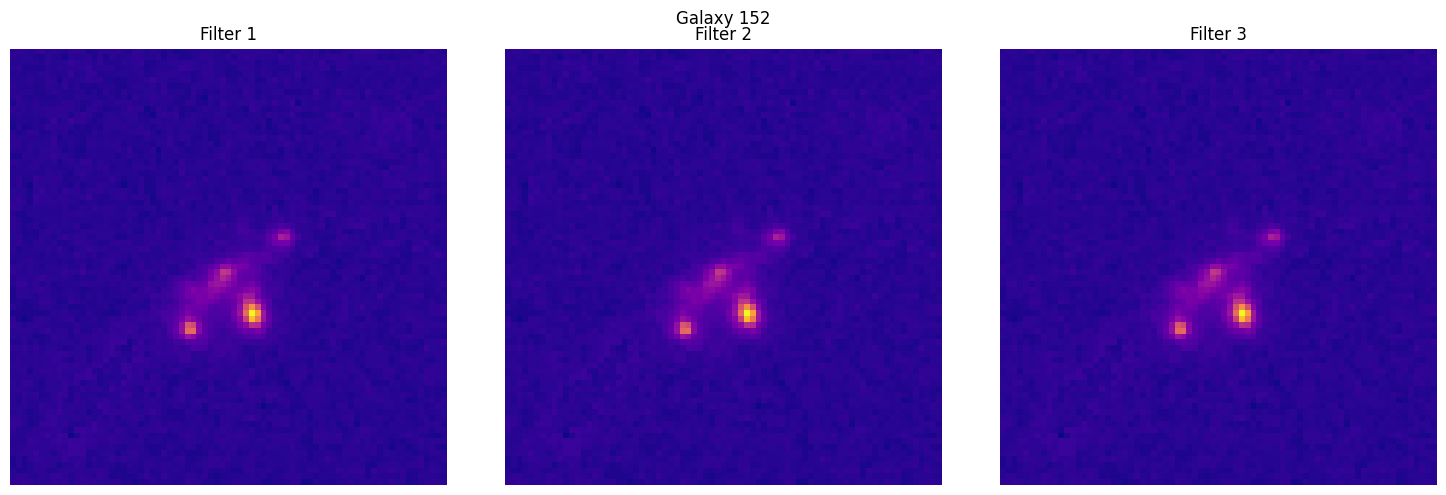

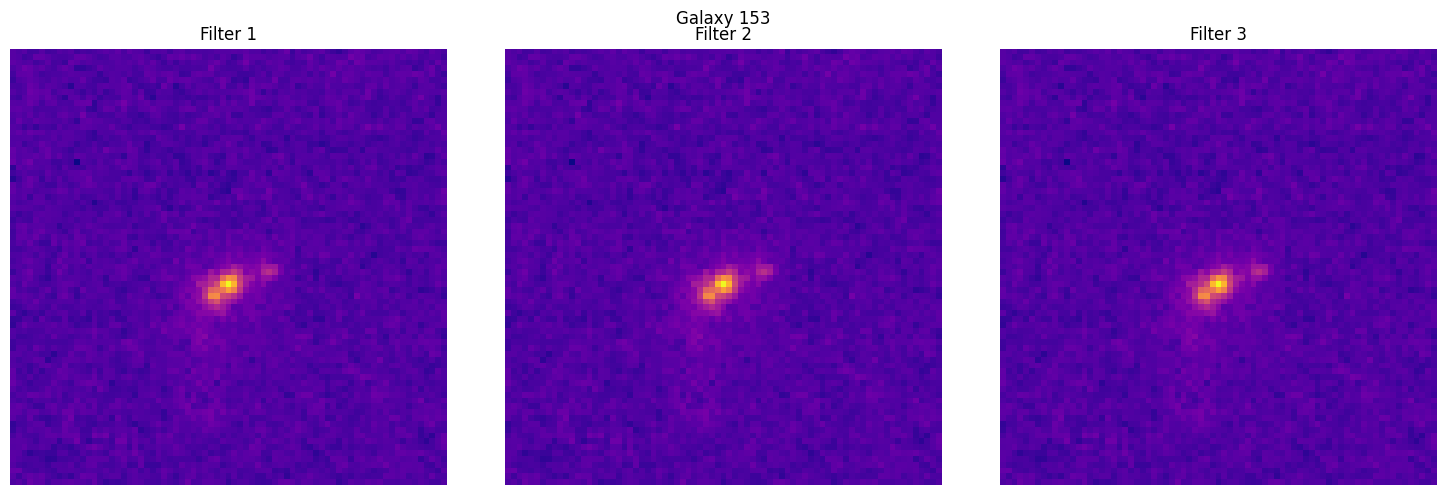

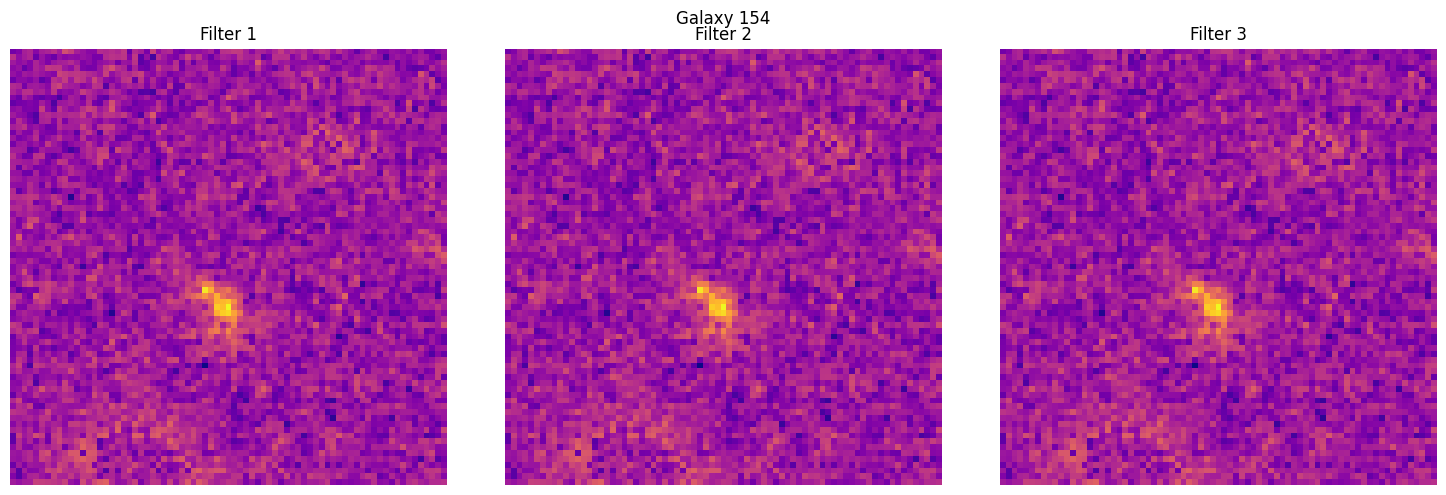

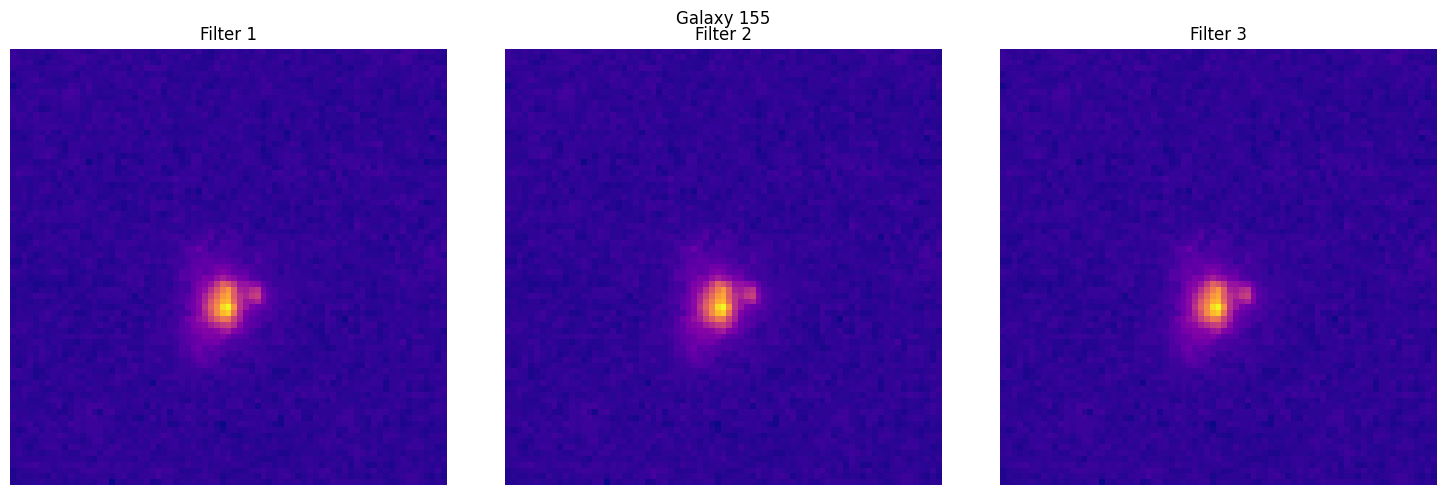

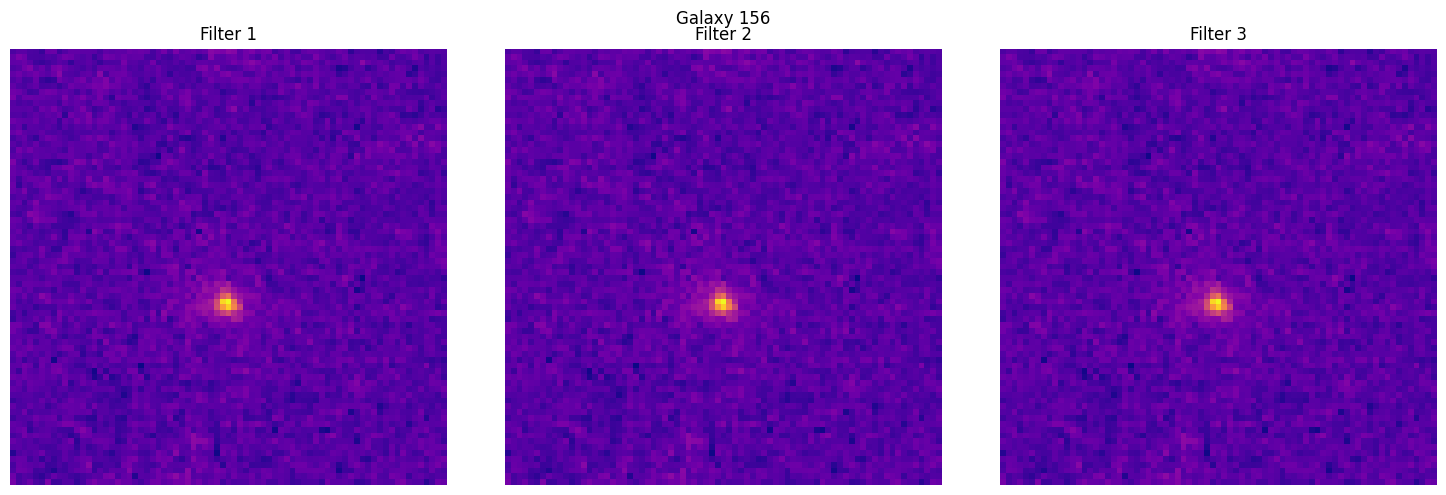

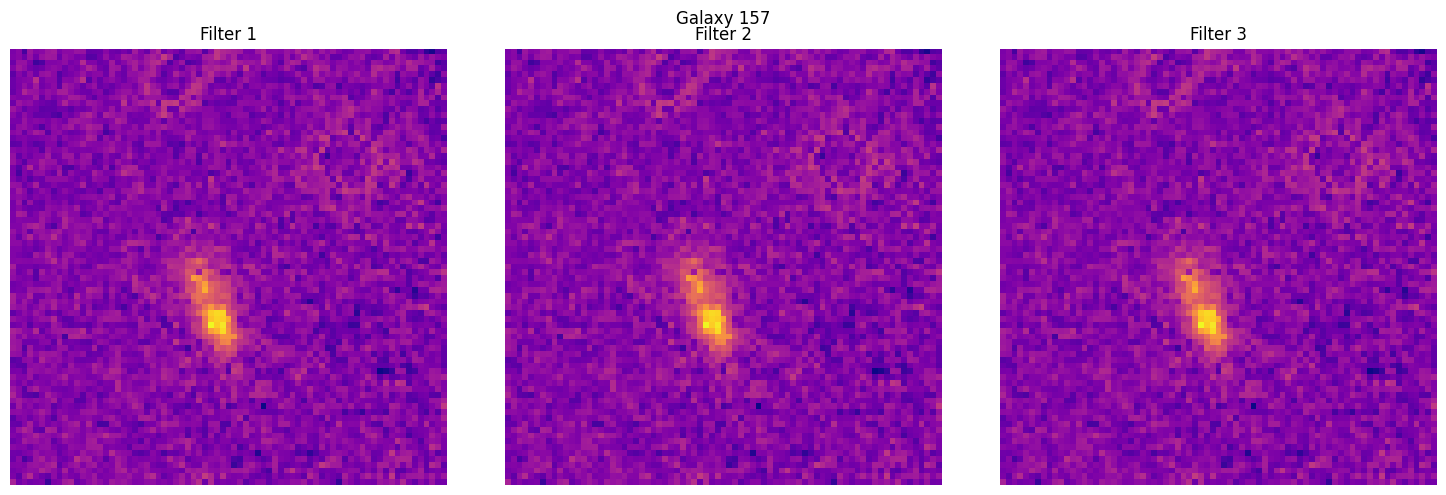

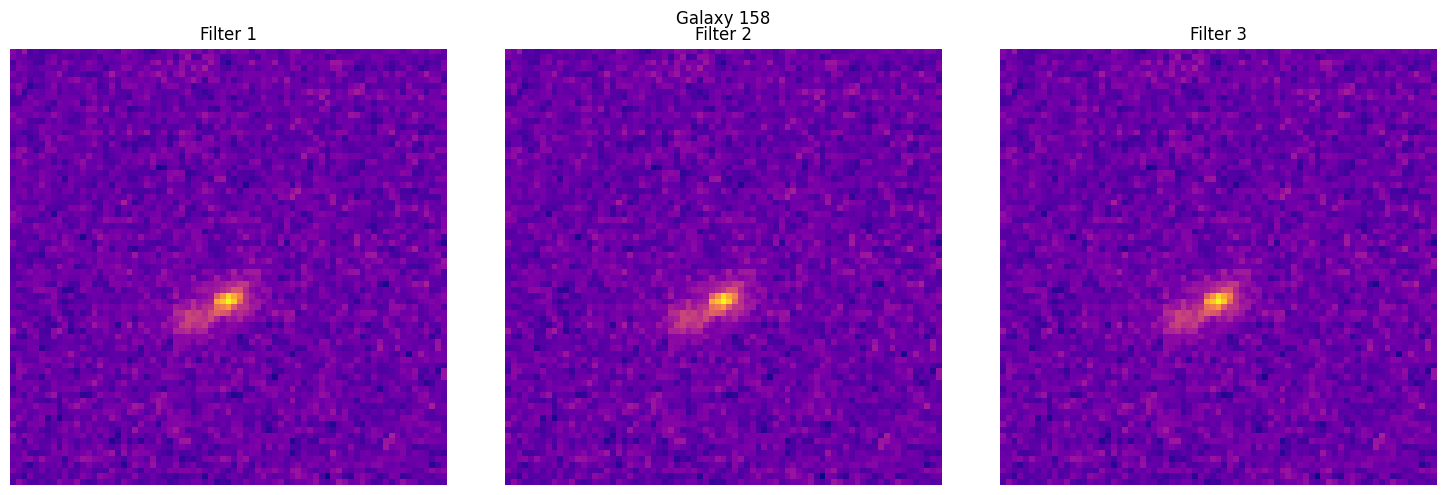

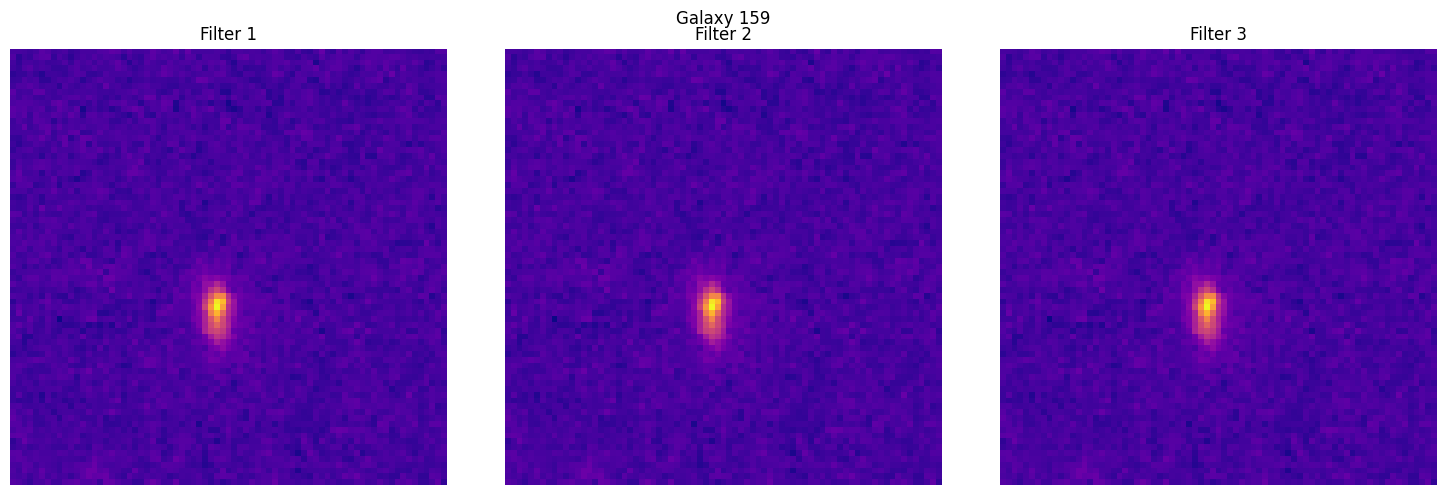

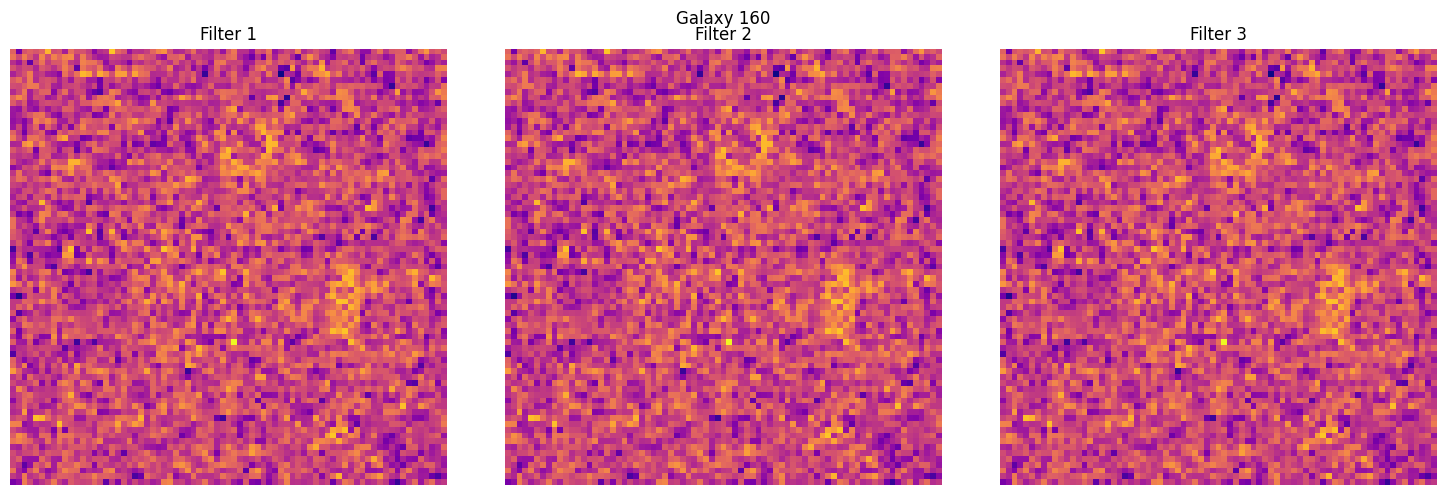

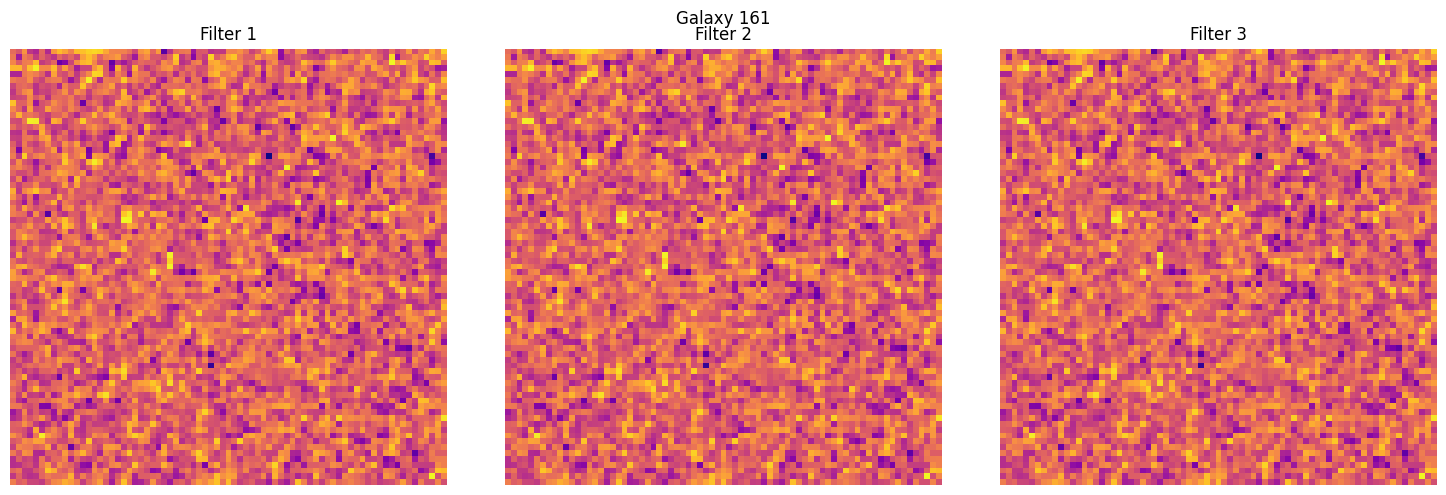

In [14]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the FITS file
file_path = "/home/juliantearney/Downloads/combined_cutouts.fits"
with fits.open(file_path) as hdul:
    data = hdul[0].data  # The 4D array: [num_galaxies, num_filters, height, width]

num_galaxies = data.shape[0]  # Number of galaxies
num_filters = data.shape[1]    # Number of filters (3 in your case)

# Loop through each galaxy
for galaxy_idx in range(num_galaxies):
    galaxy_data = data[galaxy_idx]  # 3D array for the current galaxy
    
    # Create a subplot for each filter image of the galaxy
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 5))
    fig.suptitle(f'Galaxy {galaxy_idx + 1}')
    for filter_idx in range(num_filters):
        axs[filter_idx].imshow(galaxy_data[filter_idx, :, :], cmap='plasma', origin='lower')
        axs[filter_idx].set_title(f'Filter {filter_idx + 1}')
        axs[filter_idx].axis('off')

    plt.tight_layout()
    plt.show()

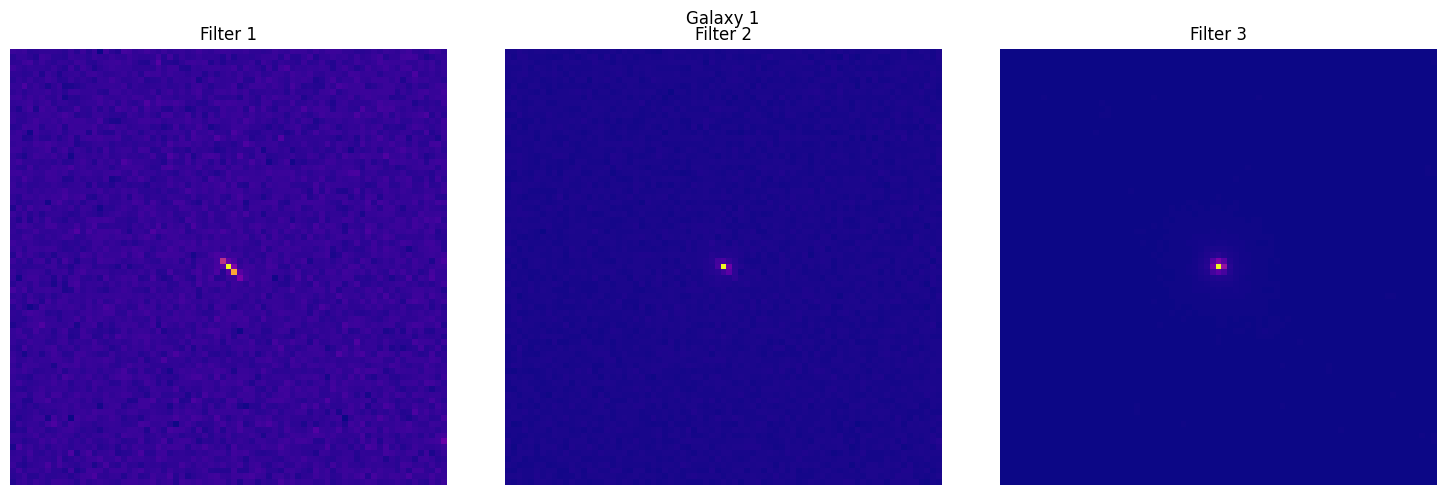

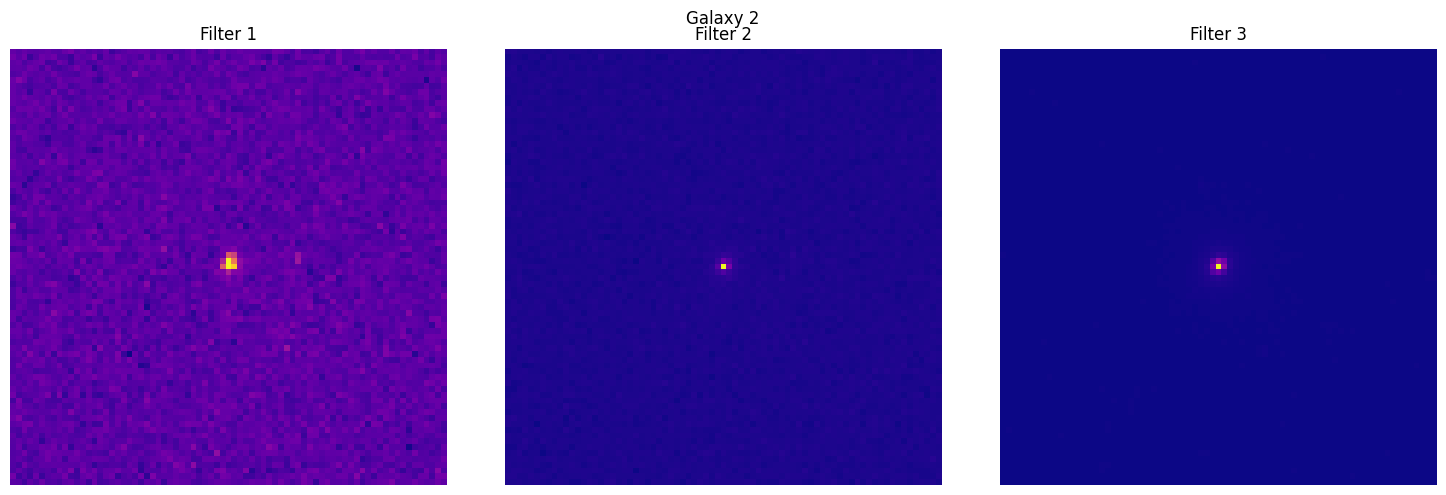

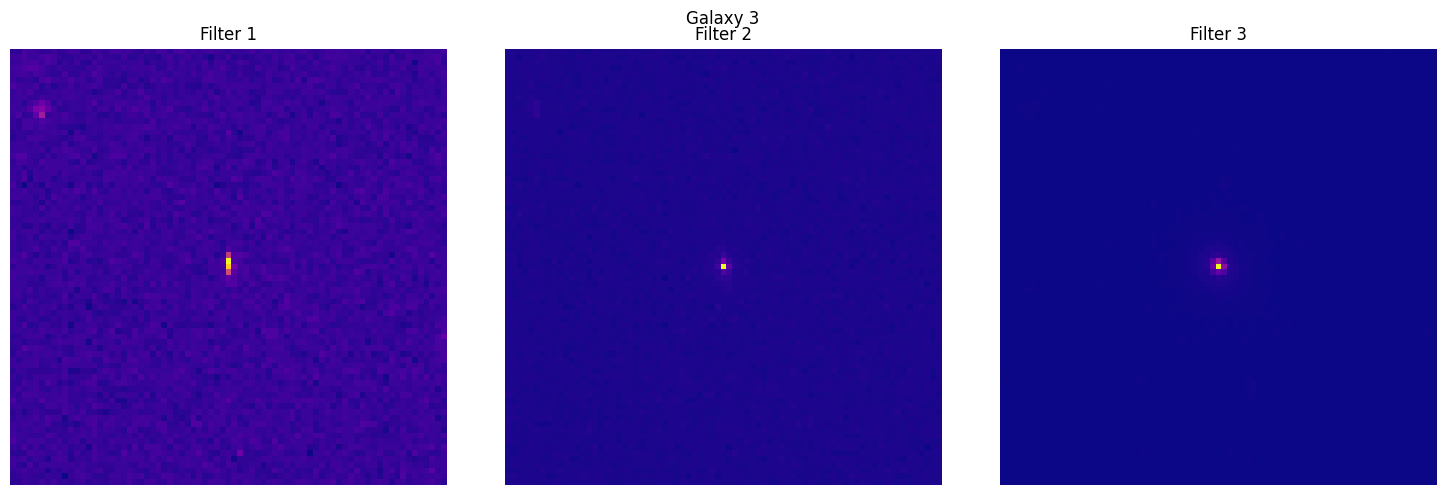

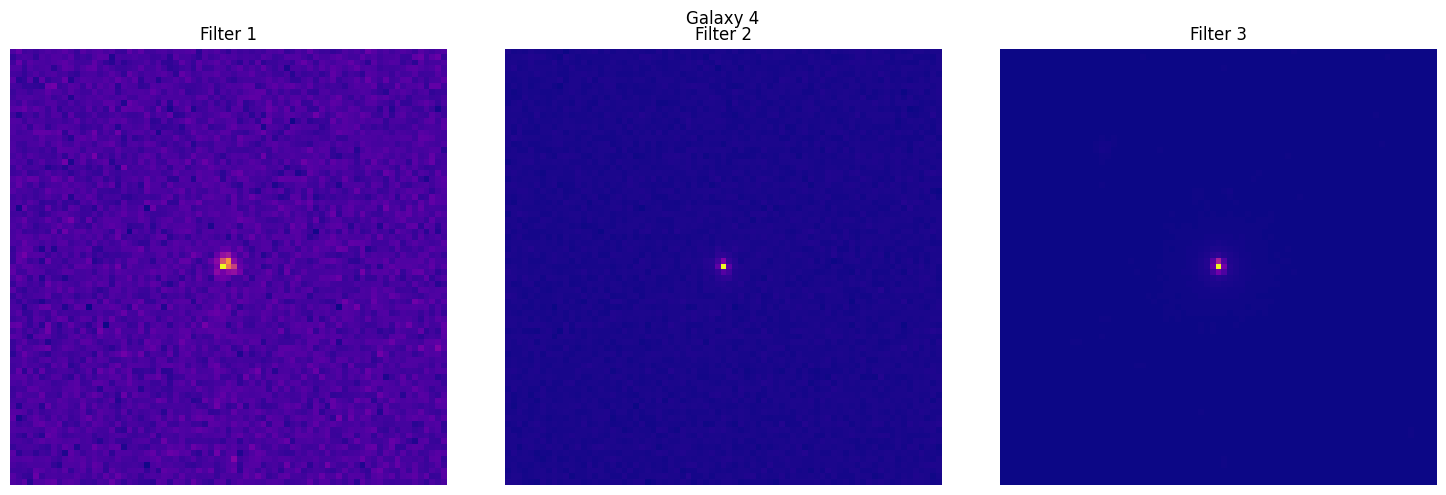

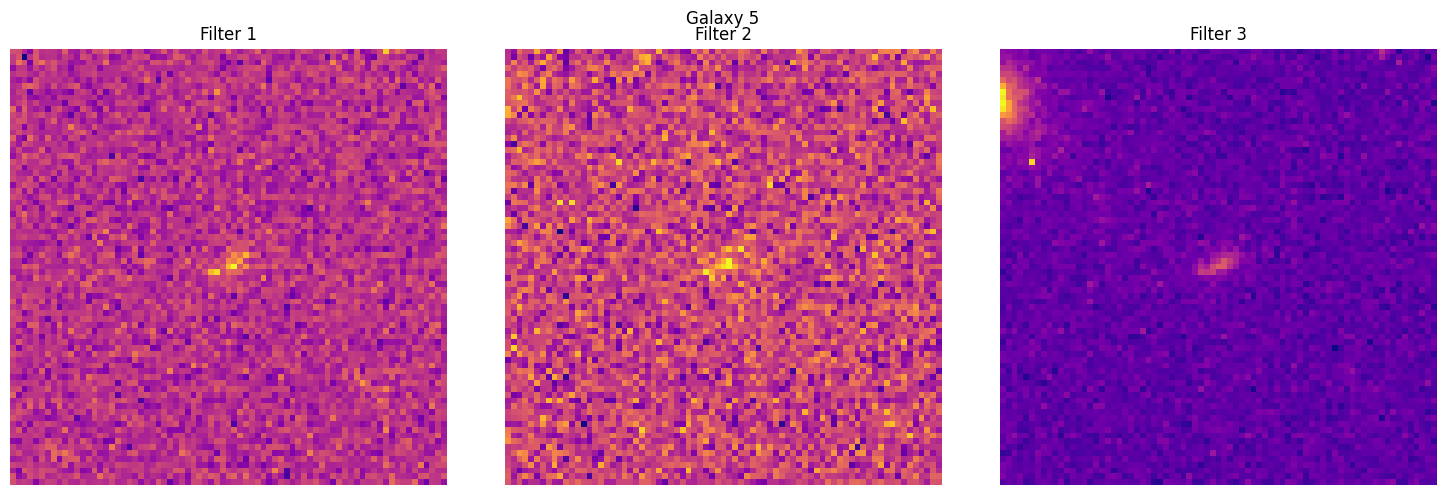

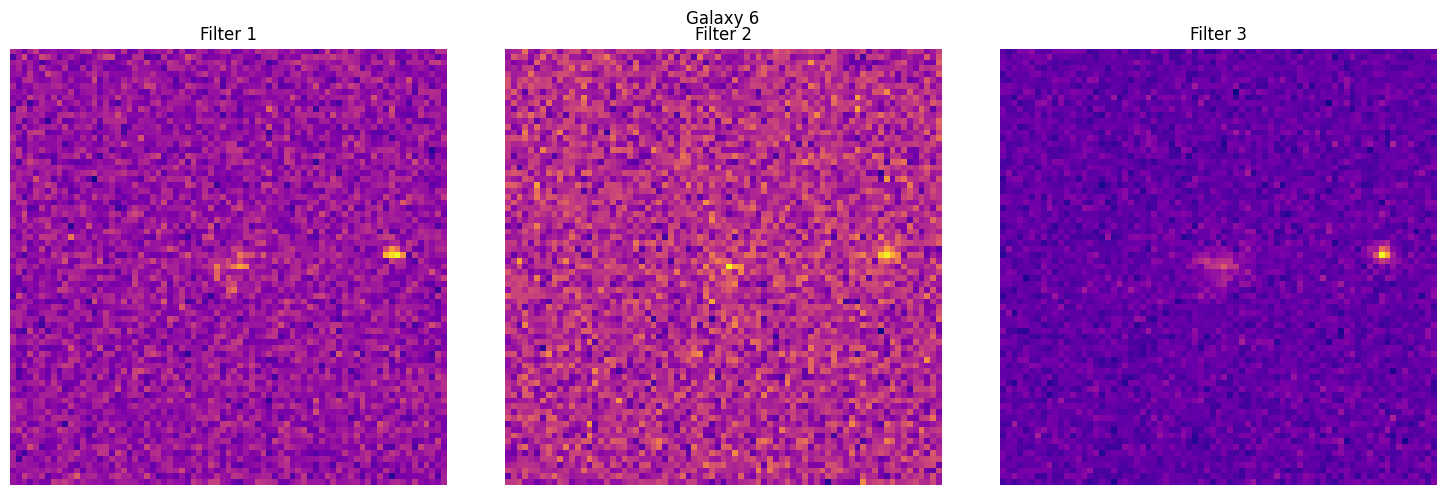

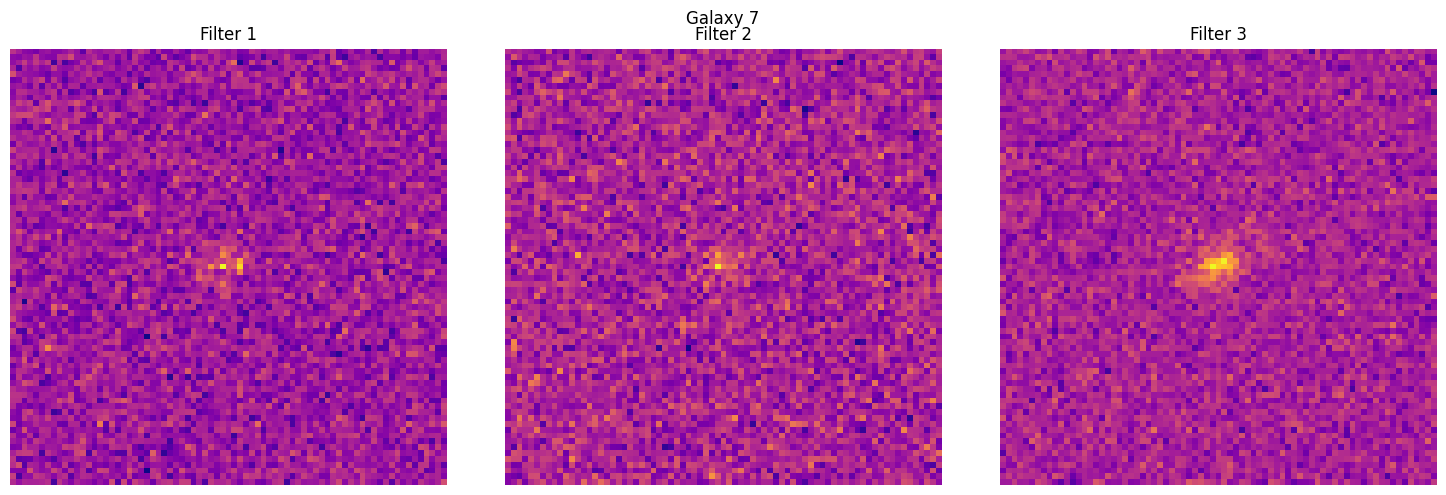

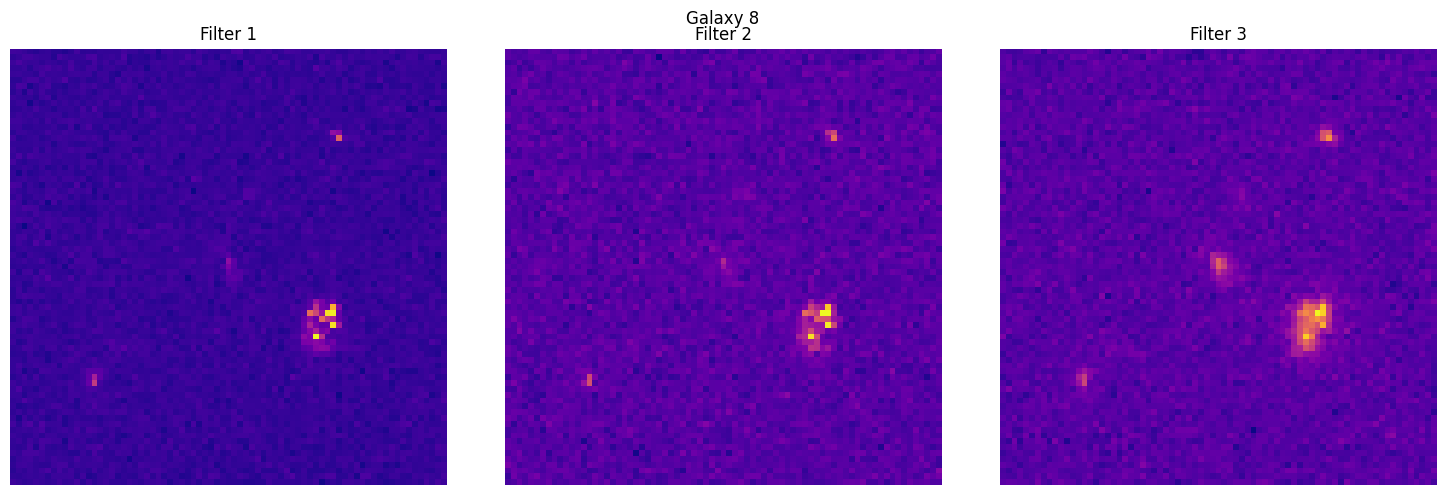

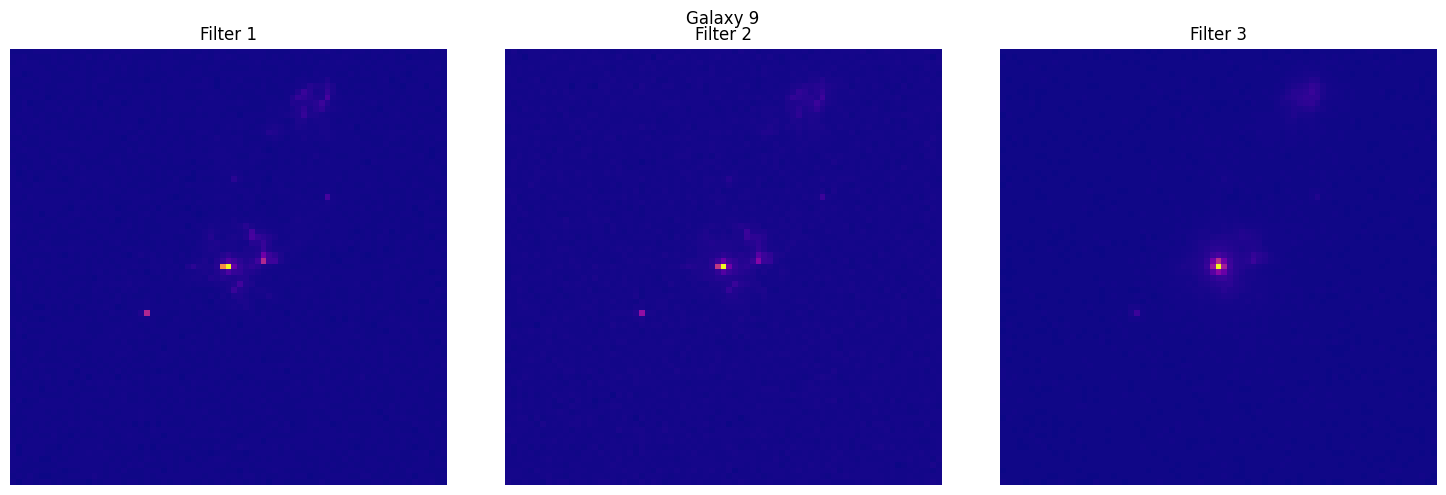

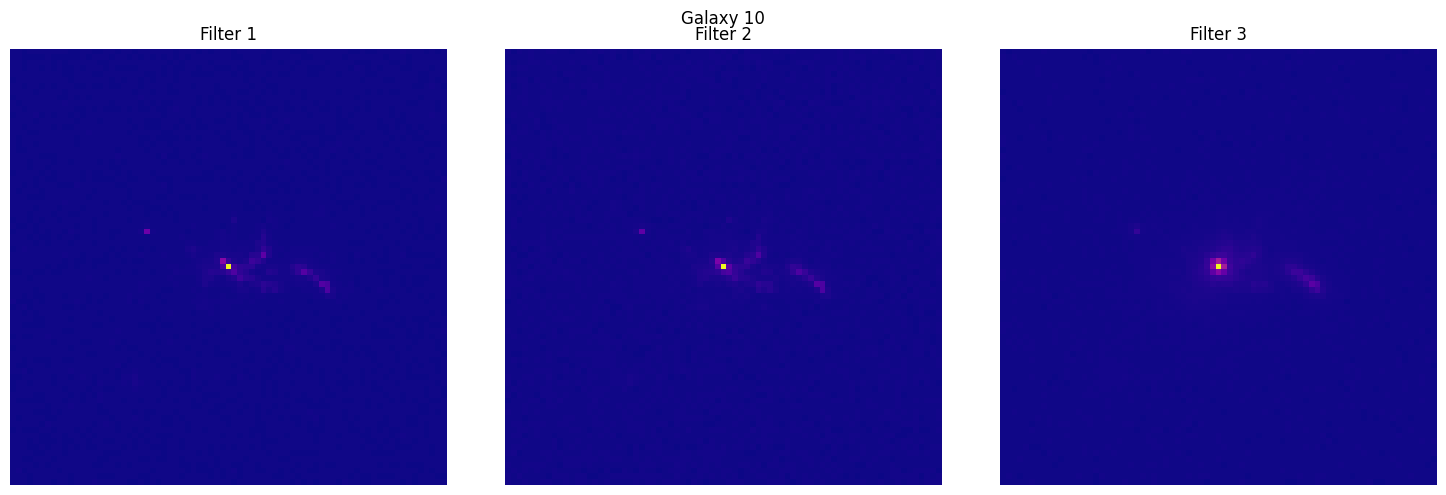

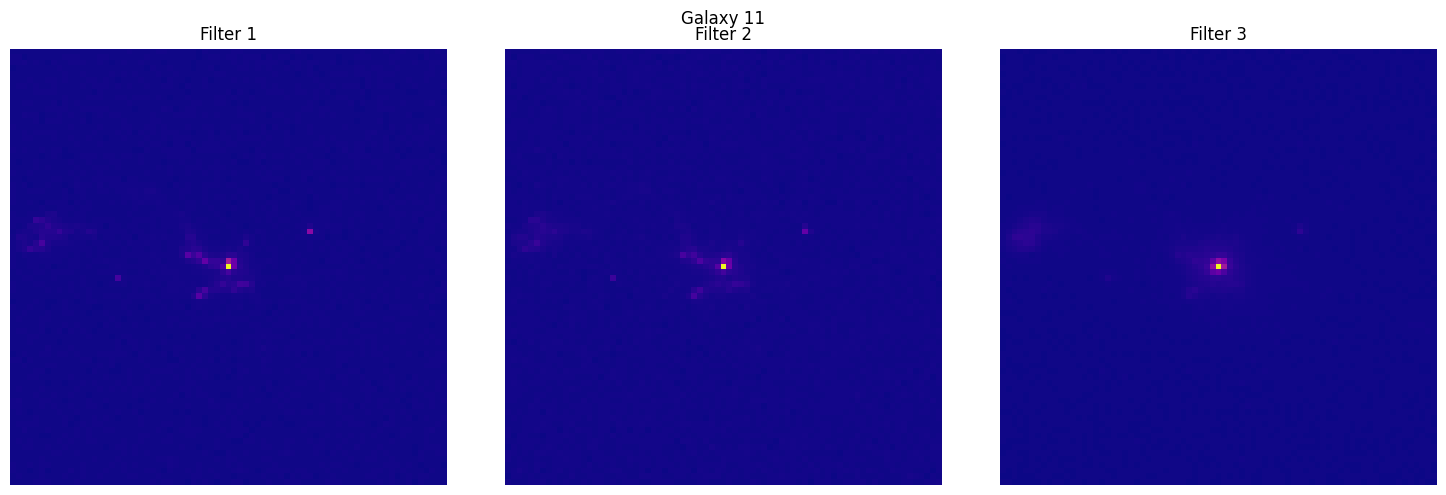

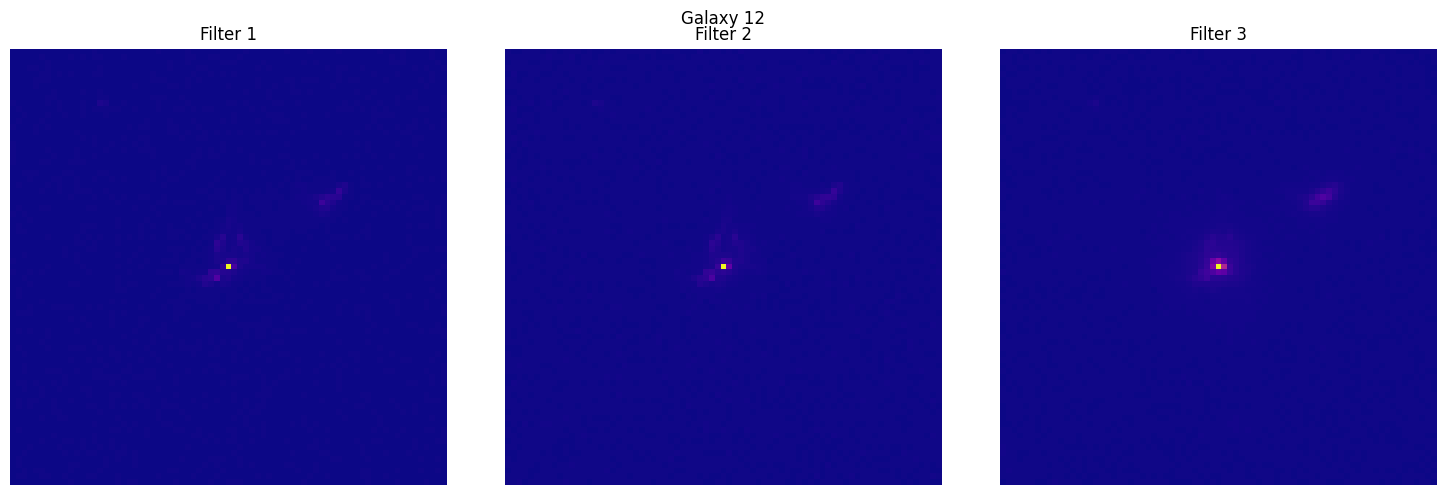

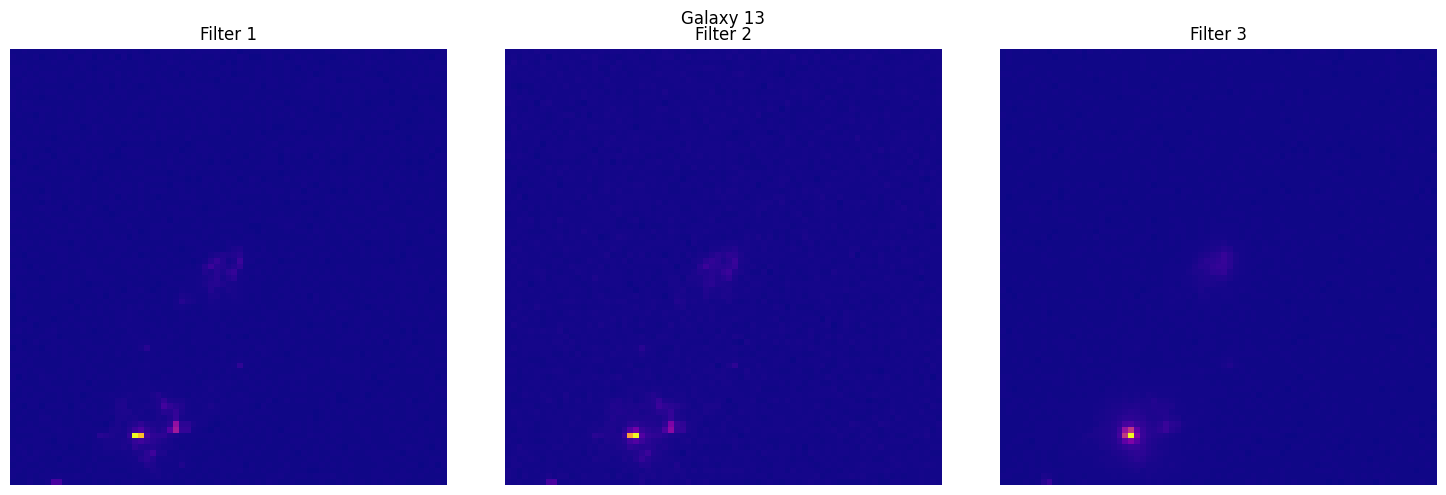

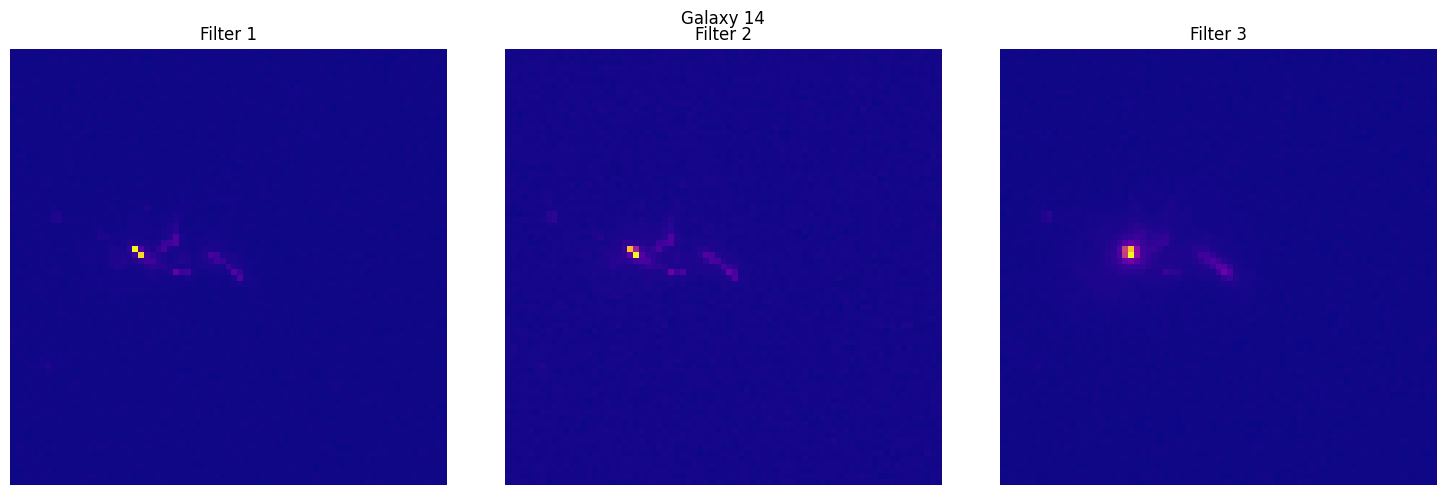

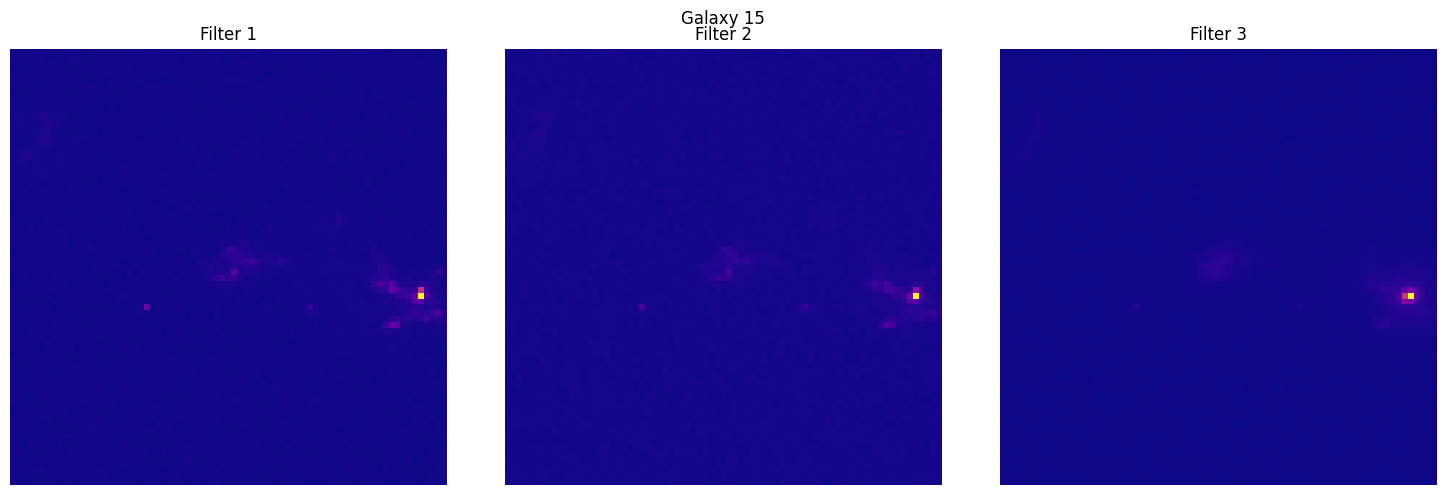

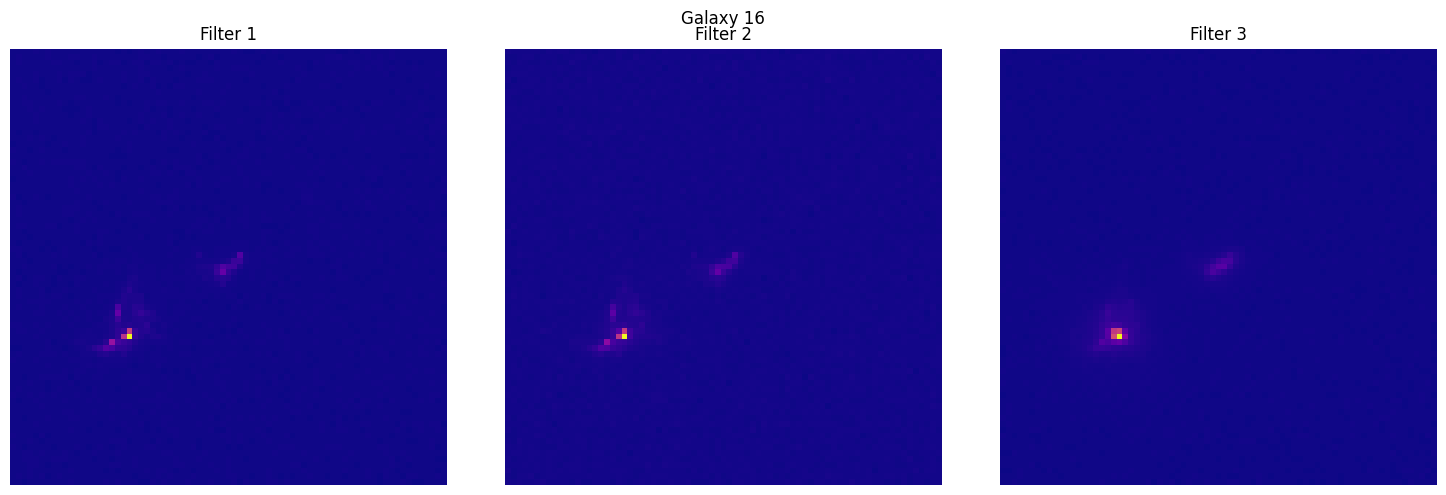

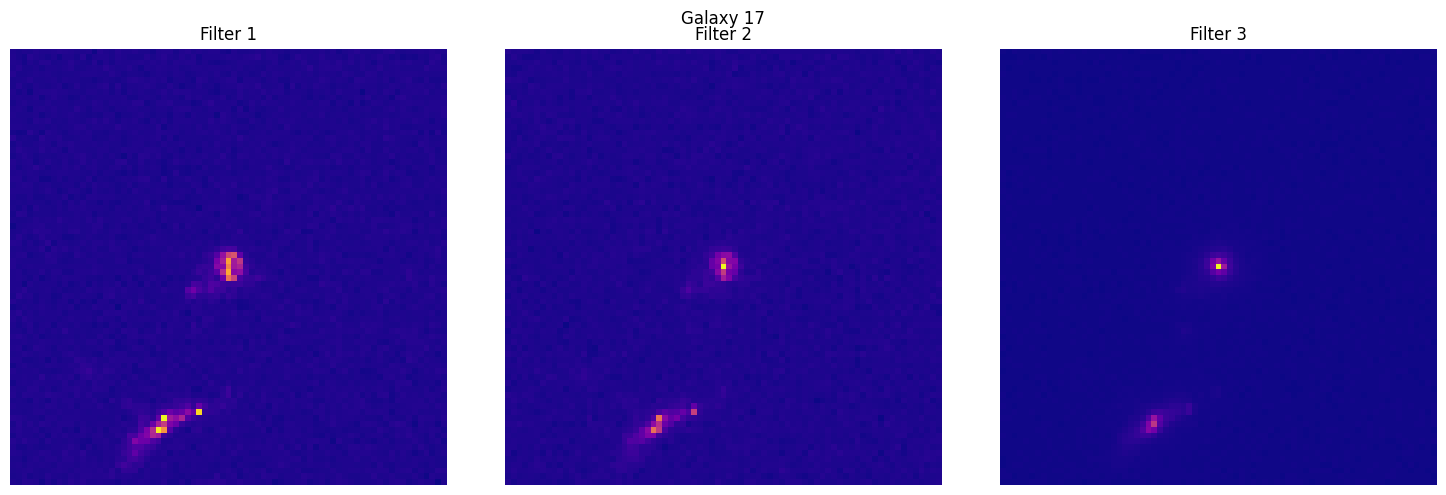

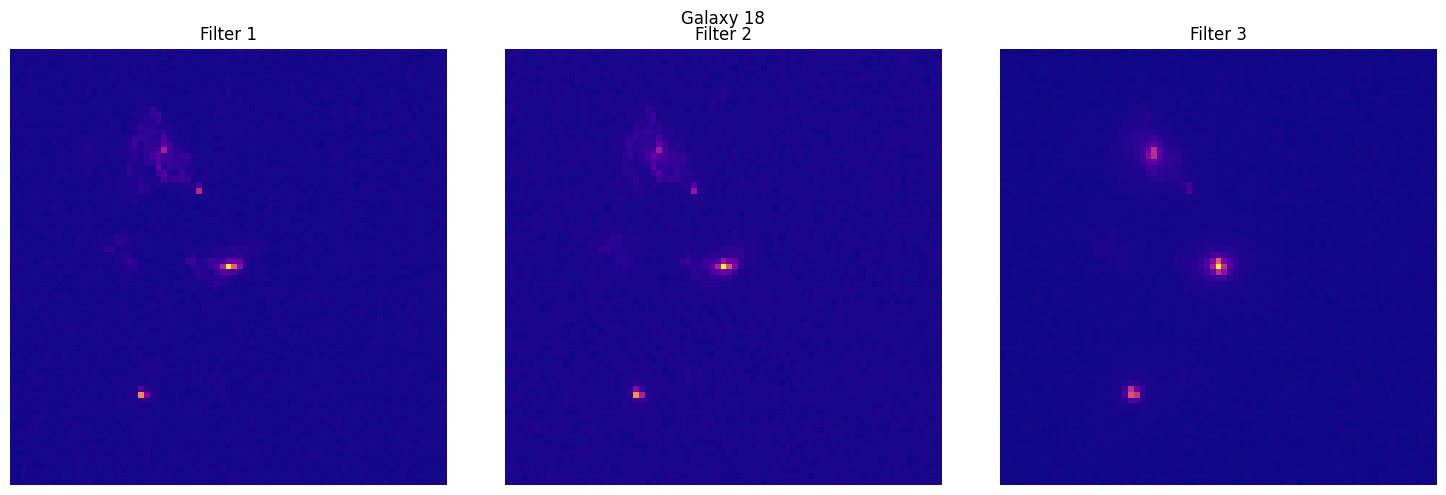

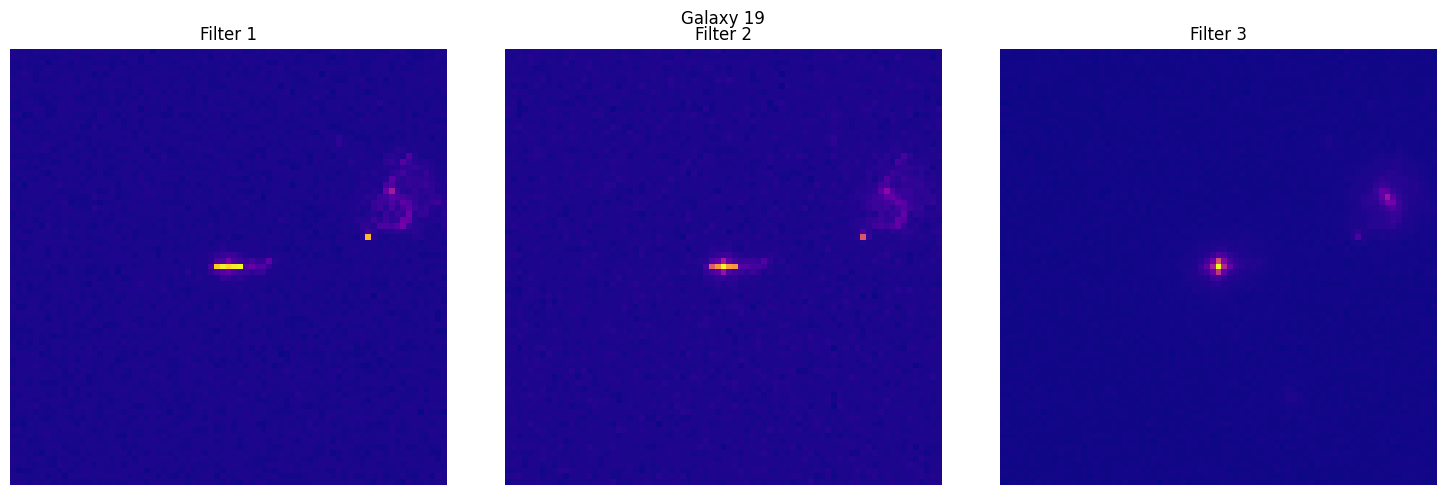

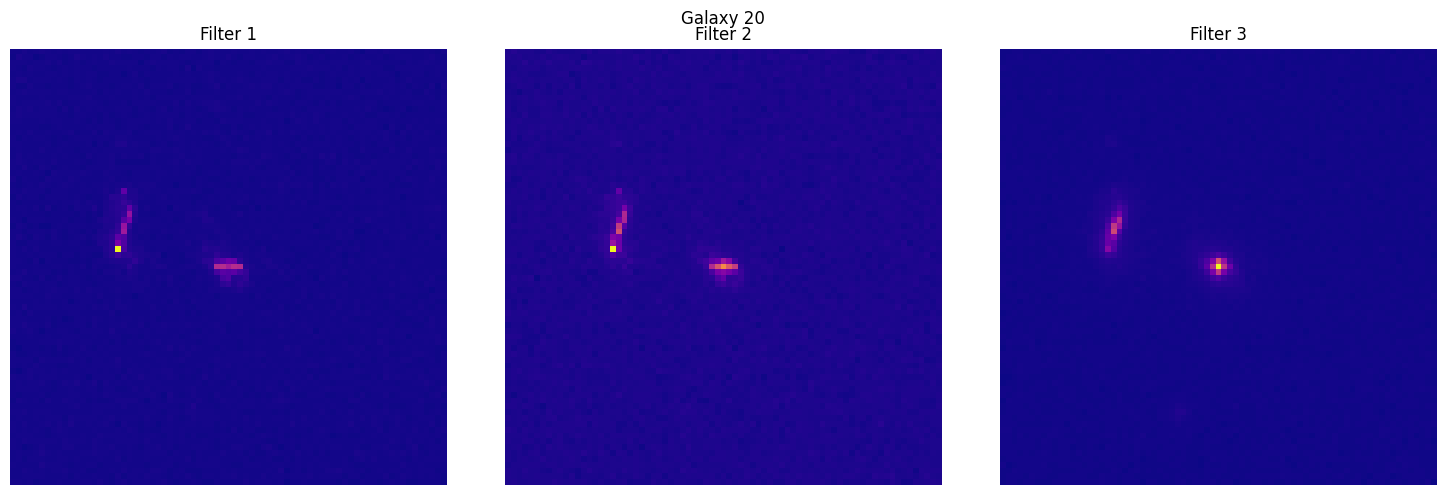

KeyboardInterrupt: 

In [9]:
from astropy.io import fits
from astropy.utils.data import download_file

file_url = 'https://archive.stsci.edu/hlsps/deepmerge/hlsp_deepmerge_hst-jwst_acs-wfc3-nircam_illustris-z2_f814w-f160w-f356w_v1_sim-noisy.fits'
hdu_sim = fits.open(download_file(file_url, cache=True, show_progress=True))

data = hdu_sim[0].data
header_sim = hdu_sim[0].header

num_galaxies = data.shape[0]  # Number of galaxies
num_filters = data.shape[1]    # Number of filters (3 in your case)

# Loop through each galaxy
for galaxy_idx in range(num_galaxies):
    galaxy_data = data[galaxy_idx]  # 3D array for the current galaxy
    
    # Create a subplot for each filter image of the galaxy
    fig, axs = plt.subplots(1, num_filters, figsize=(15, 5))
    fig.suptitle(f'Galaxy {galaxy_idx + 1}')
    for filter_idx in range(num_filters):
        axs[filter_idx].imshow(galaxy_data[filter_idx, :, :], cmap='plasma', origin='lower')
        axs[filter_idx].set_title(f'Filter {filter_idx + 1}')
        axs[filter_idx].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
wsc_sim = WCS(header_sim)
print(header_sim)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    4 / number of array dimensions                     NAXIS1  =                   75                                                  NAXIS2  =                   75                                                  NAXIS3  =                    3                                                  NAXIS4  =                15426                                                  EXTEND  =                    T                                                  NAME1   = 'ImageX  '                                                            NAME2   = 'ImageY  '                                                            NAME3   = 'filter  '           / F814W,F356W,F160W                              NAME4   = 'object  '                                                            EXTNAME = 'Images  '                    